# HOUSING IN İSTANBUL - ANKARA - İZMİR

<img src = "konut2.jfif" style ="width:1000px; heigth:1000px"/>

## Table of Contents
* [Goal](#goal)
* [WebScrabing](#ws)
* [Importing libraries](#il)
* [Reading Data](#rd)
* [Data Preprocessing](#dp)
    * [Data Cleaning and Filling Missing Data](#dc)
    * [Handling Noisy Data](#hnd)
    * [Adding the daily Dollar Rate and Construction Cost Index](#adc)
* [EDA (Explority Data Analysis)](#eda)
    * [Data Visualizationh](#dv)
    * [Statistical Analysis](#sa)
* [Determine Dependent(Target) and Independent Variables(Features)](#tf)
* [Train - Test Split](#tt)
* [Scaling  -Standardization](#scs)
* [Implementation of Models](#imo)
    * [Multiple Linear Regression](#mlr)
    * [Ridge Regression](#rdg)
    * [Lasso Regression](#lss)
    * [Elastic Net - ENET](#enet)
    * [PLS-Partial Least Square Regression](#pls)
* [Dimension Reduction](#dr)
    * [Applying Kernel PCA](#pca)
* [Use Pipeline and Grid Search All Machine Learning Methods and Scaling Methods](#pipe1)
    * [GridSearch Modelling](#violations)
        * [KNN-K Nearest Neigbor](#knn)
        * [SVR-Support Vector Regression](#svr)
        * [CART-Decision Tree](#cart)
        * [Bagged Trees - Bagging](#bag)
        * [RF-Random Forest](#rf)
        * [Ada Boosting](#ada)
        * [GBM-Gradient Boosting Machines](#gmb)
        * [XGBoost](#xgbm)
        * [LGBoost](#lgmb)
        * [CatBoost](#cat)
    * [PIPELINE](#pipe2)
* [Deep Learning](#deep)
    * [RNN - Recurrent Neural Network](#rnn)
    * [LSTM - Long Short Term Memoryr](#speedingbygender) 
* [Evulation All Models](#evu)
* [Feature Importance](#importance)
* [Saving the Best Model and Prediction on New Data](#save)
* [Deployment](#deploy)    
* [Conclusion](#conc)

## GOAL

Webscrabing yöntemi uygulanarak İstanbul, Ankara ve İzmir illerinde beyan edilen konut satış fiyatlarından oluşan veri kümesi oluşturulmuştur. 
Bu veriler üzerinden Makine Öğrenmesi ve Derin Öğrenme modellerini kullanılarak optimum satış fiyatı tahmin  modeli elde edilmeye çalışılmıştır.


By applying the Webscrabing method, a dataset consisting of the declared housing sales prices in the provinces of Istanbul, Ankara and Izmir was created.
Using Machine Learning and Deep Learning models on this data, optimum sales price prediction model was tried to be obtained.

## WebScrabing

### Setup libraries

### Making a get request

## Making the soup

In [1]:
# An example advertisement page

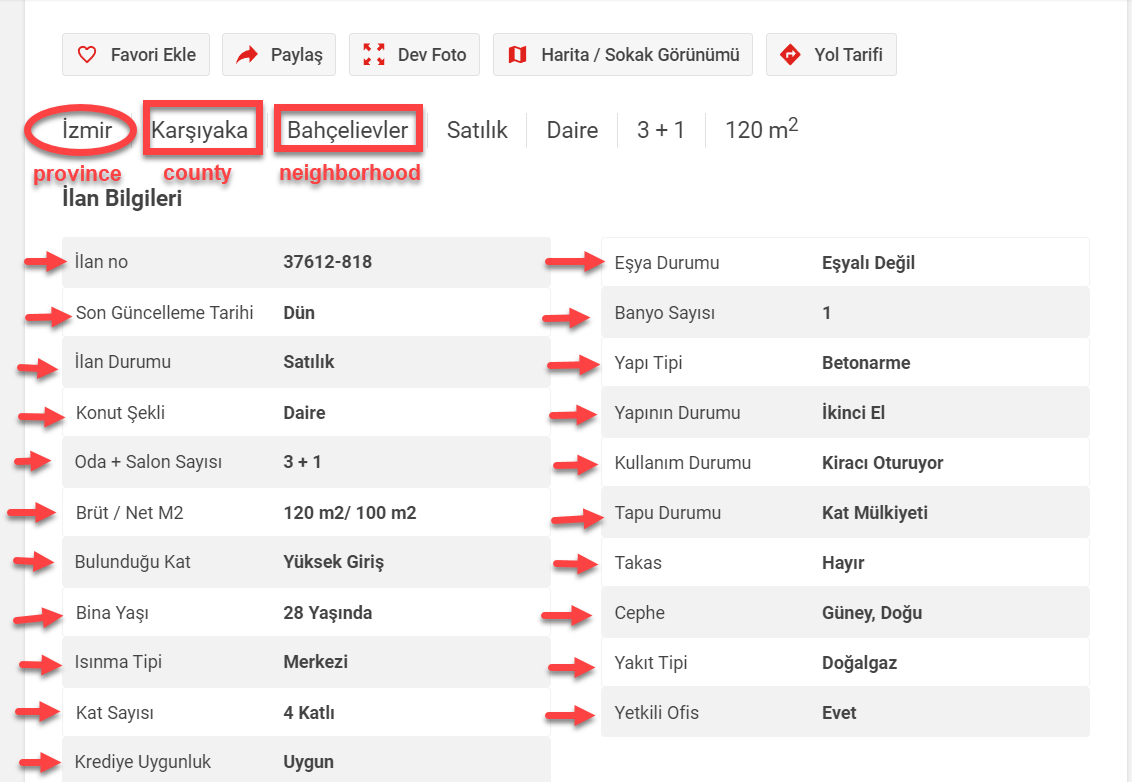

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime 

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [3]:
# Reading the datas which are obtained with Webscrabing.

In [2]:
df = pd.read_csv("df_total_kao.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'df_total_kao.csv'

In [5]:
df

Unnamed: 0 veri_tarihi                       il  \
0                0  10.01.2022                    İzmir   
1                1  10.01.2022                    İzmir   
2                2  10.01.2022  list index out of range   
3                3  10.01.2022                    İzmir   
4                4  10.01.2022                    İzmir   
...            ...         ...                      ...   
114258       74638  27.11.2021                   Ankara   
114259       74639  27.11.2021                   Ankara   
114260       74640  27.11.2021                   Ankara   
114261       74641  27.11.2021                   Ankara   
114262       74642  27.11.2021                   Ankara   

                           ilce                  mahalle  \
0                        Dikili                 Salimbey   
1                      Bayraklı           R. Şevket İnce   
2       list index out of range  list index out of range   
3                      Bayraklı                Osmangazi   
4                         Konak               Murat Reis   
...                         ...                      ...   
114258                    Mamak              Akşemsettin   
114259                 Keçiören                 Esertepe   
114260                    Mamak              Durali Alıç   
114261                    Mamak                    Hürel   
114262              Yenimahalle                Güventepe   

                   satis_fiyati      İlan no Son Güncelleme Tarihi  \
0                     1.500.000   57701-1977          100 Gün Önce   
1                       595.000    2186-9863            4 Gün Önce   
2       list index out of range          NaN                   NaN   
3                     1.525.000   35475-6292                 Bugün   
4                       365.000   118662-301                 Bugün   
...                         ...          ...                   ...   
114258                  975.000   40243-8645           85 Gün Önce   
114259                  259.000  16354-22051           64 Gün Önce   
114260                  272.000   40243-8648           84 Gün Önce   
114261                  275.000   40243-8560          115 Gün Önce   
114262                  768.000  16354-21258           65 Gün Önce   

       İlan Durumu Konut Şekli Oda + Salon Sayısı Brüt / Net M2 Bulunduğu Kat  \
0          Satılık       Daire              3 + 2       265/245        5. Kat   
1          Satılık       Daire              2 + 1         90/85        1. Kat   
2              NaN         NaN                NaN           NaN           NaN   
3          Satılık       Daire              3 + 1       140/120        1. Kat   
4          Satılık       Daire              2 + 1         75/70    Giriş Katı   
...            ...         ...                ...           ...           ...   
114258     Satılık       Daire              3 + 1       170/160        7. Kat   
114259     Satılık       Daire              3 + 1       130/110    Giriş Katı   
114260     Satılık       Daire              3 + 1       111/105        3. Kat   
114261     Satılık       Daire              3 + 1       130/120        1. Kat   
114262     Satılık       Daire              6 + 1       295/275        9. Kat   

         Bina Yaşı          Isınma Tipi Kat Sayısı Krediye Uygunluk  \
0        7 Yaşında                Klima    5 Katlı            Uygun   
1       Sıfır Bina                Klima    5 Katlı            Uygun   
2              NaN                  NaN        NaN              NaN   
3        8 Yaşında  Merkezi (Pay Ölçer)    7 Katlı            Uygun   
4       30 Yaşında                Klima    4 Katlı            Uygun   
...            ...                  ...        ...              ...   
114258  Sıfır Bina                Kombi   11 Katlı            Uygun   
114259  15 Yaşında                Kombi    3 Katlı            Uygun   
114260  12 Yaşında                Kombi    3 Katlı            Uygun   
114261  15 Yaşında                Kombi    3 Katlı    

## Data Preprocessing

### Data Cleaning and Filling Missing Data

In [6]:
df.shape

(114263, 43)

In [7]:
df = df.iloc[:,1:]
df

veri_tarihi                       il                     ilce  \
0       10.01.2022                    İzmir                   Dikili   
1       10.01.2022                    İzmir                 Bayraklı   
2       10.01.2022  list index out of range  list index out of range   
3       10.01.2022                    İzmir                 Bayraklı   
4       10.01.2022                    İzmir                    Konak   
...            ...                      ...                      ...   
114258  27.11.2021                   Ankara                    Mamak   
114259  27.11.2021                   Ankara                 Keçiören   
114260  27.11.2021                   Ankara                    Mamak   
114261  27.11.2021                   Ankara                    Mamak   
114262  27.11.2021                   Ankara              Yenimahalle   

                        mahalle             satis_fiyati      İlan no  \
0                      Salimbey                1.500.000   57701-1977   
1                R. Şevket İnce                  595.000    2186-9863   
2       list index out of range  list index out of range          NaN   
3                     Osmangazi                1.525.000   35475-6292   
4                    Murat Reis                  365.000   118662-301   
...                         ...                      ...          ...   
114258              Akşemsettin                  975.000   40243-8645   
114259                 Esertepe                  259.000  16354-22051   
114260              Durali Alıç                  272.000   40243-8648   
114261                    Hürel                  275.000   40243-8560   
114262                Güventepe                  768.000  16354-21258   

       Son Güncelleme Tarihi İlan Durumu Konut Şekli Oda + Salon Sayısı  \
0               100 Gün Önce     Satılık       Daire              3 + 2   
1                 4 Gün Önce     Satılık       Daire              2 + 1   
2                        NaN         NaN         NaN                NaN   
3                      Bugün     Satılık       Daire              3 + 1   
4                      Bugün     Satılık       Daire              2 + 1   
...                      ...         ...         ...                ...   
114258           85 Gün Önce     Satılık       Daire              3 + 1   
114259           64 Gün Önce     Satılık       Daire              3 + 1   
114260           84 Gün Önce     Satılık       Daire              3 + 1   
114261          115 Gün Önce     Satılık       Daire              3 + 1   
114262           65 Gün Önce     Satılık       Daire              6 + 1   

       Brüt / Net M2 Bulunduğu Kat   Bina Yaşı          Isınma Tipi  \
0            265/245        5. Kat   7 Yaşında                Klima   
1              90/85        1. Kat  Sıfır Bina                Klima   
2                NaN           NaN         NaN                  NaN   
3            140/120        1. Kat   8 Yaşında  Merkezi (Pay Ölçer)   
4              75/70    Giriş Katı  30 Yaşında                Klima   
...              ...           ...         ...                  ...   
114258       170/160        7. Kat  Sıfır Bina                Kombi   
114259       130/110    Giriş Katı  15 Yaşında                Kombi   
114260       111/105        3. Kat  12 Yaşında                Kombi   
114261       130/120        1. Kat  15 Yaşında                Kombi   
114262       295/275        9. Kat   8 Yaşında                Kombi   

       Kat Sayısı Krediye Uygunluk   Eşya Durumu  Banyo Sayısı  Yapı Tipi  \
0         5 Katlı            Uygun  Eşyalı Değil          2.00        NaN   
1         5 Katlı            Uygun  Eşyalı Değil          1.00  Betonarme   
2             NaN              NaN           NaN           NaN        NaN   
3         7 Katlı            Uygun  Eşyalı Değil          2.00        NaN   
4         4 Katlı            Uygun  Eşyalı Değil          1.00  Betonarme   
...           ...              ...           ... 

In [8]:
# Translating column names Turkish to English

In [9]:
df.columns

Index(['veri_tarihi', 'il', 'ilce', 'mahalle', 'satis_fiyati', 'İlan no',
       'Son Güncelleme Tarihi', 'İlan Durumu', 'Konut Şekli',
       'Oda + Salon Sayısı', 'Brüt / Net M2', 'Bulunduğu Kat', 'Bina Yaşı',
       'Isınma Tipi', 'Kat Sayısı', 'Krediye Uygunluk', 'Eşya Durumu',
       'Banyo Sayısı', 'Yapı Tipi', 'Yapının Durumu', 'Kullanım Durumu',
       'Takas', 'Yakıt Tipi', 'Tapu Durumu', 'Yetkili Ofis', 'Aidat', 'Cephe',
       'Kat Karşılığı', 'Kira Getirisi', 'Site İçerisinde', 'Depozito',
       'İlgili Belediye', 'Ada No', 'Parsel No', 'Metrekare Birim Fiyatı',
       'Gabari', 'Kapalı Alan Brüt M2', 'Kapalı Alan Net M2', 'Ada', 'Parsel',
       'Kapalı Alan Brüt m2', 'Kapalı Alan Net m2'],
      dtype='object')

In [10]:
df.columns = ['data_date', 'province', 'county', 'neighborhood', 'sales_price', 'advert id',
       'Last Updated Date', 'Ad Status', 'Housing Type',
       'Room + Hall Number', 'Gross / Net M2', 'Floor', 'Building Age',
       'Heating Type', 'Number of Floors', 'Credit Eligibility', 'Product Status',
       'Number of Bathrooms', 'Building Type', 'Building Status', 'Usage Status',
       'Exchange', 'Fuel Type', 'Deed Status', 'Authorized Office', 'Dues', 'Facade',
       'From Flat', 'Rent Income', 'On Site', 'Deposit',
       'Relevant Municipality', 'Island No', 'Parcel No', 'Square-meter Unit Price',
       'Overhead', 'Gross M2 of Indoor Area', 'Net M2 of Indoor Area', 'Island', 'Parcel',
       'Gross Indoor Area m2', 'Close Area Net m2']

In [11]:
df.head()

data_date                 province                   county  \
0  10.01.2022                    İzmir                   Dikili   
1  10.01.2022                    İzmir                 Bayraklı   
2  10.01.2022  list index out of range  list index out of range   
3  10.01.2022                    İzmir                 Bayraklı   
4  10.01.2022                    İzmir                    Konak   

              neighborhood              sales_price   advert id  \
0                 Salimbey                1.500.000  57701-1977   
1           R. Şevket İnce                  595.000   2186-9863   
2  list index out of range  list index out of range         NaN   
3                Osmangazi                1.525.000  35475-6292   
4               Murat Reis                  365.000  118662-301   

  Last Updated Date Ad Status Housing Type Room + Hall Number Gross / Net M2  \
0      100 Gün Önce   Satılık        Daire              3 + 2        265/245   
1        4 Gün Önce   Satılık        Daire              2 + 1          90/85   
2               NaN       NaN          NaN                NaN            NaN   
3             Bugün   Satılık        Daire              3 + 1        140/120   
4             Bugün   Satılık        Daire              2 + 1          75/70   

        Floor Building Age         Heating Type Number of Floors  \
0      5. Kat    7 Yaşında                Klima          5 Katlı   
1      1. Kat   Sıfır Bina                Klima          5 Katlı   
2         NaN          NaN                  NaN              NaN   
3      1. Kat    8 Yaşında  Merkezi (Pay Ölçer)          7 Katlı   
4  Giriş Katı   30 Yaşında                Klima          4 Katlı   

  Credit Eligibility Product Status  Number of Bathrooms Building Type  \
0              Uygun   Eşyalı Değil                 2.00           NaN   
1              Uygun   Eşyalı Değil                 1.00     Betonarme   
2                NaN            NaN                  NaN           NaN   
3              Uygun   Eşyalı Değil                 2.00           NaN   
4              Uygun   Eşyalı Değil                 1.00     Betonarme   

  Building Status        Usage Status Exchange  Fuel Type    Deed Status  \
0       İkinci El  Ev Sahibi Oturuyor    Hayır        NaN            NaN   
1           Sıfır  Ev Sahibi Oturuyor    Hayır   Doğalgaz  Kat Mülkiyeti   
2             NaN                 NaN      NaN        NaN            NaN   
3       İkinci El                 Boş    Hayır   Doğalgaz            NaN   
4       İkinci El     Kiracı Oturuyor    Hayır  Akaryakıt  Kat Mülkiyeti   

  Authorized Office    Dues              Facade From Flat Rent Income On Site  \
0               NaN     NaN                 NaN       NaN         NaN     NaN   
1              Evet     NaN                 NaN       NaN         NaN     NaN   
2               NaN     NaN                 NaN       NaN         NaN     NaN   
3               NaN  150 TL  Kuzey, Güney, Doğu       NaN         NaN     NaN   
4              Evet     NaN                Doğu       NaN         NaN     NaN   

  Deposit Relevant Municipality  Island No  Parcel No Square-meter Unit Price  \
0     NaN                   NaN        NaN        NaN                     NaN   
1     NaN                   NaN        NaN        NaN                     NaN   
2     NaN                   NaN        NaN        NaN                     NaN   
3     NaN                   NaN        NaN        NaN                     NaN   
4     NaN                   NaN        NaN        NaN                     NaN   

  Overhead Gross M2 of Indoor Area Net M2 of Indoor Area  Island  Parcel  \
0      NaN                     NaN                   NaN     NaN     NaN   
1      NaN                     NaN                   NaN     NaN     NaN   
2      NaN                     NaN                   NaN     NaN     NaN   
3      NaN                     NaN                   NaN     NaN     NaN   
4      NaN                     NaN                  

In [12]:
# Checking for duplicate data
df[df.duplicated()==True]

Empty DataFrame
Columns: [data_date, province, county, neighborhood, sales_price, advert id, Last Updated Date, Ad Status, Housing Type, Room + Hall Number, Gross / Net M2, Floor, Building Age, Heating Type, Number of Floors, Credit Eligibility, Product Status, Number of Bathrooms, Building Type, Building Status, Usage Status, Exchange, Fuel Type, Deed Status, Authorized Office, Dues, Facade, From Flat, Rent Income, On Site, Deposit, Relevant Municipality, Island No, Parcel No, Square-meter Unit Price, Overhead, Gross M2 of Indoor Area, Net M2 of Indoor Area, Island, Parcel, Gross Indoor Area m2, Close Area Net m2]
Index: []

In [13]:
# # Droping duplicate data
# df = df.drop_duplicates()

In [14]:
df.shape

(114263, 42)

In [15]:
# We begin to examine each column one by one

### Column: "data_date"

In [16]:
df.data_date.value_counts()

10.01.2022    30222
05.12.2021    18187
11.01.2022    17254
06.12.2021    15131
27.11.2021     9746
26.11.2021     7363
04.12.2021     6449
25.11.2021     4920
22.11.2021     4143
21.11.2021      848
Name: data_date, dtype: int64

In [17]:
# convert object to date

In [18]:
# Türkçe formattaki gün ile ay değerlerini yer değiştirip date tipine dönüştürüyoruz. Bu değişimi yapmazsak hatalı dönüşüm yapıyor.
# We replace the day and month values in Turkish format and convert them to date type. If we do not make this change, it makes an incorrect conversion.

df[["day","month","year"]] = df["data_date"].str.split(".",expand=True,)
df["data_date"] = df["month"]+"."+df["day"]+"."+df["year"]

# df["data_date"] = pd.to_datetime(df["veri_tarihi"])
df["data_date"] = df["data_date"].astype("datetime64[ns]")
df.data_date.value_counts()

2022-01-10    30222
2021-12-05    18187
2022-01-11    17254
2021-12-06    15131
2021-11-27     9746
2021-11-26     7363
2021-12-04     6449
2021-11-25     4920
2021-11-22     4143
2021-11-21      848
Name: data_date, dtype: int64

In [19]:
k = 10000
df.data_date[k]

Timestamp('2022-01-11 00:00:00')

In [20]:
df.data_date[k].day

11

### Column: "province"

In [21]:
df.province.value_counts()

İstanbul                   54027
Ankara                     42131
İzmir                      18104
list index out of range        1
Name: province, dtype: int64

In [22]:
# Droping data with error (list index out of range)

In [23]:
df[df.province == "list index out of range"]

data_date                 province                   county  \
2 2022-01-10  list index out of range  list index out of range   

              neighborhood              sales_price advert id  \
2  list index out of range  list index out of range       NaN   

  Last Updated Date Ad Status Housing Type Room + Hall Number Gross / Net M2  \
2               NaN       NaN          NaN                NaN            NaN   

  Floor Building Age Heating Type Number of Floors Credit Eligibility  \
2   NaN          NaN          NaN              NaN                NaN   

  Product Status  Number of Bathrooms Building Type Building Status  \
2            NaN                  NaN           NaN             NaN   

  Usage Status Exchange Fuel Type Deed Status Authorized Office Dues Facade  \
2          NaN      NaN       NaN         NaN               NaN  NaN    NaN   

  From Flat Rent Income On Site Deposit Relevant Municipality  Island No  \
2       NaN         NaN     NaN     NaN                   NaN        NaN   

   Parcel No Square-meter Unit Price Overhead Gross M2 of Indoor Area  \
2        NaN                     NaN      NaN                     NaN   

  Net M2 of Indoor Area  Island  Parcel  Gross Indoor Area m2  \
2                   NaN     NaN     NaN                   NaN   

   Close Area Net m2 day month  year  
2                NaN  10    01  2022

In [24]:
df = df.drop(df[df["province"] == "list index out of range" ].index)

In [25]:
df.province.value_counts()

İstanbul    54027
Ankara      42131
İzmir       18104
Name: province, dtype: int64

### Column: "county"

In [26]:
df.county.value_counts()

Çankaya     11938
Mamak        7851
Kadıköy      7079
Keçiören     6562
Maltepe      4220
            ...  
Haymana         2
Ayaş            2
Nallıhan        2
Kınık           2
Bala            1
Name: county, Length: 90, dtype: int64

### Column: "neighborhood"

In [27]:
df[df.county == "list index out of range"]

Empty DataFrame
Columns: [data_date, province, county, neighborhood, sales_price, advert id, Last Updated Date, Ad Status, Housing Type, Room + Hall Number, Gross / Net M2, Floor, Building Age, Heating Type, Number of Floors, Credit Eligibility, Product Status, Number of Bathrooms, Building Type, Building Status, Usage Status, Exchange, Fuel Type, Deed Status, Authorized Office, Dues, Facade, From Flat, Rent Income, On Site, Deposit, Relevant Municipality, Island No, Parcel No, Square-meter Unit Price, Overhead, Gross M2 of Indoor Area, Net M2 of Indoor Area, Island, Parcel, Gross Indoor Area m2, Close Area Net m2, day, month, year]
Index: []

In [28]:
df.neighborhood.value_counts()

Cumhuriyet       2632
Merkez           1811
Bahçelievler     1521
Göztepe          1327
Fatih            1288
                 ... 
Şirinkent           1
Arap Cami           1
Cengiz Topel        1
Kabakum             1
Aşağıçavundur       1
Name: neighborhood, Length: 1221, dtype: int64

In [29]:
df[df.neighborhood == "list index out of range"]

Empty DataFrame
Columns: [data_date, province, county, neighborhood, sales_price, advert id, Last Updated Date, Ad Status, Housing Type, Room + Hall Number, Gross / Net M2, Floor, Building Age, Heating Type, Number of Floors, Credit Eligibility, Product Status, Number of Bathrooms, Building Type, Building Status, Usage Status, Exchange, Fuel Type, Deed Status, Authorized Office, Dues, Facade, From Flat, Rent Income, On Site, Deposit, Relevant Municipality, Island No, Parcel No, Square-meter Unit Price, Overhead, Gross M2 of Indoor Area, Net M2 of Indoor Area, Island, Parcel, Gross Indoor Area m2, Close Area Net m2, day, month, year]
Index: []

### Column: "sales_price"

In [30]:
# Droping data with error (list index out of range)
df[df["sales_price"] == "list index out of range" ]

Empty DataFrame
Columns: [data_date, province, county, neighborhood, sales_price, advert id, Last Updated Date, Ad Status, Housing Type, Room + Hall Number, Gross / Net M2, Floor, Building Age, Heating Type, Number of Floors, Credit Eligibility, Product Status, Number of Bathrooms, Building Type, Building Status, Usage Status, Exchange, Fuel Type, Deed Status, Authorized Office, Dues, Facade, From Flat, Rent Income, On Site, Deposit, Relevant Municipality, Island No, Parcel No, Square-meter Unit Price, Overhead, Gross M2 of Indoor Area, Net M2 of Indoor Area, Island, Parcel, Gross Indoor Area m2, Close Area Net m2, day, month, year]
Index: []

In [31]:
df = df.drop(df[df["sales_price"] == "list index out of range" ].index)

In [32]:
df[df["sales_price"] == "list index out of range" ]

Empty DataFrame
Columns: [data_date, province, county, neighborhood, sales_price, advert id, Last Updated Date, Ad Status, Housing Type, Room + Hall Number, Gross / Net M2, Floor, Building Age, Heating Type, Number of Floors, Credit Eligibility, Product Status, Number of Bathrooms, Building Type, Building Status, Usage Status, Exchange, Fuel Type, Deed Status, Authorized Office, Dues, Facade, From Flat, Rent Income, On Site, Deposit, Relevant Municipality, Island No, Parcel No, Square-meter Unit Price, Overhead, Gross M2 of Indoor Area, Net M2 of Indoor Area, Island, Parcel, Gross Indoor Area m2, Close Area Net m2, day, month, year]
Index: []

In [33]:
# Converting type of object to integer

In [34]:
df["sales_price"] = [int(i.replace(".","")) for i in df["sales_price"]]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114262 entries, 0 to 114262
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   data_date                114262 non-null  datetime64[ns]
 1   province                 114262 non-null  object        
 2   county                   114262 non-null  object        
 3   neighborhood             114262 non-null  object        
 4   sales_price              114262 non-null  int64         
 5   advert id                114262 non-null  object        
 6   Last Updated Date        114262 non-null  object        
 7   Ad Status                114262 non-null  object        
 8   Housing Type             114262 non-null  object        
 9   Room + Hall Number       114262 non-null  object        
 10  Gross / Net M2           114262 non-null  object        
 11  Floor                    114197 non-null  object        
 12  Building Age    

### Column: "advert id"

In [36]:
df[df["advert id"] == "list index out of range" ]

Empty DataFrame
Columns: [data_date, province, county, neighborhood, sales_price, advert id, Last Updated Date, Ad Status, Housing Type, Room + Hall Number, Gross / Net M2, Floor, Building Age, Heating Type, Number of Floors, Credit Eligibility, Product Status, Number of Bathrooms, Building Type, Building Status, Usage Status, Exchange, Fuel Type, Deed Status, Authorized Office, Dues, Facade, From Flat, Rent Income, On Site, Deposit, Relevant Municipality, Island No, Parcel No, Square-meter Unit Price, Overhead, Gross M2 of Indoor Area, Net M2 of Indoor Area, Island, Parcel, Gross Indoor Area m2, Close Area Net m2, day, month, year]
Index: []

In [37]:
df["advert id"].value_counts()

93841-374      3
1202-96509     3
6890-6598      3
120150-905     3
7553-13728     3
              ..
35033-4134     1
125028-19      1
102386-1378    1
125107-173     1
16354-21258    1
Name: advert id, Length: 89764, dtype: int64

In [38]:
df[df["advert id"] == "24009-3530"]

data_date  province   county     neighborhood  sales_price  \
44314  2022-01-10  İstanbul  Esenler  Kazım Karabekir       318000   
84800  2021-12-05  İstanbul  Esenler  Kazım Karabekir       252000   
103519 2021-11-26  İstanbul  Esenler  Kazım Karabekir       238000   

         advert id Last Updated Date Ad Status Housing Type  \
44314   24009-3530       59 Gün Önce   Satılık        Daire   
84800   24009-3530       23 Gün Önce   Satılık        Daire   
103519  24009-3530       13 Gün Önce   Satılık        Daire   

       Room + Hall Number Gross / Net M2      Floor Building Age Heating Type  \
44314               1 + 1         100/70  Çatı Katı   30 Yaşında         Soba   
84800               1 + 1         100/70  Çatı Katı   30 Yaşında         Soba   
103519              1 + 1         100/70  Çatı Katı   30 Yaşında         Soba   

       Number of Floors Credit Eligibility Product Status  \
44314           6 Katlı        Uygun değil   Eşyalı Değil   
84800           6 Katlı        Uygun değil   Eşyalı Değil   
103519          6 Katlı        Uygun değil   Eşyalı Değil   

        Number of Bathrooms Building Type Building Status Usage Status  \
44314                  1.00     Betonarme       İkinci El          Boş   
84800                  1.00     Betonarme       İkinci El          Boş   
103519                 1.00     Betonarme       İkinci El          Boş   

       Exchange Fuel Type Deed Status Authorized Office   Dues Facade  \
44314     Hayır  Doğalgaz        Arsa               NaN  30 TL  Güney   
84800     Hayır  Doğalgaz        Arsa               NaN  30 TL  Güney   
103519    Hayır  Doğalgaz        Arsa               NaN  30 TL  Güney   

       From Flat Rent Income On Site Deposit Relevant Municipality  Island No  \
44314        NaN    1.500 TL     NaN     NaN                   NaN        NaN   
84800        NaN    1.500 TL     NaN     NaN                   NaN        NaN   
103519       NaN    1.500 TL     NaN     NaN                   NaN        NaN   

        Parcel No Square-meter Unit Price Overhead Gross M2 of Indoor Area  \
44314         NaN                     NaN      NaN                     NaN   
84800         NaN                     NaN      NaN                     NaN   
103519        NaN                     NaN      NaN                     NaN   

       Net M2 of Indoor Area  Island  Parcel  Gross Indoor Area m2  \
44314                    NaN     NaN     NaN                   NaN   
84800                    NaN     NaN     NaN                   NaN   
103519                   NaN     NaN     NaN                   NaN   

        Close Area Net m2 day month  year  
44314                 NaN  10    01  2022  
84800                 NaN  05    12  2021  
103519                NaN  26    11  2021

In [39]:
# Yukarıda da görüldüğü gibi aynı reklam üç farklı zamanda değiştirmiştir. Hepsini veri çerçevesinde kullandık.
# As can be seen above, the same advertisement was changed at three different times. We used them all in the dataframe.

In [40]:
# Dropping duplicate data in "advert id" and "sales_price" columns
df[df.duplicated(["advert id", "sales_price"])==True]

Empty DataFrame
Columns: [data_date, province, county, neighborhood, sales_price, advert id, Last Updated Date, Ad Status, Housing Type, Room + Hall Number, Gross / Net M2, Floor, Building Age, Heating Type, Number of Floors, Credit Eligibility, Product Status, Number of Bathrooms, Building Type, Building Status, Usage Status, Exchange, Fuel Type, Deed Status, Authorized Office, Dues, Facade, From Flat, Rent Income, On Site, Deposit, Relevant Municipality, Island No, Parcel No, Square-meter Unit Price, Overhead, Gross M2 of Indoor Area, Net M2 of Indoor Area, Island, Parcel, Gross Indoor Area m2, Close Area Net m2, day, month, year]
Index: []

### Reseting index of df

In [41]:
df = df.reset_index(drop=True)

In [42]:
df.shape

(114262, 45)

### Column: "Last Updated Date"

In [43]:
df["Last Updated Date"].value_counts()

Bugün            7105
Dün              6162
2 Gün Önce       4965
3 Gün Önce       4872
4 Gün Önce       3947
                 ... 
935 Gün Önce        1
941 Gün Önce        1
669 Gün Önce        1
958 Gün Önce        1
2343 Gün Önce       1
Name: Last Updated Date, Length: 868, dtype: int64

In [44]:
df[df["Last Updated Date"] == "list index out of range" ]

Empty DataFrame
Columns: [data_date, province, county, neighborhood, sales_price, advert id, Last Updated Date, Ad Status, Housing Type, Room + Hall Number, Gross / Net M2, Floor, Building Age, Heating Type, Number of Floors, Credit Eligibility, Product Status, Number of Bathrooms, Building Type, Building Status, Usage Status, Exchange, Fuel Type, Deed Status, Authorized Office, Dues, Facade, From Flat, Rent Income, On Site, Deposit, Relevant Municipality, Island No, Parcel No, Square-meter Unit Price, Overhead, Gross M2 of Indoor Area, Net M2 of Indoor Area, Island, Parcel, Gross Indoor Area m2, Close Area Net m2, day, month, year]
Index: []

In [45]:
df["Last Updated Date"][df["Last Updated Date"] == "Bugün"]

2         Bugün
3         Bugün
29        Bugün
30        Bugün
31        Bugün
          ...  
114128    Bugün
114138    Bugün
114163    Bugün
114184    Bugün
114227    Bugün
Name: Last Updated Date, Length: 7105, dtype: object

In [46]:
# Converting the "Bugün"(today) and "Dün"(yesterday) data into number format
df["Last Updated Date"][df["Last Updated Date"] == "Bugün"] = "0 Gün Önce"
df["Last Updated Date"][df["Last Updated Date"] == "Dün"] = "1 Gün Önce"

In [47]:
df["Last Updated Date"].value_counts()

0 Gün Önce       7105
1 Gün Önce       6162
2 Gün Önce       4965
3 Gün Önce       4872
4 Gün Önce       3947
                 ... 
935 Gün Önce        1
941 Gün Önce        1
669 Gün Önce        1
958 Gün Önce        1
2343 Gün Önce       1
Name: Last Updated Date, Length: 868, dtype: int64

In [48]:
# Pulling the numbers from data of "Last Updated Date" column

In [49]:
len(df["Last Updated Date"])

114262

In [50]:
df["days"] = [i.strip().split()[0] for i in df["Last Updated Date"]]

In [51]:
df["days"].value_counts()

0       7105
1       6162
2       4965
3       4872
4       3947
        ... 
935        1
941        1
669        1
958        1
2343       1
Name: days, Length: 868, dtype: int64

In [52]:
# Creating new column named as "date"

In [53]:
df["date"] = [df["data_date"][i] - datetime.timedelta(days=int(df.days[i])) for i in range(0,df.shape[0])]

In [54]:
df.head()

data_date province       county       neighborhood  sales_price  \
0 2022-01-10    İzmir       Dikili           Salimbey      1500000   
1 2022-01-10    İzmir     Bayraklı     R. Şevket İnce       595000   
2 2022-01-10    İzmir     Bayraklı          Osmangazi      1525000   
3 2022-01-10    İzmir        Konak         Murat Reis       365000   
4 2022-01-10    İzmir  Seferihisar  Çolak İbrahim Bey       750000   

    advert id Last Updated Date Ad Status Housing Type Room + Hall Number  \
0  57701-1977      100 Gün Önce   Satılık        Daire              3 + 2   
1   2186-9863        4 Gün Önce   Satılık        Daire              2 + 1   
2  35475-6292        0 Gün Önce   Satılık        Daire              3 + 1   
3  118662-301        0 Gün Önce   Satılık        Daire              2 + 1   
4    97582-12       29 Gün Önce   Satılık        Daire              2 + 1   

  Gross / Net M2       Floor Building Age         Heating Type  \
0        265/245      5. Kat    7 Yaşında                Klima   
1          90/85      1. Kat   Sıfır Bina                Klima   
2        140/120      1. Kat    8 Yaşında  Merkezi (Pay Ölçer)   
3          75/70  Giriş Katı   30 Yaşında                Klima   
4        110/105      3. Kat    9 Yaşında                Kombi   

  Number of Floors Credit Eligibility Product Status  Number of Bathrooms  \
0          5 Katlı              Uygun   Eşyalı Değil                 2.00   
1          5 Katlı              Uygun   Eşyalı Değil                 1.00   
2          7 Katlı              Uygun   Eşyalı Değil                 2.00   
3          4 Katlı              Uygun   Eşyalı Değil                 1.00   
4          3 Katlı              Uygun   Eşyalı Değil                 1.00   

  Building Type Building Status        Usage Status Exchange  Fuel Type  \
0           NaN       İkinci El  Ev Sahibi Oturuyor    Hayır        NaN   
1     Betonarme           Sıfır  Ev Sahibi Oturuyor    Hayır   Doğalgaz   
2           NaN       İkinci El                 Boş    Hayır   Doğalgaz   
3     Betonarme       İkinci El     Kiracı Oturuyor    Hayır  Akaryakıt   
4     Betonarme       İkinci El     Kiracı Oturuyor     Evet   Doğalgaz   

     Deed Status Authorized Office    Dues              Facade From Flat  \
0            NaN               NaN     NaN                 NaN       NaN   
1  Kat Mülkiyeti              Evet     NaN                 NaN       NaN   
2            NaN               NaN  150 TL  Kuzey, Güney, Doğu       NaN   
3  Kat Mülkiyeti              Evet     NaN                Doğu       NaN   
4  Kat Mülkiyeti               NaN   30 TL                 NaN       NaN   

  Rent Income On Site Deposit Relevant Municipality  Island No  Parcel No  \
0         NaN     NaN     NaN                   NaN        NaN        NaN   
1         NaN     NaN     NaN                   NaN        NaN        NaN   
2         NaN     NaN     NaN                   NaN        NaN        NaN   
3         NaN     NaN     NaN                   NaN        NaN        NaN   
4    1.500 TL     NaN     NaN                   NaN        NaN        NaN   

  Square-meter Unit Price Overhead Gross M2 of Indoor Area  \
0                     NaN      NaN                     NaN   
1                     NaN      NaN                     NaN   
2                     NaN      NaN                     NaN   
3                     NaN      NaN                     NaN   
4                     NaN      NaN                     NaN   

  Net M2 of Indoor Area  Island  Parcel  Gross Indoor Area m2  \
0                   NaN     NaN     NaN                   NaN   
1                   NaN     NaN     NaN                   NaN   
2                   NaN     NaN     NaN                   NaN   
3                   NaN     NaN     NaN                   NaN   
4                   NaN     NaN     NaN                   NaN   

   Close Area Net m2 day month  year days       date  
0                NaN  10    01  2022  100 2021-10-02  
1             

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114262 entries, 0 to 114261
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   data_date                114262 non-null  datetime64[ns]
 1   province                 114262 non-null  object        
 2   county                   114262 non-null  object        
 3   neighborhood             114262 non-null  object        
 4   sales_price              114262 non-null  int64         
 5   advert id                114262 non-null  object        
 6   Last Updated Date        114262 non-null  object        
 7   Ad Status                114262 non-null  object        
 8   Housing Type             114262 non-null  object        
 9   Room + Hall Number       114262 non-null  object        
 10  Gross / Net M2           114262 non-null  object        
 11  Floor                    114197 non-null  object        
 12  Building Age    

In [56]:
#df[df["date"] < "2020-01-01"]

### Column: "Ad Status"

In [57]:
df["Ad Status"].value_counts()

Satılık    114254
Kiralık         8
Name: Ad Status, dtype: int64

In [58]:
df = df.drop(df[df["Ad Status"]=="Kiralık"].index)

In [59]:
df["Ad Status"].value_counts()  # we will drop this column(unique value)

Satılık    114254
Name: Ad Status, dtype: int64

### Column: "Housing Type"

In [60]:
df["Housing Type"].value_counts()

Daire           114253
Yalı Dairesi         1
Name: Housing Type, dtype: int64

In [61]:
df = df.drop(df[df["Housing Type"]=="Yalı Dairesi"].index)

In [62]:
df["Housing Type"].value_counts()  # we will drop this column(unique value)

Daire    114253
Name: Housing Type, dtype: int64

### Column: "Room + Hall Number"

In [63]:
df["Room + Hall Number"].value_counts()[0:20]

3 + 1     50183
2 + 1     32038
4 + 1     14157
1 + 1      6059
5 + 1      3506
4 + 2      2502
5 + 2      1395
3 + 2      1370
6 + 1       956
6 + 2       589
2 + 2       431
1 + 0       248
7 + 1       168
7 + 2       115
8 + 2        72
3 + 3        33
8 + 1        33
2 + 0        25
1 + 2        19
31 + 1       18
Name: Room + Hall Number, dtype: int64

In [64]:
df["Room + Hall Number"].value_counts()[60:70]  

43 + 1     2
655 + 1    2
1 + 11     2
10 + 4     2
2 + 120    2
1 + 120    2
10 + 10    2
10 + 7     2
1 + 300    2
25 + 1     2
Name: Room + Hall Number, dtype: int64

In [65]:
# Fixing bad entries. ("1 + 2" = "2 + 1")

In [66]:
df["Room + Hall Number"][df["Room + Hall Number"] == "1 + 2"] = "2 + 1"

In [67]:
df["Room + Hall Number"][df["Room + Hall Number"] == "3 + 3"] = "3 + 1"

In [68]:
df["Room + Hall Number"][df["Room + Hall Number"] == "31 + 1"] = "3 + 1"

In [69]:
df["Room + Hall Number"][df["Room + Hall Number"] == "3 + 11"] = "3 + 1"

In [70]:
df["Room + Hall Number"][df["Room + Hall Number"] == "1 + 3"] = "3 + 1"

In [71]:
df["Room + Hall Number"][df["Room + Hall Number"] == "2 + 11"] = "2 + 1"

In [72]:
df["Room + Hall Number"][df["Room + Hall Number"] == "2 + 3"] = "3 + 2"

In [73]:
df["Room + Hall Number"][df["Room + Hall Number"] == "1 + 4"] = "4 + 1"

In [74]:
df["Room + Hall Number"][df["Room + Hall Number"] == "2 + 111"] = "2 + 1"

In [75]:
df["Room + Hall Number"][df["Room + Hall Number"] == "41 + 1"] = "4 + 1"

In [76]:
df["Room + Hall Number"][df["Room + Hall Number"] == "2 + 160"] = "2 + 1"

In [77]:
df["Room + Hall Number"][df["Room + Hall Number"] == "2 + 170"] = "2 + 1"

In [78]:
df["Room + Hall Number"][df["Room + Hall Number"] == "1 + 11"] = "1 + 1"

In [79]:
df["Room + Hall Number"][df["Room + Hall Number"] == "2 + 10"] = "2 + 1"

In [80]:
df["Room + Hall Number"][df["Room + Hall Number"] == "1 + 120"] = "1 + 1"

In [81]:
df["Room + Hall Number"][df["Room + Hall Number"] == "43 + 1"] = "4 + 1"

In [82]:
df["Room + Hall Number"][df["Room + Hall Number"] == "4 + 150"] = "4 + 1"

In [83]:
df["Room + Hall Number"][df["Room + Hall Number"] == "43 + 1"] = "4 + 1"

In [84]:
df["Room + Hall Number"][df["Room + Hall Number"] == "15 + 4"] = "3 + 1"

In [85]:
df["Room + Hall Number"][df["Room + Hall Number"] == "2 + 120"] = "2 + 1"

In [86]:
df["Room + Hall Number"][df["Room + Hall Number"] == "252 + 1"] = "2 + 1"

In [87]:
df["Room + Hall Number"][df["Room + Hall Number"] == "2 + 121"] = "2 + 1"

In [88]:
df["Room + Hall Number"][df["Room + Hall Number"] == "3 + 11"] = "3 + 1"

In [89]:
df["Room + Hall Number"][df["Room + Hall Number"] == "5 + 150"] = "5 + 1"

In [90]:
df["Room + Hall Number"][df["Room + Hall Number"] == "4 + 4"] = "4 + 1"

In [91]:
df["Room + Hall Number"][df["Room + Hall Number"] == "350 + 1"] = "3 + 1"

In [92]:
# Araştırma konumuz daireler olduğu için oda+salon tipi "6+2" den daha büyük olan taşınmazları kaldırıyoruz.
# Since our research subject is flats, we are removing immovables larger than room+hall type"6+2".

In [93]:
room_hall = ['1 + 0', '1 + 1', '2 + 0', '2 + 1', '2 + 2', '3 + 0', '3 + 1', '3 + 2', '4 + 0',
       '4 + 1', '4 + 2', '5 + 0', '5 + 1', '5 + 2', '6 + 0','6 + 1', '6 + 2']

In [94]:
dff = pd.DataFrame()
for i in room_hall:
    xx = df[df["Room + Hall Number"] == i]
    dff = pd.concat([dff, xx], axis = 0)
df = dff

In [95]:
df["Room + Hall Number"].value_counts()

3 + 1    50259
2 + 1    32077
4 + 1    14183
1 + 1     6063
5 + 1     3507
4 + 2     2502
5 + 2     1395
3 + 2     1375
6 + 1      956
6 + 2      589
2 + 2      431
1 + 0      248
2 + 0       25
3 + 0       12
4 + 0       12
6 + 0        1
Name: Room + Hall Number, dtype: int64

### Column: "Gross / Net M2"

In [96]:
df["Gross / Net M2"].value_counts()

130/120    3856
120/110    3649
110/100    3320
100/90     3017
90/80      2111
           ... 
260/236       1
131/87        1
202/181       1
89/78         1
321/320       1
Name: Gross / Net M2, Length: 5152, dtype: int64

In [97]:
# Pulling Gross and Net M2

In [98]:
df[["Gross_M2","Net_M2"]] = df["Gross / Net M2"].str.split("/", expand=True)

In [99]:
#df[["Gross_M2"]] = [i.strip().split("/")[0] for i in df["Gross / Net M2"]]

In [100]:
df["Gross_M2"] = [int(i.replace(".","")) for i in df["Gross_M2"]]

In [101]:
df["Gross_M2"].value_counts(dropna = False)

120     7447
130     7312
110     5923
100     5779
125     5501
        ... 
337        1
403        1
1401       1
1052       1
321        1
Name: Gross_M2, Length: 450, dtype: int64

In [102]:
df["Net_M2"] = [i.strip().split("/")[1] for i in df["Gross / Net M2"]]

In [103]:
# Net m2 değeri "Belirtilmemiş" olan değerleri Brüt m2 değerinden %10 düşerek değiştirdik.
# We changed the values whose net m2 value was "Unspecified" by deducting 10% from the Gross m2 value.

In [104]:
df[df["Net_M2"] == "Belirtilmemiş"][0:5]

data_date  province        county       neighborhood  sales_price  \
101123 2021-11-26  İstanbul    Beylikdüzü         Cumhuriyet       990000   
103583 2021-11-26  İstanbul  Bahçelievler       Bahçelievler      1460000   
354    2022-01-10     İzmir   Seferihisar  Çolak İbrahim Bey       750000   
4776   2022-01-10     İzmir      Bayraklı            75. Yıl       450000   
36523  2022-01-10  İstanbul      Beşiktaş         Arnavutköy      6450000   

         advert id Last Updated Date Ad Status Housing Type  \
101123  48868-1195      215 Gün Önce   Satılık        Daire   
103583  48868-1233       57 Gün Önce   Satılık        Daire   
354     114115-533        4 Gün Önce   Satılık        Daire   
4776    117461-953      101 Gün Önce   Satılık        Daire   
36523    5916-2395      496 Gün Önce   Satılık        Daire   

       Room + Hall Number     Gross / Net M2       Floor Building Age  \
101123              1 + 1   70/Belirtilmemiş      3. Kat    5 Yaşında   
103583              1 + 1   78/Belirtilmemiş      3. Kat    5 Yaşında   
354                 2 + 1   85/Belirtilmemiş         NaN   Sıfır Bina   
4776                2 + 1  100/Belirtilmemiş      4. Kat   31 Yaşında   
36523               2 + 1   90/Belirtilmemiş  Bahçe Katı   25 Yaşında   

       Heating Type Number of Floors Credit Eligibility Product Status  \
101123        Kombi          5 Katlı         Bilinmiyor   Eşyalı Değil   
103583        Kombi         12 Katlı         Bilinmiyor   Eşyalı Değil   
354           Kombi              NaN              Uygun   Eşyalı Değil   
4776          Kombi          5 Katlı              Uygun   Eşyalı Değil   
36523         Kombi          5 Katlı         Bilinmiyor   Eşyalı Değil   

        Number of Bathrooms Building Type Building Status        Usage Status  \
101123                 1.00           NaN           Sıfır                 Boş   
103583                 1.00           NaN           Sıfır                 Boş   
354                    1.00           NaN             NaN                 NaN   
4776                   1.00     Betonarme       İkinci El     Kiracı Oturuyor   
36523                  1.00     Betonarme       İkinci El  Ev Sahibi Oturuyor   

       Exchange Fuel Type    Deed Status Authorized Office Dues       Facade  \
101123    Hayır  Doğalgaz            NaN               NaN  NaN          NaN   
103583    Hayır  Doğalgaz            NaN               NaN  NaN          NaN   
354         NaN       NaN            NaN               NaN  NaN  Güney, Batı   
4776      Hayır  Doğalgaz  Kat Mülkiyeti               NaN  NaN  Güney, Batı   
36523       NaN  Doğalgaz            NaN               NaN  NaN          NaN   

       From Flat Rent Income                        On Site Deposit  \
101123       NaN         NaN  Evet (Site Adı Belirtilmemiş)     NaN   
103583       NaN         NaN                            NaN     NaN   
354          NaN         NaN                            NaN     NaN   
4776         NaN    2.000 TL                            NaN     NaN   
36523        NaN         NaN                            NaN     NaN   

       Relevant Municipality  Island No  Parcel No Square-meter Unit Price  \
101123                   NaN        NaN        NaN                     NaN   
103583                   NaN        NaN        NaN                     NaN   
354                      NaN        NaN        NaN                     NaN   
4776                     NaN        NaN        NaN                     NaN   
36523                    NaN        NaN        NaN                     NaN   

       Overhead Gross M2 of Indoor Area Net M2 of Indoor Area  Island  Parcel  \
101123      NaN                     NaN                   NaN     NaN     NaN   
103583      NaN                     NaN                   NaN     NaN     NaN   
354         NaN                     NaN                   NaN     NaN     NaN   
4776        NaN                     NaN                   NaN     NaN     NaN   
36523       N

In [105]:
df["Net_M2"] = [int(i.strip().split("/")[1].replace(".","")) if (i.strip().split("/")[1] != "Belirtilmemiş") else int(int(i.strip().split("/")[0])*0.90) for i in df["Gross / Net M2"]] 

In [106]:
df[df["Net_M2"] == "Belirtilmemiş"]

Empty DataFrame
Columns: [data_date, province, county, neighborhood, sales_price, advert id, Last Updated Date, Ad Status, Housing Type, Room + Hall Number, Gross / Net M2, Floor, Building Age, Heating Type, Number of Floors, Credit Eligibility, Product Status, Number of Bathrooms, Building Type, Building Status, Usage Status, Exchange, Fuel Type, Deed Status, Authorized Office, Dues, Facade, From Flat, Rent Income, On Site, Deposit, Relevant Municipality, Island No, Parcel No, Square-meter Unit Price, Overhead, Gross M2 of Indoor Area, Net M2 of Indoor Area, Island, Parcel, Gross Indoor Area m2, Close Area Net m2, day, month, year, days, date, Gross_M2, Net_M2]
Index: []

In [107]:
# # Net alanı 250 m2 üstü olan verileri düşürüyoruz. (Villa tipinde oldukları için)
# # We drop the data whose Net area is over 250 m2. (Because they are villa type)

# df = df.drop(df[df["Net_M2"] > 250 ].index)

In [108]:
df["Net_M2"].value_counts(dropna = False)

120    9021
110    7722
100    7240
90     6586
130    5232
       ... 
342       1
485       1
493       1
326       1
588       1
Name: Net_M2, Length: 386, dtype: int64

### Column: "Number of Floors"

In [109]:
df["Number of Floors"].value_counts(dropna = False).keys()

Index([  '4 Katlı',   '3 Katlı',   '5 Katlı',   '6 Katlı',   '7 Katlı',
         '8 Katlı',  '10 Katlı',   '9 Katlı',   '2 Katlı',  '12 Katlı',
        '11 Katlı',  '14 Katlı',  '15 Katlı',  '13 Katlı',  '16 Katlı',
        '17 Katlı',  '30 Katlı',         nan,  '20 Katlı',  '18 Katlı',
        '25 Katlı',  '23 Katlı',  '21 Katlı',  '24 Katlı',   '1 Katlı',
        '19 Katlı',  '33 Katlı',  '22 Katlı',  '27 Katlı',  '28 Katlı',
        '26 Katlı',  '32 Katlı',  '40 Katlı',  '34 Katlı',  '29 Katlı',
        '31 Katlı',  '35 Katlı',  '42 Katlı',  '39 Katlı',  '38 Katlı',
        '44 Katlı',  '36 Katlı',  '45 Katlı',  '41 Katlı',  '37 Katlı',
        '48 Katlı',  '43 Katlı',  '50 Katlı',  '55 Katlı',  '54 Katlı',
        '46 Katlı',  '58 Katlı',  '52 Katlı',  '47 Katlı',  '65 Katlı',
        '60 Katlı',  '66 Katlı',  '49 Katlı',  '70 Katlı',  '51 Katlı',
       '140 Katlı',  '57 Katlı', '165 Katlı'],
      dtype='object')

In [110]:
# Pulling the numbers from data of "Number of Floor" column
df["Number of Floors"][df["Number of Floors"].notnull()] = [i.strip().split()[0] for i in df["Number of Floors"][df["Number of Floors"].notnull()]]

In [111]:
# "Number of Floors" column has NAN values.

In [112]:
df["Number of Floors"].isnull().sum()

383

In [113]:
# Filling Missing Values
df["Number of Floors"] = df["Number of Floors"].fillna(method='ffill')

In [114]:
df["Number of Floors"].isnull().sum()

0

In [115]:
df["Number of Floors"].value_counts(dropna = False).keys()

Index(['4', '3', '5', '6', '7', '8', '10', '9', '2', '12', '11', '14', '15',
       '13', '16', '17', '30', '20', '18', '25', '23', '21', '24', '1', '19',
       '22', '33', '27', '28', '26', '32', '40', '34', '29', '31', '35', '42',
       '39', '38', '44', '36', '45', '37', '41', '48', '43', '50', '55', '54',
       '46', '58', '52', '47', '65', '60', '66', '49', '70', '51', '140', '57',
       '165'],
      dtype='object')

In [116]:
df["Number of Floors"] = df["Number of Floors"].astype("int64")

In [117]:
# Floor sütunundaki Ara kat değerlerini bina kat sayısının yarısının bir fazlası olarak değiştiriyoruz.
# We change the mezzanine floor values to one more than half of the building floors.
df["Floor"][df["Floor"]=="Ara Kat"] = df[df["Floor"]=="Ara Kat"]["Number of Floors"].apply(lambda x: str(int(x/2)+1)) + ". Kat"

In [118]:
df["Number of Floors"] = df["Number of Floors"].astype(str)

In [119]:
df["Floor"][df["Floor"]=="En Üst Kat"] = df[df["Floor"]=="En Üst Kat"]["Number of Floors"].astype(str)  + ". Kat"

In [120]:
#df["Floor"] = [i.split()[0].replace(".","") for i in df["Floor"]]

In [121]:
df["Number of Floors"][(df["Number of Floors"] == "6") | (df["Number of Floors"] == "7") | (df["Number of Floors"] == "8") | (df["Number of Floors"] == "9") | (df["Number of Floors"] == "10")] = "6-10"

In [122]:
df["Number of Floors"][(df["Number of Floors"] == "11") | (df["Number of Floors"] == "12") | (df["Number of Floors"] == "13") | (df["Number of Floors"] == "14") | (df["Number of Floors"] == "15")] = "11-15"

In [123]:
df["Number of Floors"][(df["Number of Floors"] == "16") | (df["Number of Floors"] == "17") | (df["Number of Floors"] == "18") | (df["Number of Floors"] == "19") | (df["Number of Floors"] == "20")] = "16-20"

In [124]:
df["Number of Floors"][~((df["Number of Floors"] == "1") | (df["Number of Floors"] == "2") | (df["Number of Floors"] == "3") | (df["Number of Floors"] == "4") | (df["Number of Floors"] == "5") | (df["Number of Floors"] == "6-10") | (df["Number of Floors"] == "11-15") | (df["Number of Floors"] == "16-20"))] = "21 and over"

In [125]:
df["Number of Floors"].value_counts(dropna = False)

4              28778
3              23949
5              22022
6-10           21203
11-15           9136
21 and over     2977
2               2974
16-20           2376
1                220
Name: Number of Floors, dtype: int64

### Column: "Floor"

In [126]:
df["Floor"].value_counts(dropna = False)

3. Kat             19068
2. Kat             15910
1. Kat             14704
4. Kat             13167
Yüksek Giriş        8417
5. Kat              6737
Bahçe Katı          6211
Giriş Katı          4778
Kot 1               3255
6. Kat              3031
7. Kat              2495
8. Kat              2157
9. Kat              1622
10. Kat             1548
Kot 2               1319
Çatı Katı           1106
11. Kat              994
Zemin                926
Teras Katı           802
12. Kat              726
21 ve üzeri          688
13. Kat              676
14. Kat              587
Yarı Bodrum          450
15. Kat              380
Kot 3                308
16. Kat              279
Villa Katı           254
Bodrum               225
17. Kat              206
Bodrum ve Zemin      151
20. Kat              143
18. Kat              121
19. Kat               91
NaN                   65
22. Kat                9
21. Kat                7
30. Kat                5
24. Kat                4
Dubleks                4


In [127]:
# Filling NaN values with ffill method
df["Floor"] = df["Floor"].fillna(method = "ffill")

In [128]:
df["Floor"].isnull().sum()

0

In [129]:
# Değerlerdeki dil dönüşümlerini yapıyoruz.
# We do language conversions in values.

In [130]:
df["Floor"][df["Floor"] == "Yüksek Giriş"] = "Zemin"

In [131]:
df["Floor"][df["Floor"] == "Bahçe Katı"] = "Zemin"

In [132]:
df["Floor"][df["Floor"] == "Giriş Katı"] = "Zemin"

In [133]:
df["Floor"][df["Floor"] == "Kot 1"] = "1. KaT"

In [134]:
df["Floor"][df["Floor"] == "Kot 2"] = "2. Kat"

In [135]:
df["Floor"][df["Floor"] == "Kot 3"] = "3. Kat"

In [136]:
df["Floor"][df["Floor"] == "Teras Katı"] = "Çatı Katı"

In [137]:
# Dropping dubleks types

In [138]:
dropping_list = ["Dubleks", "Asma Kat", "Bodrum ve Zemin", "Villa Katı"]

In [139]:
[df.drop(df[df["Floor"] == i].index, inplace = True) for i in dropping_list]

[None, None, None, None]

In [140]:
# "En Üst Kat" değerini binanın kat sayı olarak değiştiriyoruz. Ayrıca 20 kat ve üzeri değerleri 20 değerine atıyoruz. 
# We change the "En Üst Kat" value to the number of floors of the building. In addition, we assign values over 20 times to the value 20.

In [141]:
# "En Üst Kat" dönüşümünü bina kat sayılarının kategorize etmeden yaptık.
# We made the "Top Floor" conversion without categorizing the building floor numbers.

#df["Floor"][df["Floor"]=="En Üst Kat"] = df[df["Floor"]=="En Üst Kat"]["Number of Floors"].astype(str)  + ". Kat"  

In [142]:
df["Floor"] = [i.split()[0].replace(".","") for i in df["Floor"]]

In [143]:
df["Floor"][df["Floor"] == "Yarı"] = "Yarı Bodrum"

In [144]:
df["Floor"][df["Floor"] == "Çatı"] = "Çatı Katı"

In [145]:
df["Floor"][(df["Floor"] == "6") | (df["Floor"] == "7") | (df["Floor"] == "8") | (df["Floor"] == "9") | (df["Floor"] == "10")] = "6-10"

In [146]:
df["Floor"][(df["Floor"] == "11") | (df["Floor"] == "12") | (df["Floor"] == "13") | (df["Floor"] == "14") | (df["Floor"] == "15")] = "11-15"

In [147]:
df["Floor"][(df["Floor"] == "16") | (df["Floor"] == "17") | (df["Floor"] == "18") | (df["Floor"] == "19") | (df["Floor"] == "20")] = "16-20"

In [148]:
df["Floor"][~((df["Floor"] == "Zemin") | (df["Floor"] == "Yarı Bodrum") | (df["Floor"] == "Bodrum") | (df["Floor"] == "Çatı Katı") | (df["Floor"] == "1") | (df["Floor"] == "2") | (df["Floor"] == "3") | (df["Floor"] == "4") | (df["Floor"] == "5") | (df["Floor"] == "6-10") | (df["Floor"] == "11-15") | (df["Floor"] == "16-20"))] = "21 and over"

In [149]:
df["Floor"].value_counts(dropna = False)

Zemin          20337
3              19390
1              17965
2              17241
4              13180
6-10           10860
5               6740
11-15           3366
Çatı Katı       1909
16-20            840
21 and over      721
Yarı Bodrum      450
Bodrum           225
Name: Floor, dtype: int64

In [150]:
# Değerlerdeki dil dönüşümlerini yapıyoruz.
# We do language conversions in values.

In [151]:
df["Floor"][df["Floor"] == "Bodrum"] = "Bodrum (Basement)"

In [152]:
df["Floor"][df["Floor"] == "Yarı Bodrum"] = "Yarı Bodrum (Semibasement)"

In [153]:
df["Floor"][df["Floor"] == "Zemin"] = "Zemin (Ground)"

In [154]:
df["Floor"][df["Floor"] == "Çatı Katı"] = "Çatı Katı (Loft)"

In [155]:
df["Floor"].value_counts(dropna = False)

Zemin (Ground)                20337
3                             19390
1                             17965
2                             17241
4                             13180
6-10                          10860
5                              6740
11-15                          3366
Çatı Katı (Loft)               1909
16-20                           840
21 and over                     721
Yarı Bodrum (Semibasement)      450
Bodrum (Basement)               225
Name: Floor, dtype: int64

### Column: "Building Age"

In [156]:
# Pulling the numbers from data of "Building Age" column
df["Building Age"].value_counts(dropna = False)

Sıfır Bina     26593
30 Yaşında      6852
25 Yaşında      6614
4 Yaşında       5443
5 Yaşında       5046
               ...  
105 Yaşında        1
64 Yaşında         1
227 Yaşında        1
354 Yaşında        1
320 Yaşında        1
Name: Building Age, Length: 105, dtype: int64

In [157]:
df["Building Age"][df["Building Age"] == "Sıfır Bina"] = "0 Yaşında"

In [158]:
df["Building Age"].value_counts()

0 Yaşında      26593
30 Yaşında      6852
25 Yaşında      6614
4 Yaşında       5443
5 Yaşında       5046
               ...  
105 Yaşında        1
64 Yaşında         1
227 Yaşında        1
354 Yaşında        1
320 Yaşında        1
Name: Building Age, Length: 105, dtype: int64

In [159]:
df["Building Age"][0].strip().split()[0]

'7'

In [160]:
df["Building Age"] = [i.strip().split()[0] for i in df["Building Age"]]

In [161]:
df["Building Age"].isnull().sum()

0

In [162]:
# Converting object to int64
df["Building Age"] = df["Building Age"].astype("int64")

In [163]:
# Betonarme Yapıların yapı ömrü 50 yıl olduğu görüşü dikkate alınarak 50 yıl ve üzerindeki yaşa sahip taşınmazları düşürüyoruz.
# Considering the view that Reinforced Concrete Buildings have a 50-year lifespan, we reduce immovables with an age of 50 years or more.

In [164]:
df = df.drop(df[df["Building Age"] > 50].index)

In [165]:
df.shape

(112760, 49)

In [166]:
df["Building Age"].value_counts().keys()

Int64Index([ 0, 30, 25,  4,  5, 10, 20, 15,  3, 35,  2,  1,  8,  7,  6, 40, 12,
            13, 22,  9, 11, 28, 18, 16, 26, 21, 23, 14, 17, 31, 27, 45, 19, 24,
            32, 29, 50, 38, 33, 36, 34, 37, 42, 39, 41, 44, 43, 48, 46, 47,
            49],
           dtype='int64')

### Column: "Heating Type"

In [167]:
df["Heating Type"].value_counts(dropna = False)

Kombi                  84625
Merkezi (Pay Ölçer)    12143
Merkezi                 8732
Klima                   2639
Jeotermal Isıtma        1145
Isıtma Yok               885
Soba                     628
Kat Kaloriferi           613
Yerden Isıtma            583
Belirtilmemiş            478
Doğalgaz Sobası          222
Fancoil Ünitesi           27
VRV                       20
Isı Pompası               11
Güneş Enerjisi             9
Name: Heating Type, dtype: int64

In [168]:
# "Unspecified(Belirtilmemiş)" values have been changed to "No Heating(Isıtma Yok)" value.
df["Heating Type"][df["Heating Type"] == "Belirtilmemiş"] = "Isıtma Yok"

In [169]:
df["Heating Type"][df["Heating Type"] == "Merkezi (Pay Ölçer)"] = "Merkezi"
df["Heating Type"][df["Heating Type"] == "Isıtma Yok"] = "Soba"

In [170]:
# Belirlediğimiz spesifik değerleri "Other" olarak değiştiriyoruz.
# We change the specific values we set to other("Diğer").

In [171]:
change_list = ["Fancoil Ünitesi", "Doğalgaz Sobası", "VRV", "Güneş Enerjisi", "Isı Pompası", "Jeotermal Isıtma", "Yerden Isıtma"]
for i in change_list:
    df["Heating Type"][df["Heating Type"] == i] = "Diğer"    

In [172]:
# Değerlerdeki dil dönüşümlerini yapıyoruz.
# We do language conversions in values.

In [173]:
df["Heating Type"][df["Heating Type"] == "Kombi"] = "Kombi (Combi boiler)"

In [174]:
df["Heating Type"][df["Heating Type"] == "Merkezi"] = "Merkezi (Central)"

In [175]:
df["Heating Type"][df["Heating Type"] == "Klima"] = "Klima (Air conditioning)"

In [176]:
df["Heating Type"][df["Heating Type"] == "Soba"] = "Soba (Stone)"

In [177]:
df["Heating Type"][df["Heating Type"] == "Diğer"] = "Diğer (Other)"

In [178]:
df["Heating Type"][df["Heating Type"] == "Kat Kaloriferi"] = "Kat Kaloriferi (Floor Heater)"

In [179]:
df["Heating Type"].value_counts(dropna = False)

Kombi (Combi boiler)             84625
Merkezi (Central)                20875
Klima (Air conditioning)          2639
Diğer (Other)                     2017
Soba (Stone)                      1991
Kat Kaloriferi (Floor Heater)      613
Name: Heating Type, dtype: int64

### Column: "Credit Eligibility"

In [180]:
df["Credit Eligibility"].value_counts(dropna = False)

Uygun          107336
Uygun değil      4657
Bilinmiyor        756
NaN                11
Name: Credit Eligibility, dtype: int64

In [181]:
# "Unknown(Bilinmiyor)" values have been changed to "Not available(Uygun değil)" value.
df["Credit Eligibility"][df["Credit Eligibility"] == "Bilinmiyor"] = "Uygun değil"

In [182]:
df["Credit Eligibility"].value_counts(dropna = False)

Uygun          107336
Uygun değil      5413
NaN                11
Name: Credit Eligibility, dtype: int64

In [183]:
# Filling NaN values with ffill method
df["Credit Eligibility"] = df["Credit Eligibility"].fillna(method = "ffill")

In [184]:
# Değerlerdeki dil dönüşümlerini yapıyoruz.
# We do language conversions in values.

In [185]:
df["Credit Eligibility"][df["Credit Eligibility"] == "Uygun"] = "Uygun (Suitable)"

In [186]:
df["Credit Eligibility"][df["Credit Eligibility"] == "Uygun değil"] = "Uygun değil (Not suitable)"

In [187]:
df["Credit Eligibility"].value_counts(dropna = False)

Uygun (Suitable)              107346
Uygun değil (Not suitable)      5414
Name: Credit Eligibility, dtype: int64

### Column: "Product Status"

In [188]:
df["Product Status"].value_counts(dropna = False)

Eşyalı Değil    108858
Eşyalı            3902
Name: Product Status, dtype: int64

In [189]:
# Değerlerdeki dil dönüşümlerini yapıyoruz.
# We do language conversions in values.

In [190]:
df["Product Status"][df["Product Status"] == "Eşyalı"] = "Eşyalı (Furnished)"

In [191]:
df["Product Status"][df["Product Status"] == "Eşyalı Değil"] = "Eşyalı Değil (Not furnished)"

In [192]:
df["Product Status"].value_counts(dropna = False)

Eşyalı Değil (Not furnished)    108858
Eşyalı (Furnished)                3902
Name: Product Status, dtype: int64

### Column: "Number of Bathrooms"

In [193]:
df["Number of Bathrooms"].value_counts(dropna = False)

1.00     65503
2.00     40202
3.00      5342
4.00      1269
5.00       182
NaN         38
11.00       36
10.00       25
6.00        25
12.00       20
13.00       17
15.00       13
7.00        11
14.00        8
22.00        7
18.00        7
19.00        7
17.00        6
21.00        6
20.00        6
25.00        4
16.00        4
28.00        3
29.00        2
30.00        2
43.00        2
36.00        1
26.00        1
24.00        1
60.00        1
32.00        1
23.00        1
35.00        1
8.00         1
85.00        1
70.00        1
95.00        1
90.00        1
27.00        1
Name: Number of Bathrooms, dtype: int64

In [194]:
# "Oda + Salon Numarası" değerlerinden NaN olanları "Hamam Numarası" değerlerinin ortalaması ile dolduruyoruz.
# We fill in the NaN values among the "Room + Hall Number" values with the average of the "Bathroom Number" values.

aa = []
for i in range(0, len(df[df["Number of Bathrooms"].isnull()]["Room + Hall Number"])):
    aa.append(round(np.mean(df[df["Room + Hall Number"] == df[df["Number of Bathrooms"].isnull()]["Room + Hall Number"].iloc[i]]["Number of Bathrooms"]))) 

df["Number of Bathrooms"][df["Number of Bathrooms"].isnull()] = aa

In [195]:
# Checking againg 
df["Number of Bathrooms"].isnull().sum()

0

In [196]:
df["Number of Bathrooms"] = df["Number of Bathrooms"].astype("int64")

In [197]:
df["Number of Bathrooms"][df["Number of Bathrooms"] > 5] = 6

In [198]:
# 5'ten fazla banyoya sahip değerleri 6 değerine atıyoruz.
# We assign values with more than 5 bathrooms to the value 6.

In [199]:
df["Number of Bathrooms"].value_counts(dropna = False)

1    65529
2    40213
3     5342
4     1269
6      225
5      182
Name: Number of Bathrooms, dtype: int64

### Column: "Building Type"

In [200]:
df["Building Type"].value_counts(dropna = False)

Betonarme    99799
NaN          11806
Kagir          623
Çelik          207
Taş Bina       162
Yığma           79
Ahşap           69
Kütük           10
Prefabrik        5
Name: Building Type, dtype: int64

In [201]:
# Filling NaN values with bfill method
df["Building Type"] = df["Building Type"].fillna(method = "bfill")

In [202]:
df["Building Type"].value_counts(dropna = False)

Betonarme    111434
Kagir           716
Çelik           233
Taş Bina        189
Yığma            90
Ahşap            80
Kütük            12
Prefabrik         6
Name: Building Type, dtype: int64

In [203]:
# Fixing bad entries("Kütük") as "Ahşap" value
df["Building Type"][df["Building Type"] == "Kütük"] = "Ahşap"
df["Building Type"][df["Building Type"] == "Yığma"] = "Kagir"

In [204]:
df["Building Type"].value_counts(dropna = False)

Betonarme    111434
Kagir           806
Çelik           233
Taş Bina        189
Ahşap            92
Prefabrik         6
Name: Building Type, dtype: int64

In [205]:
# Değerlerdeki dil dönüşümlerini yapıyoruz.
# We do language conversions in values.

In [206]:
df["Building Type"][df["Building Type"] == "Betonarme"] = "Betonarme (Reinforced concrete)"

In [207]:
df["Building Type"][df["Building Type"] == "Kagir"] = "Kagir (Masonry)"

In [208]:
df["Building Type"][df["Building Type"] == "Çelik"] = "Çelik (Steel)"

In [209]:
df["Building Type"][df["Building Type"] == "Taş Bina"] = "Taş Bina (Stone building)"

In [210]:
df["Building Type"][df["Building Type"] == "Ahşap"] = "Ahşap  (Wooden)"

In [211]:
df["Building Type"][df["Building Type"] == "Prefabrik"] = "Prefabrik  (Prefabricated)"

In [212]:
df["Building Type"].value_counts(dropna = False)

Betonarme (Reinforced concrete)    111434
Kagir (Masonry)                       806
Çelik (Steel)                         233
Taş Bina (Stone building)             189
Ahşap  (Wooden)                        92
Prefabrik  (Prefabricated)              6
Name: Building Type, dtype: int64

### Column: "Building Status"

In [213]:
df["Building Status"].value_counts(dropna = False)

İkinci El           68965
Sıfır               32558
NaN                 10056
Yapım Aşamasında      973
Betonarme             205
Kagir                   2
Ahşap                   1
Name: Building Status, dtype: int64

In [214]:
# Fixing bad entries("Betonarme") as NaN value
df["Building Status"][df["Building Status"] == "Betonarme"] = df[df["Building Status"].isnull()]["Building Status"].iloc[0]

In [215]:
# Fixing bad entries("Kagir") as NaN value
df["Building Status"][df["Building Status"] == "Kagir"] = df[df["Building Status"].isnull()]["Building Status"].iloc[0]

In [216]:
# Filling NaN values with bfill method
df["Building Status"] = df["Building Status"].fillna(method = "bfill")

In [217]:
# Dropping "Ahşap"
df = df.drop(df[df["Building Status"]=="Ahşap"].index)

In [218]:
df["Building Status"].value_counts(dropna = False)

İkinci El           76023
Sıfır               35672
Yapım Aşamasında     1064
Name: Building Status, dtype: int64

In [219]:
# Değerlerdeki dil dönüşümlerini yapıyoruz.
# We do language conversions in values.

In [220]:
df["Building Status"][df["Building Status"] == "İkinci El"] = "İkinci El (Second Hand)"

In [221]:
df["Building Status"][df["Building Status"] == "Sıfır"] = "Sıfır (New Building)"

In [222]:
df["Building Status"][df["Building Status"] == "Yapım Aşamasında"] = "Yapım Aşamasında (Under construction)"

In [223]:
df["Building Status"].value_counts(dropna = False)

İkinci El (Second Hand)                  76023
Sıfır (New Building)                     35672
Yapım Aşamasında (Under construction)     1064
Name: Building Status, dtype: int64

### Column: "Usage Status"

In [224]:
df["Usage Status"].value_counts(dropna = False)

Boş                   58001
Ev Sahibi Oturuyor    23285
Kiracı Oturuyor       22013
NaN                    7252
Belirtilmemiş          2208
Name: Usage Status, dtype: int64

In [225]:
# Fixing bad entries("Belirtilmemiş") as NaN value
df["Usage Status"][df["Usage Status"] == "Belirtilmemiş"] = df[df["Usage Status"].isnull()]["Usage Status"].iloc[0]

In [226]:
df["Usage Status"].value_counts(dropna = False)

Boş                   58001
Ev Sahibi Oturuyor    23285
Kiracı Oturuyor       22013
NaN                    9460
Name: Usage Status, dtype: int64

In [227]:
# Filling NaN values with ffill method
df["Usage Status"] = df["Usage Status"].fillna(method = "ffill")

In [228]:
df["Usage Status"].value_counts(dropna = False)

Boş                   63120
Ev Sahibi Oturuyor    25540
Kiracı Oturuyor       24099
Name: Usage Status, dtype: int64

In [229]:
# Değerlerdeki dil dönüşümlerini yapıyoruz.
# We do language conversions in values.

In [230]:
df["Usage Status"][df["Usage Status"] == "Boş"] = "Boş (Emty)"

In [231]:
df["Usage Status"][df["Usage Status"] == "Ev Sahibi Oturuyor"] = "Ev Sahibi Oturuyor (Host Sitting)"

In [232]:
df["Usage Status"][df["Usage Status"] == "Kiracı Oturuyor"] = "Kiracı Oturuyor (Tenant Sitting)"

In [233]:
df["Usage Status"].value_counts(dropna = False)

Boş (Emty)                           63120
Ev Sahibi Oturuyor (Host Sitting)    25540
Kiracı Oturuyor (Tenant Sitting)     24099
Name: Usage Status, dtype: int64

### Column: "Deed Status"

In [234]:
df["Deed Status"].value_counts(dropna = False)

Kat Mülkiyeti    72315
NaN              20995
Kat İrtifakı     16911
Arsa              2538
Name: Deed Status, dtype: int64

In [235]:
# Filling NaN values with ffill method
df["Deed Status"] = df["Deed Status"].fillna(method = "ffill")

In [236]:
df["Deed Status"].value_counts(dropna = False)  # We will drop this column because of unnecessary

Kat Mülkiyeti    88066
Kat İrtifakı     21672
Arsa              3021
Name: Deed Status, dtype: int64

### Column: "Fuel Type"

In [237]:
df["Fuel Type"].value_counts(dropna = False)

Doğalgaz      100106
NaN             8882
Elektrik        3087
Kömür-Odun       565
Akaryakıt        119
Name: Fuel Type, dtype: int64

In [238]:
# Filling NaN values with ffill method
df["Fuel Type"] = df["Fuel Type"].fillna(method = "ffill")

In [239]:
df["Fuel Type"].value_counts(dropna = False)

Doğalgaz      108372
Elektrik        3616
Kömür-Odun       635
Akaryakıt        136
Name: Fuel Type, dtype: int64

In [240]:
# Değerlerdeki dil dönüşümlerini yapıyoruz.
# We do language conversions in values.

In [241]:
df["Fuel Type"][df["Fuel Type"] == "Doğalgaz"] = "Doğalgaz (Natural gas)"

In [242]:
df["Fuel Type"][df["Fuel Type"] == "Elektrik"] = "Elektrik (Electric)"

In [243]:
df["Fuel Type"][df["Fuel Type"] == "Kömür-Odun"] = "Kömür-Odun (Coal-Wood)"

In [244]:
df["Fuel Type"][df["Fuel Type"] == "Akaryakıt"] = "Akaryakıt (Liquid fuel)"

In [245]:
df["Fuel Type"].value_counts(dropna = False)

Doğalgaz (Natural gas)     108372
Elektrik (Electric)          3616
Kömür-Odun (Coal-Wood)        635
Akaryakıt (Liquid fuel)       136
Name: Fuel Type, dtype: int64

### Column: "Facade"

In [246]:
df["Facade"].value_counts(dropna = False)

NaN                         23432
Güney                       18135
Güney, Doğu                 16275
Güney, Batı                  9853
Güney, Doğu, Batı            8792
Kuzey, Güney, Doğu, Batı     7988
Doğu                         4237
Doğu, Batı                   4144
Kuzey, Güney                 3540
Batı                         3319
Kuzey, Batı                  2954
Kuzey, Doğu                  2928
Kuzey, Güney, Doğu           2346
Kuzey, Doğu, Batı            1769
Kuzey, Güney, Batı           1653
Kuzey                        1394
Name: Facade, dtype: int64

In [247]:
# Filling NaN values with bfill method
df["Facade"] = df["Facade"].fillna(method = "bfill")

In [248]:
df["Facade"].value_counts(dropna = False)

Güney                       23050
Güney, Doğu                 20105
Güney, Batı                 12019
Güney, Doğu, Batı           10881
Kuzey, Güney, Doğu, Batı    10269
Doğu, Batı                   5475
Doğu                         5354
Kuzey, Güney                 4959
Batı                         4233
Kuzey, Batı                  3670
Kuzey, Doğu                  3603
Kuzey, Güney, Doğu           3046
Kuzey, Doğu, Batı            2172
Kuzey, Güney, Batı           2081
Kuzey                        1842
Name: Facade, dtype: int64

In [249]:
# We create a new column by calculating the number of facades.
df["Facade_count"] = [len(i.split(", ")) for i in df["Facade"]]

In [250]:
df["Facade_count"].value_counts(dropna = False)

2    49831
1    34479
3    18180
4    10269
Name: Facade_count, dtype: int64

### Column: "On Site"

In [251]:
df["On Site"].value_counts(dropna = False)

NaN                              92517
Evet (Site Adı Belirtilmemiş)     8203
Evet (Site Adı Belir               154
0                                  108
CONCEPT BAĞLICA                     69
                                 ...  
EVRENSELKENT SİTESİ                  1
Saraycık TOKİ                        1
DOĞAN CİTY                           1
Emir                                 1
ahmetler                             1
Name: On Site, Length: 5797, dtype: int64

In [252]:
# We convert NaN as "No" value and others as "Yes".
df["On Site"][df["On Site"].notnull()] = "Yes"
df["On Site"][df["On Site"].isnull()] = "No"

In [253]:
df["On Site"].value_counts(dropna = False)

No     92517
Yes    20242
Name: On Site, dtype: int64

### Creating Square-meter Unit Price - (smup) Columns

In [254]:
# Satış fiyatlarını net alanlara bölerek M2 birim fiyatı(smup) sütunu oluşturuyoruz.
# We create the Square meter(M2) unit price (smup) column by dividing the sales prices into net areas.
df["smup"] = (df.sales_price / df.Net_M2).astype("int64")

## Handling Noisy Data

In [255]:
df[df.date < "2021-01-01"].shape

(4104, 51)

In [256]:
# 2021-01-01 öncesi az sayıda veriyi düşürüyoruz.
# We are dropping few data before 2021-01-01.

In [257]:
df = df.drop(df.date[df.date < "2021-01-01"].index)

In [258]:
#df[df['sales_price'] > 100000000][df["Net_M2"] < 300]['sales_price'] = df[df['sales_price'] > 100000000][df["Net_M2"] < 300]['sales_price'].apply(lambda x: int(x / 1000))

In [259]:
df.sort_values(by = "date")

data_date province     county neighborhood  sales_price    advert id  \
2915  2022-01-10    İzmir    Balçova       Eğitim       680000   13742-8077   
90557 2021-11-22    İzmir      Konak       Atilla       620000   117668-140   
2537  2022-01-10    İzmir    Balçova    Teleferik      1750000   13742-8626   
60244 2021-12-06   Ankara    Çankaya  Bademlidere       850000   0-36506358   
91930 2021-11-22    İzmir    Torbalı      Torbalı       285000   102474-433   
...          ...      ...        ...          ...          ...          ...   
7473  2022-01-11   Ankara  Etimesgut      Atakent       599000  113388-1142   
8697  2022-01-11   Ankara  Pursaklar       Merkez      1550000   4480-20745   
7475  2022-01-11   Ankara   Keçiören        Etlik       750000   123826-125   
14493 2022-01-11   Ankara      Mamak  Aşık Veysel       382000   125989-197   
8292  2022-01-11   Ankara    Çankaya       Birlik      1200000   70180-3306   

      Last Updated Date Ad Status Housing Type Room + Hall Number  \
2915       374 Gün Önce   Satılık        Daire              2 + 1   
90557      325 Gün Önce   Satılık        Daire              2 + 1   
2537       374 Gün Önce   Satılık        Daire              3 + 1   
60244      339 Gün Önce   Satılık        Daire              3 + 1   
91930      325 Gün Önce   Satılık        Daire              3 + 1   
...                 ...       ...          ...                ...   
7473         0 Gün Önce   Satılık        Daire              3 + 1   
8697         0 Gün Önce   Satılık        Daire              4 + 1   
7475         0 Gün Önce   Satılık        Daire              3 + 1   
14493        0 Gün Önce   Satılık        Daire              3 + 1   
8292         0 Gün Önce   Satılık        Daire              2 + 1   

      Gross / Net M2  Floor  Building Age          Heating Type  \
2915           90/85      4             9  Kombi (Combi boiler)   
90557          85/84      4             0  Kombi (Combi boiler)   
2537         145/135      2             0         Diğer (Other)   
60244        125/124      2             2  Kombi (Combi boiler)   
91930        140/120   6-10            20  Kombi (Combi boiler)   
...              ...    ...           ...                   ...   
7473         140/135      2            11  Kombi (Combi boiler)   
8697         200/195  16-20             0     Merkezi (Central)   
7475         140/130      3             5  Kombi (Combi boiler)   
14493        120/115      3            20  Kombi (Combi boiler)   
8292          110/90      1             0  Kombi (Combi boiler)   

      Number of Floors Credit Eligibility                Product Status  \
2915                 4   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
90557                4   Uygun (Suitable)            Eşyalı (Furnished)   
2537                 4   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
60244                3   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
91930             6-10   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
...                ...                ...                           ...   
7473                 3   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
8697             16-20   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
7475                 4   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
14493                3   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
8292                 3   Uygun (Suitable)  Eşyalı Değil (Not furnished)   

       Number of Bathrooms                    Building Type  \
2915                     1  Betonarme (Reinforced concrete)   
90557                    1  Betonarme (Reinforced concrete)   
2537                     1  Betonarme (Reinforced concrete)   
60244                    2  Betonarme (Reinforced concrete)   
91930                    1  Betonarme (Reinforced concrete)   
...                    ...                              ...   
7473                     2  Betonarme (Reinforced concrete)   
8697               

In [260]:
# Satış fiyatı Net alanı 300 m2 altındaki 50.000.000 TL üstü verileri düşürüyoruz.
df.drop(df[df['sales_price'] > 50000000][df["Net_M2"] < 300].index, inplace = True)

In [261]:
# Satış fiyatı Net alanı 60 m2 üstündeki 100.000 TL altı verileri düşürüyoruz.
df.drop(df[df['sales_price'] < 100000][df["Net_M2"] > 60].index, inplace = True)

In [262]:
# "1+ 0" olup Net alanı 65 m2  üstü verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "1 + 0") & (df["Net_M2"] > 65)].index, inplace = True)

In [263]:
# "1+ 1" olup banyo sayısı birden büyük verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "1 + 1") & (df["Number of Bathrooms"] > 1)].index, inplace = True)

In [264]:
# "1+ 1" olup Net alanı 80 m2  üstü verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "1 + 1") & (df["Net_M2"] > 80)].index, inplace = True)

In [265]:
# "2+ 1" olup Net alanı 40 m2 altı verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "2 + 1") & (df["Net_M2"] < 40)].index, inplace = True)

In [266]:
# "2+ 1" olup Net alanı 150 m2 üstü verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "2 + 1") & (df["Net_M2"] > 150)].index, inplace = True)

In [267]:
# "2+ 2" olup banyo sayısı ikiden büyük verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "2 + 2") & (df["Number of Bathrooms"] > 2)].index, inplace = True)

In [268]:
# "3+ 1" olup Net alanı 200 m2 üstü verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "3 + 1") & (df["Net_M2"] > 200)].index, inplace = True)

In [269]:
# "3+ 1" olup Net alanı 65 m2 altı verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "3 + 1") & (df["Net_M2"] < 65)].index, inplace = True)

In [270]:
# "3+ 2" olup Net alanı 200 m2 üstü verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "3 + 2") & (df["Net_M2"] > 200)].index, inplace = True)

In [271]:
# "4+ 1" olup Net alanı 250 m2 üstü verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "4 + 1") & (df["Net_M2"] > 250)].index, inplace = True)

In [272]:
# "4+ 1" olup Net alanı 85 m2 altı verileri düşürüyoruz.
df.drop(df[(df["Room + Hall Number"] == "4 + 1") & (df["Net_M2"] < 85)].index, inplace = True)

In [273]:
# Gross_M2 si 500 m2 üstündeki değerleri Net_M2 nin %10 fazlası olarak değiştiriyoruz.
df["Gross_M2"][(df["Gross_M2"] > 500 )] = df[(df["Gross_M2"] > 500 )]["Net_M2"]* (1.10)

In [274]:
# Satış fiyatı 100.000 Tl altındaki değerleri düşürüyoruz.
df.drop(df[df["sales_price"] < 100000].index, inplace = True)

In [275]:
# Satış fiyatı 80.000.000 Tl üstündeki değerleri düşürüyoruz.
df.drop(df[df["sales_price"] > 80000000].index, inplace = True)

In [276]:
df["sales_price"].min()

100000

In [277]:
df["sales_price"].max()

80000000

In [278]:
# M2 birim fiyatı 50.000 m2 üstündeki değerleri düşürüyoruz.
df.drop(df[df.smup > 50000].index, inplace = True)

In [279]:
df["smup"].min()

666

In [280]:
df["smup"].max()

50000

### Adding the daily Dollar Rate and Construction Cost Index

In [281]:
df_dolar = pd.read_excel("dolar.xlsx")

In [282]:
df_dolar[["day","month","year"]] = df_dolar["date"].str.split("-",expand=True,)
df_dolar["date"] = df_dolar["month"]+"."+df_dolar["day"]+"."+df_dolar["year"]
df_dolar.drop(columns = ["day","month","year"], axis = 1, inplace = True)

df_dolar["date"] = df_dolar["date"].astype("datetime64[ns]")
df = df.merge(df_dolar, how='left', on='date')
df["construction_cost_index"] = df["construction_cost_index"].astype("int64")

df.sort_values(by = "date")

data_date province       county   neighborhood  sales_price  \
29242 2021-11-22    İzmir        Konak         Atilla       620000   
87545 2022-01-11   Ankara       Sincan  Mustafa Kemal       868000   
6321  2022-01-10    İzmir      Balçova         Eğitim       680000   
37242 2022-01-10    İzmir      Balçova      Teleferik      1750000   
38809 2022-01-10    İzmir      Torbalı        Torbalı       450000   
...          ...      ...          ...            ...          ...   
39434 2022-01-11   Ankara     Keçiören          Yayla       690000   
39433 2022-01-11   Ankara     Altındağ  Feridun Çelik       290000   
39432 2022-01-11   Ankara     Keçiören       19 Mayıs       485000   
39429 2022-01-11   Ankara      Çankaya      Gökkuşağı       630000   
7603  2022-01-11   Ankara  Yenimahalle       Esentepe       260000   

        advert id Last Updated Date Ad Status Housing Type Room + Hall Number  \
29242  117668-140      325 Gün Önce   Satılık        Daire              2 + 1   
87545  111334-946      375 Gün Önce   Satılık        Daire              4 + 1   
6321   13742-8077      374 Gün Önce   Satılık        Daire              2 + 1   
37242  13742-8626      374 Gün Önce   Satılık        Daire              3 + 1   
38809  102474-433      374 Gün Önce   Satılık        Daire              3 + 1   
...           ...               ...       ...          ...                ...   
39434  120870-238        0 Gün Önce   Satılık        Daire              3 + 1   
39433    128230-4        0 Gün Önce   Satılık        Daire              3 + 1   
39432    7696-256        0 Gün Önce   Satılık        Daire              3 + 1   
39429  119869-340        0 Gün Önce   Satılık        Daire              3 + 1   
7603   89176-2506        0 Gün Önce   Satılık        Daire              2 + 1   

      Gross / Net M2           Floor  Building Age          Heating Type  \
29242          85/84               4             0  Kombi (Combi boiler)   
87545        220/178               2             0  Kombi (Combi boiler)   
6321           90/85               4             9  Kombi (Combi boiler)   
37242        145/135               2             0         Diğer (Other)   
38809        140/120            6-10            20  Kombi (Combi boiler)   
...              ...             ...           ...                   ...   
39434        150/135               3             5  Kombi (Combi boiler)   
39433        135/120               3             0  Kombi (Combi boiler)   
39432        120/110  Zemin (Ground)            17  Kombi (Combi boiler)   
39429        140/128  Zemin (Ground)            12  Kombi (Combi boiler)   
7603           90/80               1            20  Kombi (Combi boiler)   

      Number of Floors Credit Eligibility                Product Status  \
29242                4   Uygun (Suitable)            Eşyalı (Furnished)   
87545                4   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
6321                 4   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
37242                4   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
38809             6-10   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
...                ...                ...                           ...   
39434                3   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
39433             6-10   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
39432                3   Uygun (Suitable)            Eşyalı (Furnished)   
39429                4   Uygun (Suitable)  Eşyalı Değil (Not furnished)   
7603                 3   Uygun (Suitable)  Eşyalı Değil (Not furnished)   

       Number of Bathrooms                    Building Type  \
29242                    1  Betonarme (Reinforced concrete)   
87545                    2  Betonarme (Reinforced concrete)   
6321                     1  Betonarme (Reinforced concrete)   
37242                    1  Betonarme (Reinforced concrete)   
38809                    1  Betonarme (Reinforced concrete)   
.

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104385 entries, 0 to 104384
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   data_date                104385 non-null  datetime64[ns]
 1   province                 104385 non-null  object        
 2   county                   104385 non-null  object        
 3   neighborhood             104385 non-null  object        
 4   sales_price              104385 non-null  int64         
 5   advert id                104385 non-null  object        
 6   Last Updated Date        104385 non-null  object        
 7   Ad Status                104385 non-null  object        
 8   Housing Type             104385 non-null  object        
 9   Room + Hall Number       104385 non-null  object        
 10  Gross / Net M2           104385 non-null  object        
 11  Floor                    104385 non-null  object        
 12  Building Age    

## Selecting Needed Columns

In [284]:
# Diğer sütunlar, çok fazla eksik veri içerdiğinden, modelimizde kullanmayacağımız bilgiler içerdiğinden ve tek(unique) değerlere sahip
# olduğundan bu sütunları modellememizde kullanmayacağız. 
# Ayrıca Satış fiyatı sütunu yerine m2 birim fiyatı sütununu tercih ediyoruz. 
# Gerekli olan sütunlar şunlardır;

# We will not use other columns in our modeling because the other columns contain too much missing data, contain information that we 
# will not use in our model, and have unique values.
# In addition, we prefer the m2 unit price column instead of the Sales price column.
# The required columns are:

In [285]:
df.columns

Index(['data_date', 'province', 'county', 'neighborhood', 'sales_price',
       'advert id', 'Last Updated Date', 'Ad Status', 'Housing Type',
       'Room + Hall Number', 'Gross / Net M2', 'Floor', 'Building Age',
       'Heating Type', 'Number of Floors', 'Credit Eligibility',
       'Product Status', 'Number of Bathrooms', 'Building Type',
       'Building Status', 'Usage Status', 'Exchange', 'Fuel Type',
       'Deed Status', 'Authorized Office', 'Dues', 'Facade', 'From Flat',
       'Rent Income', 'On Site', 'Deposit', 'Relevant Municipality',
       'Island No', 'Parcel No', 'Square-meter Unit Price', 'Overhead',
       'Gross M2 of Indoor Area', 'Net M2 of Indoor Area', 'Island', 'Parcel',
       'Gross Indoor Area m2', 'Close Area Net m2', 'day', 'month', 'year',
       'days', 'date', 'Gross_M2', 'Net_M2', 'Facade_count', 'smup', 'dolar',
       'construction_cost_index'],
      dtype='object')

In [286]:
df_needed_columns = ['date', 'province', 'county', 'neighborhood','Room + Hall Number', "Gross_M2", 'Net_M2', 
                     'Floor', 'Number of Floors', 'Building Age', 'Heating Type', 'Product Status', 
                    'Number of Bathrooms', 'Building Type','Building Status', 'Fuel Type', 'Facade_count', 
                    'On Site', 'dolar', 'construction_cost_index', 'smup']

In [287]:
df = df[df_needed_columns]

In [288]:
df.shape    

(104385, 21)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104385 entries, 0 to 104384
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     104385 non-null  datetime64[ns]
 1   province                 104385 non-null  object        
 2   county                   104385 non-null  object        
 3   neighborhood             104385 non-null  object        
 4   Room + Hall Number       104385 non-null  object        
 5   Gross_M2                 104385 non-null  float64       
 6   Net_M2                   104385 non-null  int64         
 7   Floor                    104385 non-null  object        
 8   Number of Floors         104385 non-null  object        
 9   Building Age             104385 non-null  int64         
 10  Heating Type             104385 non-null  object        
 11  Product Status           104385 non-null  object        
 12  Number of Bathro

In [290]:
for i in df.select_dtypes(include="object"):    
    print(i,"\n",sorted(df[i].unique()))
    print("\n")

province 
 ['Ankara', 'İstanbul', 'İzmir']


county 
 ['Adalar', 'Akyurt', 'Aliağa', 'Altındağ', 'Arnavutköy', 'Ataşehir', 'Avcılar', 'Ayaş', 'Bahçelievler', 'Bakırköy', 'Bala', 'Balçova', 'Bayraklı', 'Bayrampaşa', 'Bayındır', 'Bağcılar', 'Başakşehir', 'Bergama', 'Beykoz', 'Beylikdüzü', 'Beyoğlu', 'Beypazarı', 'Beşiktaş', 'Bornova', 'Buca', 'Büyükçekmece', 'Dikili', 'Elmadağ', 'Esenler', 'Esenyurt', 'Etimesgut', 'Eyüpsultan', 'Fatih', 'Foça', 'Gaziemir', 'Gaziosmanpaşa', 'Gölbaşı', 'Güngören', 'Güzelbahçe', 'Haymana', 'Kadıköy', 'Kahramankazan', 'Karabağlar', 'Karaburun', 'Kartal', 'Karşıyaka', 'Kağıthane', 'Kemalpaşa', 'Keçiören', 'Kiraz', 'Konak', 'Küçükçekmece', 'Kınık', 'Kızılcahamam', 'Maltepe', 'Mamak', 'Menderes', 'Menemen', 'Nallıhan', 'Narlıdere', 'Pendik', 'Polatlı', 'Pursaklar', 'Sancaktepe', 'Sarıyer', 'Seferihisar', 'Selçuk', 'Silivri', 'Sincan', 'Sultanbeyli', 'Sultangazi', 'Tire', 'Torbalı', 'Tuzla', 'Urla', 'Yenimahalle', 'Zeytinburnu', 'Çankaya', 'Çatalca', 'Çekmeköy',

## EDA (Explority Data Analysis)

## Data Visualization

### Caterigal Variable

In [291]:
df.select_dtypes(include="object").columns

Index(['province', 'county', 'neighborhood', 'Room + Hall Number', 'Floor',
       'Number of Floors', 'Heating Type', 'Product Status', 'Building Type',
       'Building Status', 'Fuel Type', 'On Site'],
      dtype='object')

In [292]:
def plots(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable
    varValue = var.value_counts()
   
    # visualize
    plt.figure(figsize= (20,7))
    plt.subplot(1, 2, 1)
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation="horizontal")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.subplot(1, 2, 2)
    varValue.plot(kind='pie', autopct='%1.1f%%')
    plt.show()
    
    print("{}: \n{}".format(variable, varValue))

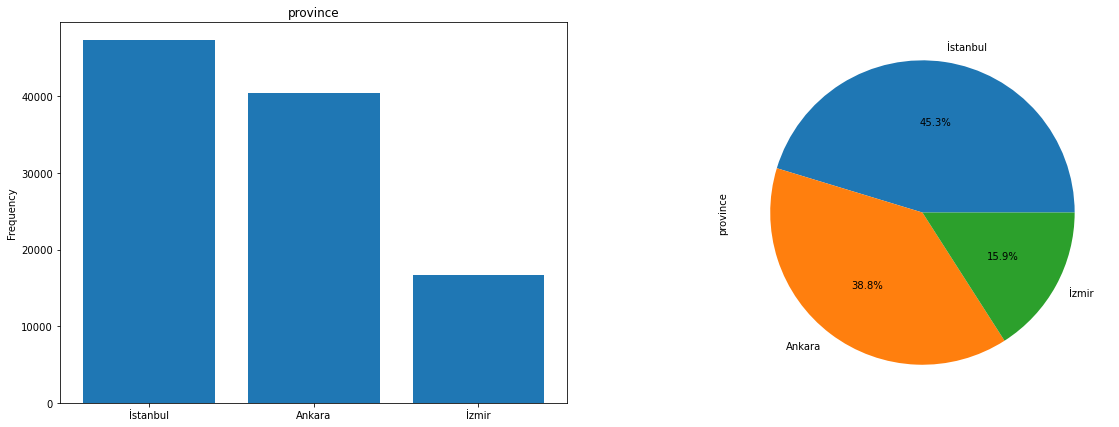

province: 
İstanbul    47284
Ankara      40470
İzmir       16631
Name: province, dtype: int64


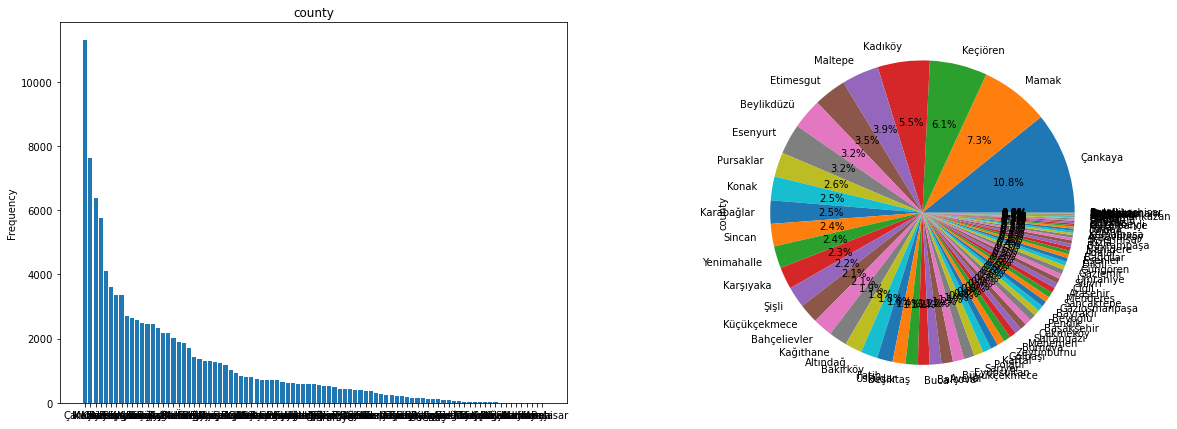

county: 
Çankaya            11286
Mamak               7625
Keçiören            6377
Kadıköy             5764
Maltepe             4110
                   ...  
Nallıhan               2
Haymana                2
Şereflikoçhisar        2
Ayaş                   1
Bala                   1
Name: county, Length: 89, dtype: int64


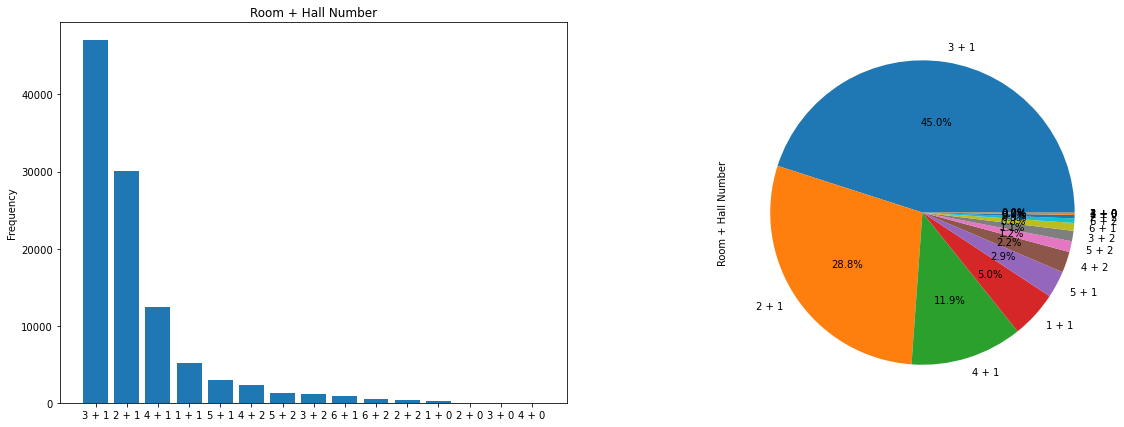

Room + Hall Number: 
3 + 1    47011
2 + 1    30083
4 + 1    12418
1 + 1     5207
5 + 1     2987
4 + 2     2311
5 + 2     1208
3 + 2     1154
6 + 1      866
6 + 2      493
2 + 2      385
1 + 0      216
2 + 0       23
3 + 0       12
4 + 0       11
Name: Room + Hall Number, dtype: int64


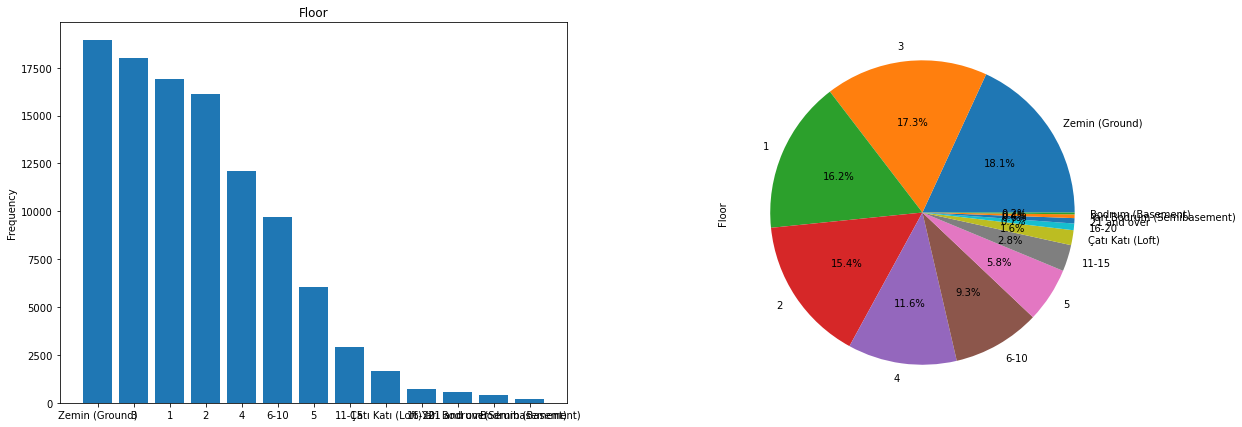

Floor: 
Zemin (Ground)                18924
3                             18026
1                             16915
2                             16117
4                             12089
6-10                           9718
5                              6069
11-15                          2935
Çatı Katı (Loft)               1654
16-20                           736
21 and over                     590
Yarı Bodrum (Semibasement)      413
Bodrum (Basement)               199
Name: Floor, dtype: int64


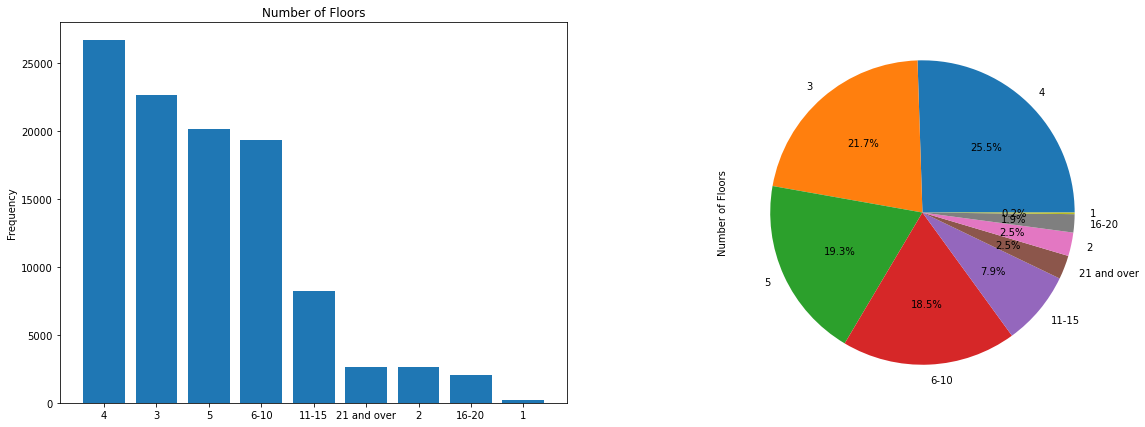

Number of Floors: 
4              26636
3              22646
5              20101
6-10           19349
11-15           8210
21 and over     2639
2               2607
16-20           2021
1                176
Name: Number of Floors, dtype: int64


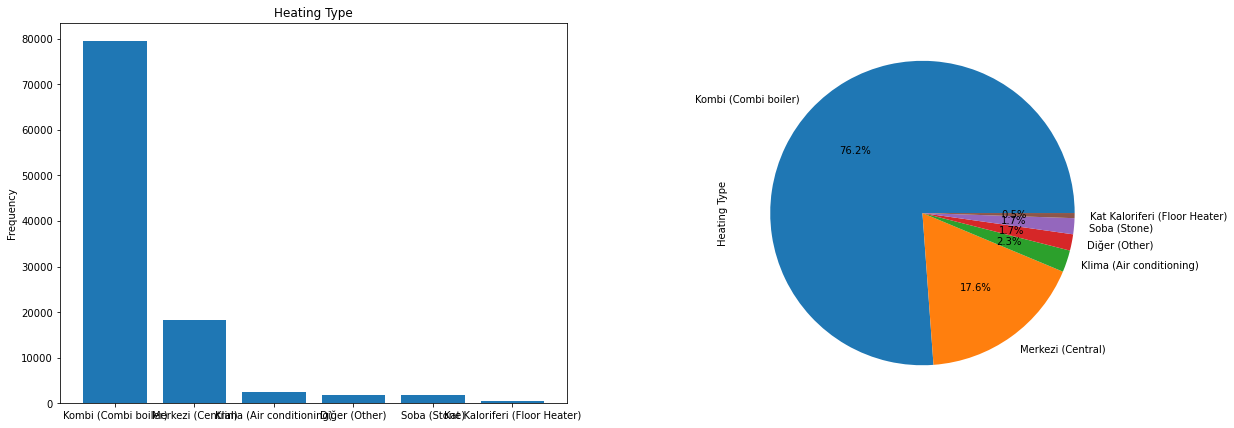

Heating Type: 
Kombi (Combi boiler)             79498
Merkezi (Central)                18320
Klima (Air conditioning)          2425
Diğer (Other)                     1809
Soba (Stone)                      1770
Kat Kaloriferi (Floor Heater)      563
Name: Heating Type, dtype: int64


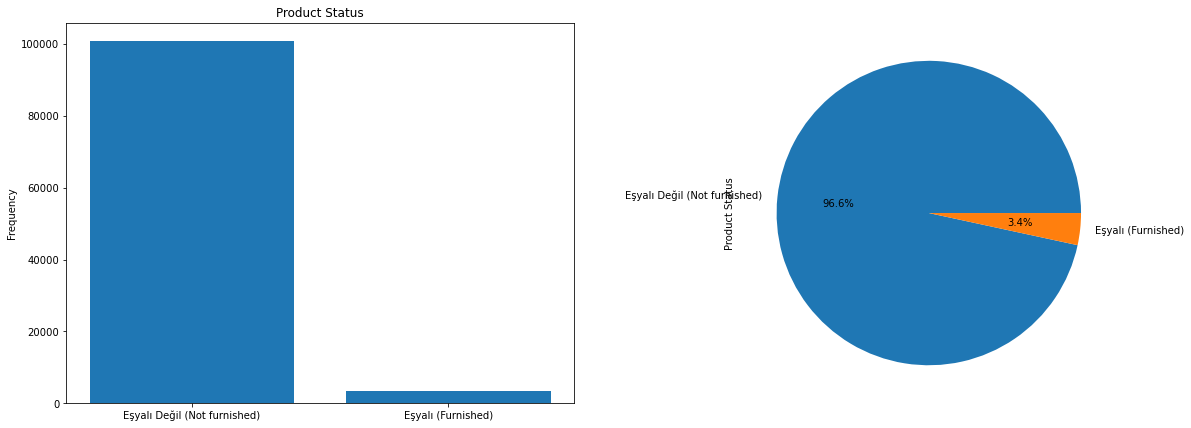

Product Status: 
Eşyalı Değil (Not furnished)    100851
Eşyalı (Furnished)                3534
Name: Product Status, dtype: int64


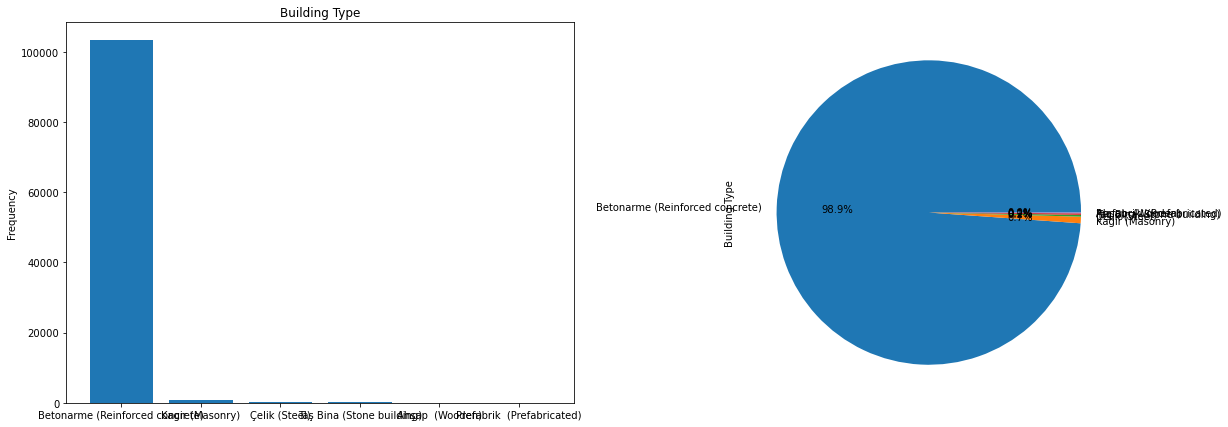

Building Type: 
Betonarme (Reinforced concrete)    103209
Kagir (Masonry)                       724
Çelik (Steel)                         193
Taş Bina (Stone building)             173
Ahşap  (Wooden)                        80
Prefabrik  (Prefabricated)              6
Name: Building Type, dtype: int64


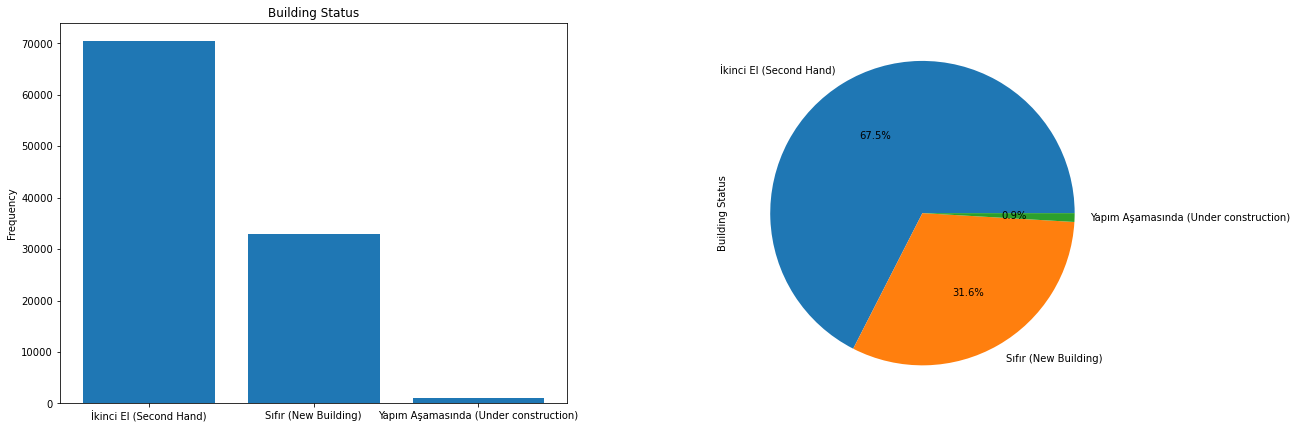

Building Status: 
İkinci El (Second Hand)                  70444
Sıfır (New Building)                     32975
Yapım Aşamasında (Under construction)      966
Name: Building Status, dtype: int64


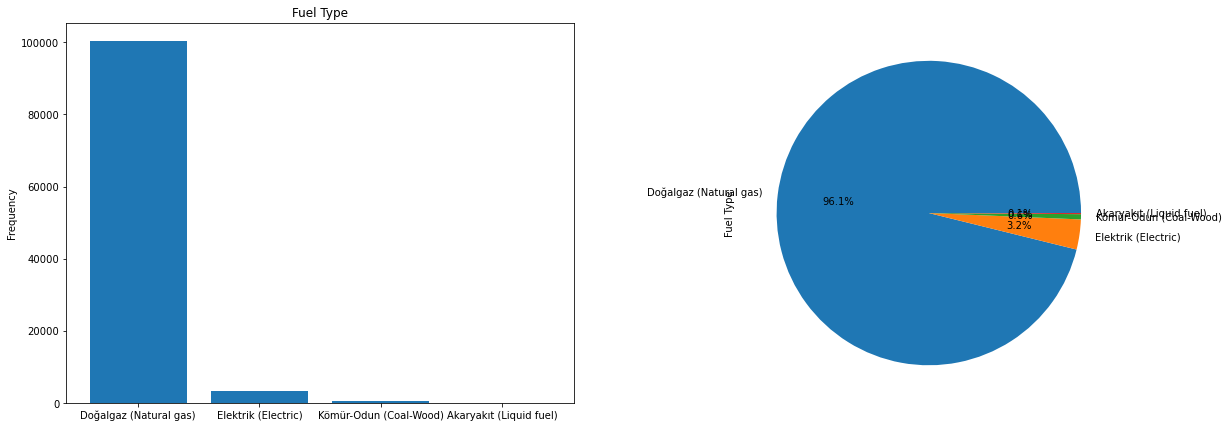

Fuel Type: 
Doğalgaz (Natural gas)     100359
Elektrik (Electric)          3328
Kömür-Odun (Coal-Wood)        575
Akaryakıt (Liquid fuel)       123
Name: Fuel Type, dtype: int64


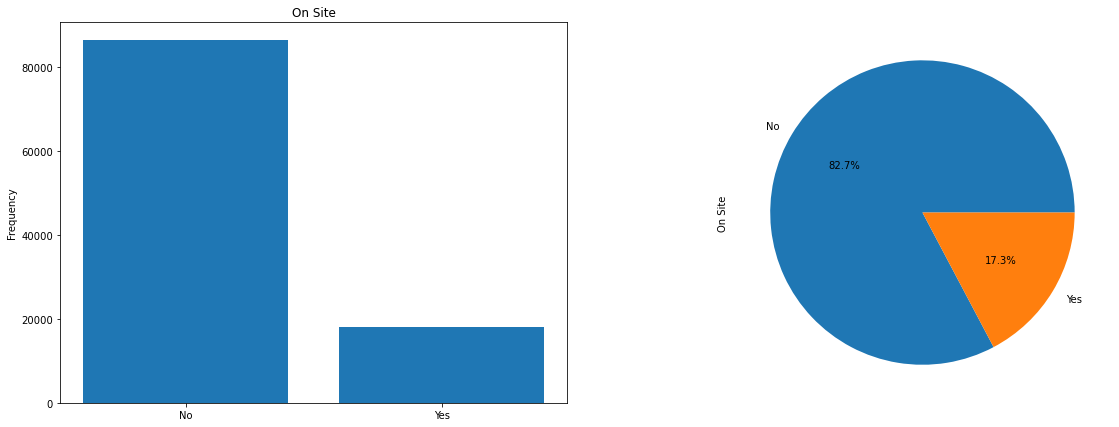

On Site: 
No     86371
Yes    18014
Name: On Site, dtype: int64


In [293]:
category = list(df.select_dtypes(include="object").columns)
category = ['province', 'county', 'Room + Hall Number', 'Floor', 'Number of Floors', 'Heating Type', 
            'Product Status', 'Building Type', 'Building Status', 'Fuel Type', 'On Site']
for i in category:
    plots(i)

In [294]:
list(df.select_dtypes(exclude="object").columns)

['date',
 'Gross_M2',
 'Net_M2',
 'Building Age',
 'Number of Bathrooms',
 'Facade_count',
 'dolar',
 'construction_cost_index',
 'smup']

### Numerical Variable

In [295]:
def plot_hist(variable):
    plt.figure(figsize= (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))      
    plt.show()

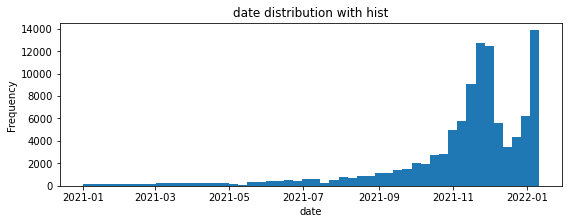

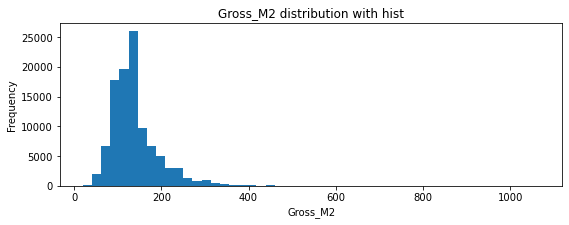

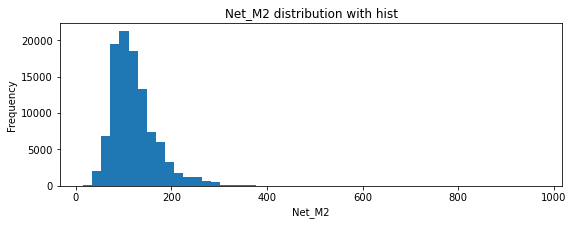

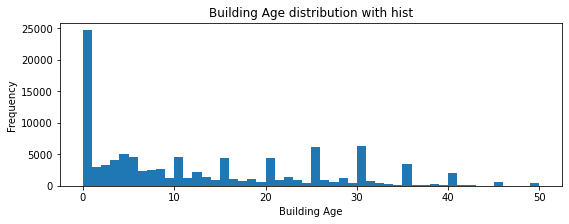

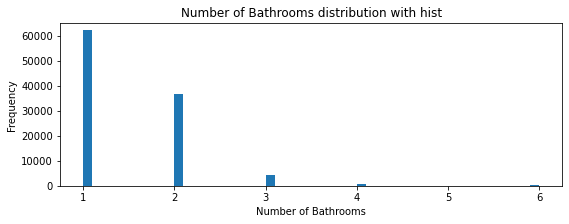

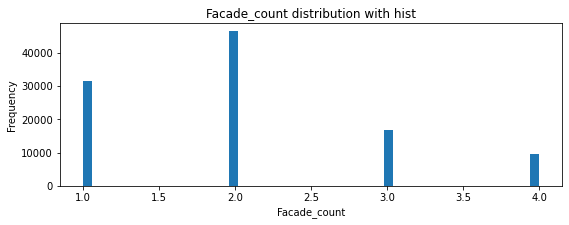

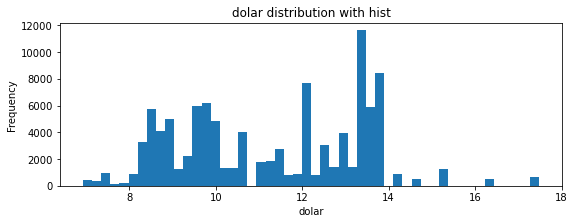

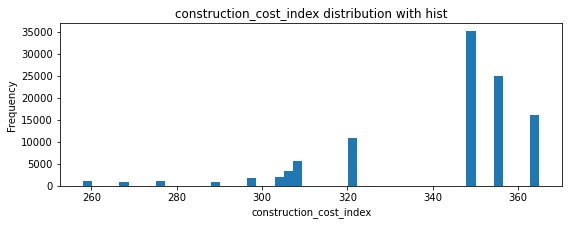

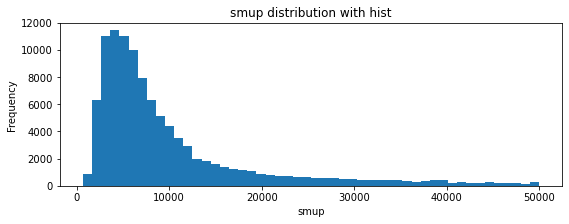

In [296]:
numeric = list(df.select_dtypes(exclude="object").columns)
for i in numeric:
    plot_hist(i)

In [297]:
df.set_index('date', inplace=True)

In [298]:
df = df.sort_index()

In [299]:
df

province       county   neighborhood Room + Hall Number  Gross_M2  \
date                                                                           
2021-01-01    İzmir        Konak         Atilla              2 + 1     85.00   
2021-01-01   Ankara       Sincan  Mustafa Kemal              4 + 1    220.00   
2021-01-01    İzmir      Balçova         Eğitim              2 + 1     90.00   
2021-01-01    İzmir      Balçova      Teleferik              3 + 1    145.00   
2021-01-01    İzmir      Torbalı        Torbalı              3 + 1    140.00   
...             ...          ...            ...                ...       ...   
2022-01-11   Ankara     Keçiören          Yayla              3 + 1    150.00   
2022-01-11   Ankara     Altındağ  Feridun Çelik              3 + 1    135.00   
2022-01-11   Ankara     Keçiören       19 Mayıs              3 + 1    120.00   
2022-01-11   Ankara      Çankaya      Gökkuşağı              3 + 1    140.00   
2022-01-11   Ankara  Yenimahalle       Esentepe              2 + 1     90.00   

            Net_M2           Floor Number of Floors  Building Age  \
date                                                                
2021-01-01      84               4                4             0   
2021-01-01     178               2                4             0   
2021-01-01      85               4                4             9   
2021-01-01     135               2                4             0   
2021-01-01     120            6-10             6-10            20   
...            ...             ...              ...           ...   
2022-01-11     135               3                3             5   
2022-01-11     120               3             6-10             0   
2022-01-11     110  Zemin (Ground)                3            17   
2022-01-11     128  Zemin (Ground)                4            12   
2022-01-11      80               1                3            20   

                    Heating Type                Product Status  \
date                                                             
2021-01-01  Kombi (Combi boiler)            Eşyalı (Furnished)   
2021-01-01  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
2021-01-01  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
2021-01-01         Diğer (Other)  Eşyalı Değil (Not furnished)   
2021-01-01  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
...                          ...                           ...   
2022-01-11  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
2022-01-11  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
2022-01-11  Kombi (Combi boiler)            Eşyalı (Furnished)   
2022-01-11  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
2022-01-11  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   

            Number of Bathrooms                    Building Type  \
date                                                               
2021-01-01                    1  Betonarme (Reinforced concrete)   
2021-01-01                    2  Betonarme (Reinforced concrete)   
2021-01-01                    1  Betonarme (Reinforced concrete)   
2021-01-01                    1  Betonarme (Reinforced concrete)   
2021-01-01                    1  Betonarme (Reinforced concrete)   
...                         ...                              ...   
2022-01-11                    2  Betonarme (Reinforced concrete)   
2022-01-11                    2  Betonarme (Reinforced concrete)   
2022-01-11                    1  Betonarme (Reinforced concrete)   
2022-01-11                    2  Betonarme (Reinforced concrete)   
2022-01-11                    1  Betonarme (Reinforced concrete)   

                    Building Status               Fuel Type  Facade_count  \
date                                                                        
2021-01-01     Sıfır (New Building)  Doğalgaz (Natural gas)             4   
2021-01-01     Sıfır (New Building)  Doğalgaz (Natural gas)             2   
2021-01-01  İkinci E

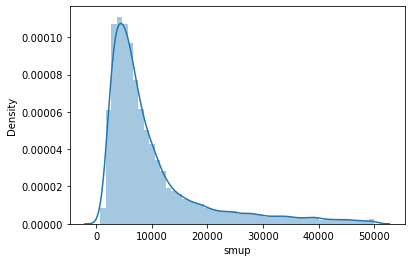

In [300]:
sns.distplot(df.smup, bins=50); 

<Figure size 1440x360 with 0 Axes>

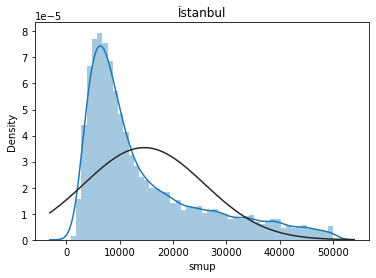

<Figure size 1440x360 with 0 Axes>

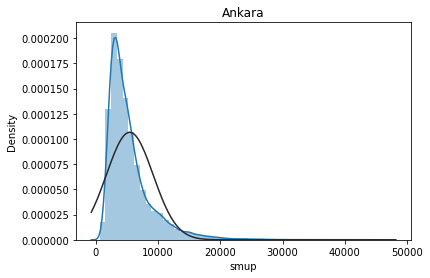

<Figure size 1440x360 with 0 Axes>

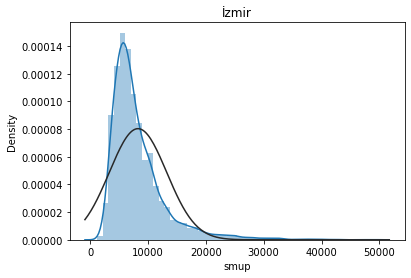

In [301]:
# M2 birim fiyatların(smup) il bazlı grafikleri
# Province-based graphics of smup
for i in list(df.province.value_counts().keys()):
    plt.figure(figsize= (20,5))
    plt.figure(i)
    plt.title(i)
    sns.distplot(df[df.province == i]["smup"], bins=50, fit=norm)
    

In [302]:
# sns.pairplot(df);

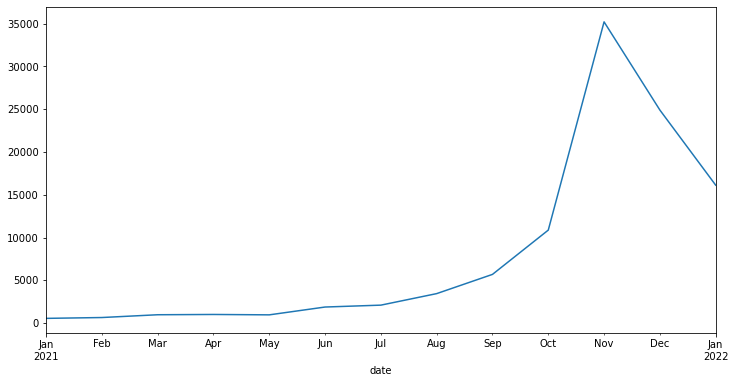

In [303]:
# smup count by month
prices = df.resample('M').count()
fig, ax = plt.subplots(figsize=(12,6))
prices['smup'].plot()
plt.show()

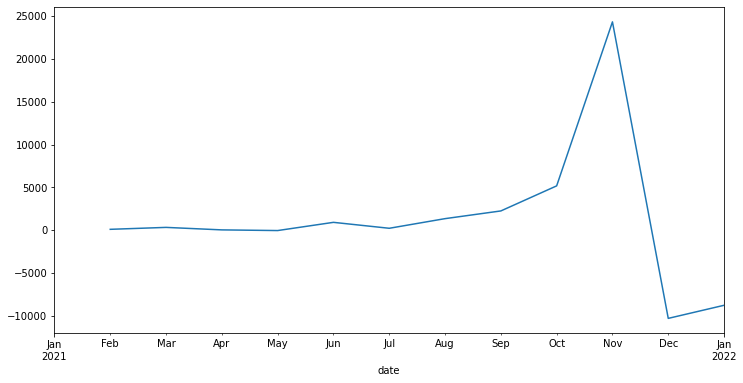

In [304]:
# smup count differences by month
prices = prices.diff()

fig, ax = plt.subplots(figsize=(12,6))
prices['smup'].plot()
plt.show()

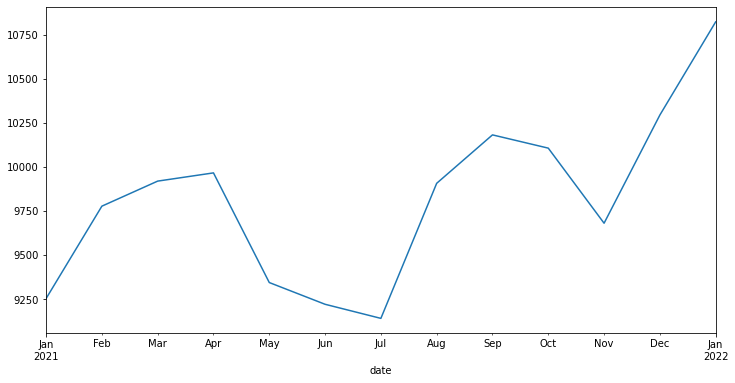

In [305]:
# smup mean by month
prices = df.resample('M').mean()
fig, ax = plt.subplots(figsize=(12,6))
prices['smup'].plot()
plt.show()

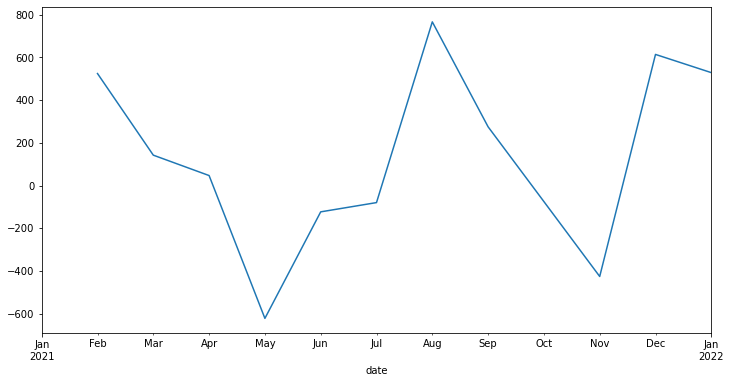

In [306]:
# smup mean differences by month
prices = prices.diff()

fig, ax = plt.subplots(figsize=(12,6))
prices['smup'].plot()
plt.show()

In [307]:
# sns.set(rc={'figure.figsize':(15,8)})
# sns.countplot(df.index)

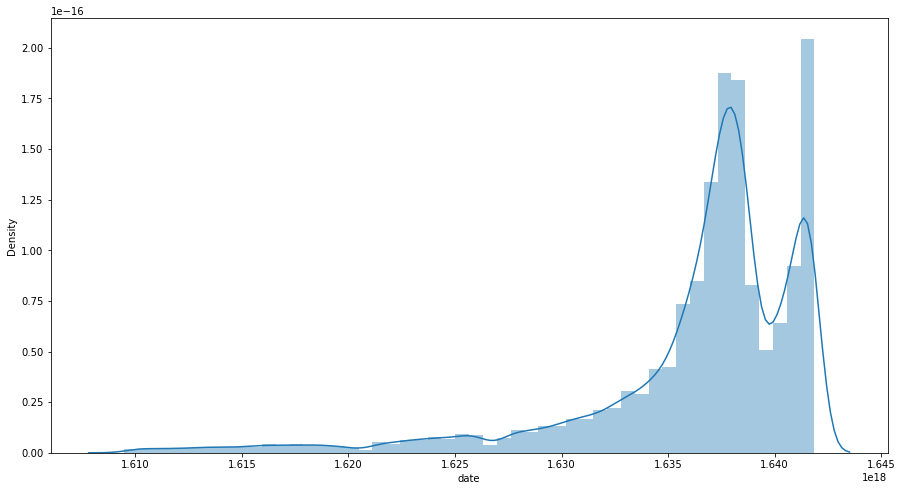

In [308]:
plt.figure(figsize=(15,8))
ax = sns.distplot(df.index)

## Statistical Analysis

### Correlation of features with sales-price

In [309]:
df.describe().T

count     mean     std    min     25%     50%  \
Gross_M2                104385.00   138.64   55.07  20.00  100.00  130.00   
Net_M2                  104385.00   122.75   48.36  15.00   90.00  115.00   
Building Age            104385.00    12.59   12.36   0.00    1.00    9.00   
Number of Bathrooms     104385.00     1.47    0.65   1.00    1.00    1.00   
Facade_count            104385.00     2.04    0.91   1.00    1.00    2.00   
dolar                   104385.00    11.28    2.12   6.92    9.49   11.40   
construction_cost_index 104385.00   341.20   23.40 258.00  322.00  348.00   
smup                    104385.00 10065.30 9217.53 666.00 4305.00 6769.00   

                             75%      max  
Gross_M2                  160.00  1067.00  
Net_M2                    140.00   970.00  
Building Age               23.00    50.00  
Number of Bathrooms         2.00     6.00  
Facade_count                3.00     4.00  
dolar                      13.38    17.49  
construction_cost_index   355.00   365.00  
smup                    11578.00 50000.00

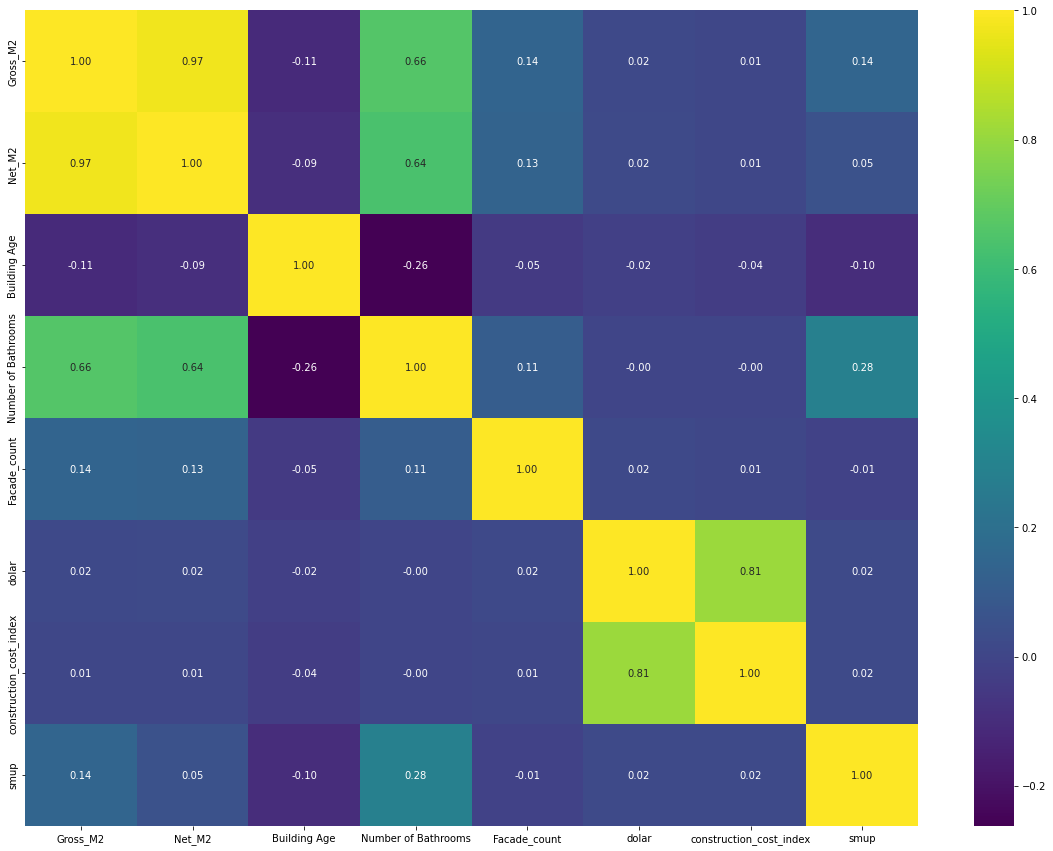

In [310]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "viridis");

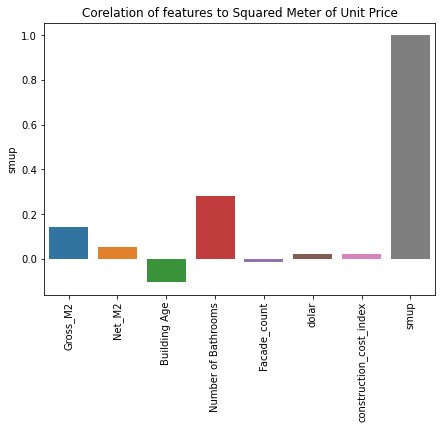

In [311]:
corr = df.corr().smup
plt.figure(figsize = (7,5))
sns.barplot(x = corr.index, y = corr)
plt.title("Corelation of features to Squared Meter of Unit Price")
plt.xticks(rotation=90);

In [312]:
corr = df.corr().smup
corr[np.argsort(corr, axis= 0)[:-1]]

Building Age              -0.10
Facade_count              -0.01
construction_cost_index    0.02
dolar                      0.02
Net_M2                     0.05
Gross_M2                   0.14
Number of Bathrooms        0.28
Name: smup, dtype: float64

<AxesSubplot:>

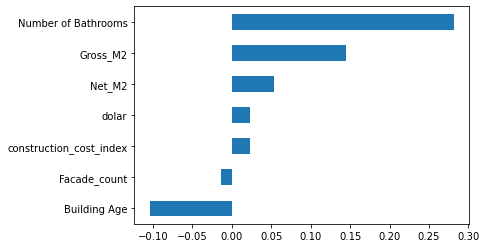

In [313]:
df.corr()['smup'].drop('smup').sort_values().plot.barh()

### Examine Multicollinearty 

In [314]:
# pozitive correlation
df.corr()[(df.corr() > 0.9) & (df.corr() < 1)].any()

Gross_M2                    True
Net_M2                      True
Building Age               False
Number of Bathrooms        False
Facade_count               False
dolar                      False
construction_cost_index    False
smup                       False
dtype: bool

In [315]:
# negative correlation
df.corr()[(df.corr() < -0.9) & (df.corr() > -1)].any() 

Gross_M2                   False
Net_M2                     False
Building Age               False
Number of Bathrooms        False
Facade_count               False
dolar                      False
construction_cost_index    False
smup                       False
dtype: bool

In [316]:
#Gross_M2 ve Net_M2 sütunları arasında pozitif yönlü corelasyon bulunmaktadır. Modellememizin başarısı için GrossM2 sütununu düşürüyoruz.
#There is a positive correlation between Gross_M2 and Net_M2 columns. For the success of our modeling, we drop the GrossM2 column.

In [317]:
df.head()

province   county   neighborhood Room + Hall Number  Gross_M2  \
date                                                                       
2021-01-01    İzmir    Konak         Atilla              2 + 1     85.00   
2021-01-01   Ankara   Sincan  Mustafa Kemal              4 + 1    220.00   
2021-01-01    İzmir  Balçova         Eğitim              2 + 1     90.00   
2021-01-01    İzmir  Balçova      Teleferik              3 + 1    145.00   
2021-01-01    İzmir  Torbalı        Torbalı              3 + 1    140.00   

            Net_M2 Floor Number of Floors  Building Age          Heating Type  \
date                                                                            
2021-01-01      84     4                4             0  Kombi (Combi boiler)   
2021-01-01     178     2                4             0  Kombi (Combi boiler)   
2021-01-01      85     4                4             9  Kombi (Combi boiler)   
2021-01-01     135     2                4             0         Diğer (Other)   
2021-01-01     120  6-10             6-10            20  Kombi (Combi boiler)   

                          Product Status  Number of Bathrooms  \
date                                                            
2021-01-01            Eşyalı (Furnished)                    1   
2021-01-01  Eşyalı Değil (Not furnished)                    2   
2021-01-01  Eşyalı Değil (Not furnished)                    1   
2021-01-01  Eşyalı Değil (Not furnished)                    1   
2021-01-01  Eşyalı Değil (Not furnished)                    1   

                              Building Type          Building Status  \
date                                                                   
2021-01-01  Betonarme (Reinforced concrete)     Sıfır (New Building)   
2021-01-01  Betonarme (Reinforced concrete)     Sıfır (New Building)   
2021-01-01  Betonarme (Reinforced concrete)  İkinci El (Second Hand)   
2021-01-01  Betonarme (Reinforced concrete)     Sıfır (New Building)   
2021-01-01  Betonarme (Reinforced concrete)  İkinci El (Second Hand)   

                         Fuel Type  Facade_count On Site  dolar  \
date                                                              
2021-01-01  Doğalgaz (Natural gas)             4      No   7.35   
2021-01-01  Doğalgaz (Natural gas)             2      No   7.35   
2021-01-01  Doğalgaz (Natural gas)             2      No   7.35   
2021-01-01  Doğalgaz (Natural gas)             2     Yes   7.35   
2021-01-01  Doğalgaz (Natural gas)             2     Yes   7.35   

            construction_cost_index   smup  
date                                        
2021-01-01                      258   7380  
2021-01-01                      258   4876  
2021-01-01                      258   8000  
2021-01-01                      258  12962  
2021-01-01                      258   3750

In [318]:
df = df.drop("Gross_M2", axis = 1)

In [319]:
df.head()

province   county   neighborhood Room + Hall Number  Net_M2 Floor  \
date                                                                           
2021-01-01    İzmir    Konak         Atilla              2 + 1      84     4   
2021-01-01   Ankara   Sincan  Mustafa Kemal              4 + 1     178     2   
2021-01-01    İzmir  Balçova         Eğitim              2 + 1      85     4   
2021-01-01    İzmir  Balçova      Teleferik              3 + 1     135     2   
2021-01-01    İzmir  Torbalı        Torbalı              3 + 1     120  6-10   

           Number of Floors  Building Age          Heating Type  \
date                                                              
2021-01-01                4             0  Kombi (Combi boiler)   
2021-01-01                4             0  Kombi (Combi boiler)   
2021-01-01                4             9  Kombi (Combi boiler)   
2021-01-01                4             0         Diğer (Other)   
2021-01-01             6-10            20  Kombi (Combi boiler)   

                          Product Status  Number of Bathrooms  \
date                                                            
2021-01-01            Eşyalı (Furnished)                    1   
2021-01-01  Eşyalı Değil (Not furnished)                    2   
2021-01-01  Eşyalı Değil (Not furnished)                    1   
2021-01-01  Eşyalı Değil (Not furnished)                    1   
2021-01-01  Eşyalı Değil (Not furnished)                    1   

                              Building Type          Building Status  \
date                                                                   
2021-01-01  Betonarme (Reinforced concrete)     Sıfır (New Building)   
2021-01-01  Betonarme (Reinforced concrete)     Sıfır (New Building)   
2021-01-01  Betonarme (Reinforced concrete)  İkinci El (Second Hand)   
2021-01-01  Betonarme (Reinforced concrete)     Sıfır (New Building)   
2021-01-01  Betonarme (Reinforced concrete)  İkinci El (Second Hand)   

                         Fuel Type  Facade_count On Site  dolar  \
date                                                              
2021-01-01  Doğalgaz (Natural gas)             4      No   7.35   
2021-01-01  Doğalgaz (Natural gas)             2      No   7.35   
2021-01-01  Doğalgaz (Natural gas)             2      No   7.35   
2021-01-01  Doğalgaz (Natural gas)             2     Yes   7.35   
2021-01-01  Doğalgaz (Natural gas)             2     Yes   7.35   

            construction_cost_index   smup  
date                                        
2021-01-01                      258   7380  
2021-01-01                      258   4876  
2021-01-01                      258   8000  
2021-01-01                      258  12962  
2021-01-01                      258   3750

## Outlier Detection

In [320]:
df = df.reset_index()

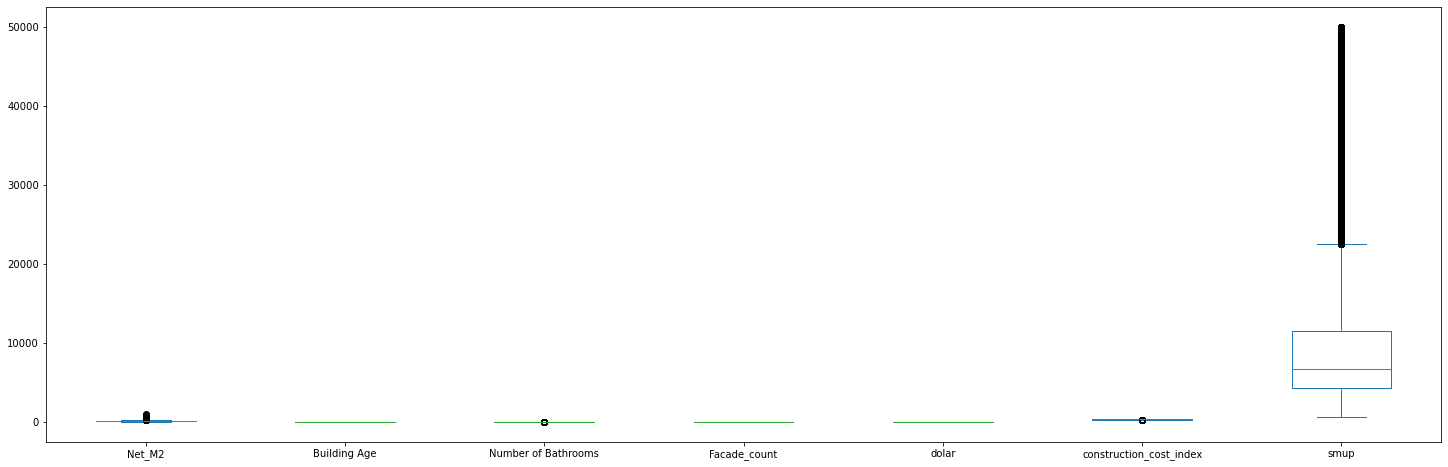

In [321]:
# xx = df.drop("smup", axis = 1)
df.plot(kind='box', return_type='axes', figsize=(25,8))
plt.show()

In [322]:
def outlier_detect_function(col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - IQR*1.5
    upper_limit = Q3 + IQR*1.5
    lower_outlier = (df[col] < (lower_limit)) # outliers that under the lower limit
    upper_outlier = (df[col] > (upper_limit)) # outliers that above the upper limit
    all_outlier = (df[col] > (upper_limit)) | (df[col] > (upper_limit)) # all outliers
    print(f"********* ({col}) *********")
    print("Total Object Count \t: ", df[col].shape[0])
    print("Lower Limit \t\t: " + "%.2f" % (lower_limit))
    print("Upper Limit \t\t: " + "%.2f" % (upper_limit))
    print("Total Lower Outliers \t: ", df[lower_outlier].shape[0])
    print("Total Upper Outliers \t: ", df[upper_outlier].shape[0])
    print("Total Outliers \t\t: ", df[lower_outlier].shape[0] + df[upper_outlier].shape[0])
    print("") 

In [323]:
col = "smup"
outlier_detect_function(col)

********* (smup) *********
Total Object Count 	:  104385
Lower Limit 		: -6604.50
Upper Limit 		: 22487.50
Total Lower Outliers 	:  0
Total Upper Outliers 	:  10710
Total Outliers 		:  10710



In [324]:
Q1 = np.percentile(df[col], 25)
Q3 = np.percentile(df[col], 75)
IQR = Q3 - Q1
lower_limit = Q1 - IQR*1.5
upper_limit = Q3 + IQR*1.5
all_outlier = (df[col] > (upper_limit)) | (df[col] > (upper_limit)) # all outliers
df[all_outlier]

date  province      county    neighborhood Room + Hall Number  \
54     2021-01-05  İstanbul     Kadıköy        19 Mayıs              4 + 1   
59     2021-01-06  İstanbul   Kağıthane         Nurtepe              3 + 1   
61     2021-01-06  İstanbul     Sarıyer     Zekeriyaköy              2 + 1   
63     2021-01-06  İstanbul  Eyüpsultan  Göktürk Merkez              3 + 1   
66     2021-01-06  İstanbul  Eyüpsultan  Göktürk Merkez              3 + 1   
...           ...       ...         ...             ...                ...   
103195 2022-01-11    Ankara     Çankaya      Çukurambar              2 + 1   
103200 2022-01-11    Ankara     Çankaya   Mustafa Kemal              2 + 1   
103920 2022-01-11    Ankara     Çankaya      Kızılırmak              4 + 1   
103928 2022-01-11    Ankara     Çankaya      Çukurambar              4 + 1   
104110 2022-01-11    Ankara     Çankaya       Konutkent              2 + 1   

        Net_M2             Floor Number of Floors  Building Age  \
54         135                 2            11-15            28   
59          90             11-15            11-15             0   
61          90                 2                5             3   
63         195  Çatı Katı (Loft)                5             4   
66         195  Çatı Katı (Loft)                5             4   
...        ...               ...              ...           ...   
103195      88                 3                5             0   
103200     130             11-15      21 and over             2   
103920     200             16-20      21 and over             0   
103928     180                 2                5            13   
104110      85             11-15      21 and over             0   

                Heating Type                Product Status  \
54         Merkezi (Central)  Eşyalı Değil (Not furnished)   
59         Merkezi (Central)  Eşyalı Değil (Not furnished)   
61         Merkezi (Central)  Eşyalı Değil (Not furnished)   
63         Merkezi (Central)  Eşyalı Değil (Not furnished)   
66         Merkezi (Central)  Eşyalı Değil (Not furnished)   
...                      ...                           ...   
103195     Merkezi (Central)  Eşyalı Değil (Not furnished)   
103200     Merkezi (Central)            Eşyalı (Furnished)   
103920     Merkezi (Central)  Eşyalı Değil (Not furnished)   
103928  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
104110     Merkezi (Central)  Eşyalı Değil (Not furnished)   

        Number of Bathrooms                    Building Type  \
54                        2  Betonarme (Reinforced concrete)   
59                        2  Betonarme (Reinforced concrete)   
61                        1  Betonarme (Reinforced concrete)   
63                        3  Betonarme (Reinforced concrete)   
66                        3  Betonarme (Reinforced concrete)   
...                     ...                              ...   
103195                    1  Betonarme (Reinforced concrete)   
103200                    2  Betonarme (Reinforced concrete)   
103920                    3  Betonarme (Reinforced concrete)   
103928                    2  Betonarme (Reinforced concrete)   
104110                    2  Betonarme (Reinforced concrete)   

                Building Status               Fuel Type  Facade_count On Site  \
54      İkinci El (Second Hand)  Doğalgaz (Natural gas)             1      No   
59         Sıfır (New Building)  Doğalgaz (Natural gas)             2     Yes   
61      İkinci El (Second Hand)  Doğalgaz (Natural gas)             1      No   
63         Sıfır (New Building)  Doğalgaz (Natural gas)             4     Yes   
66         Sıfır (New Building)  Doğalgaz (Natural gas)             4     Yes   
...                         ...                     ...           ...     ...   
103195     Sıfır (New Building)  Doğalgaz (Natural gas)             2      No   
103200  İkinci El (Second Hand)  Doğalgaz (Natural gas)             2      No   
103920     Sıfır (New Buildi

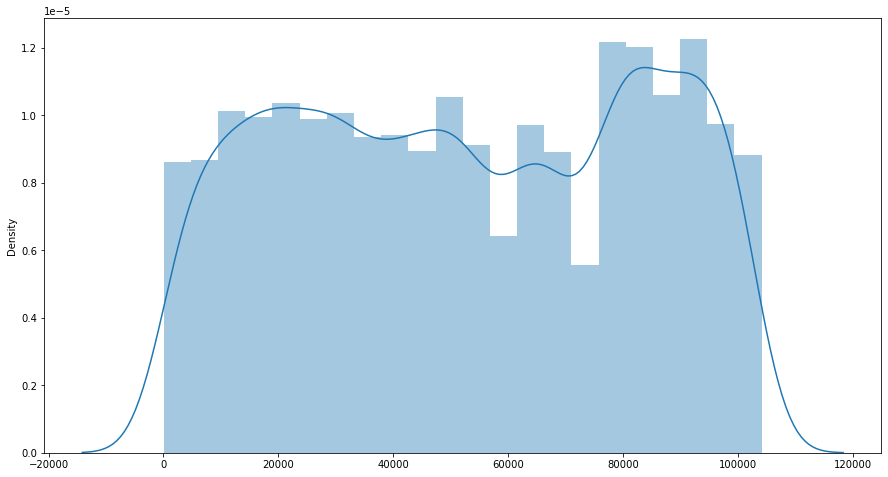

In [325]:
plt.figure(figsize=(15,8))
ax = sns.distplot(df[all_outlier].index)

In [326]:
df.drop(df[all_outlier].index)

date province       county   neighborhood Room + Hall Number  \
0      2021-01-01    İzmir        Konak         Atilla              2 + 1   
1      2021-01-01   Ankara       Sincan  Mustafa Kemal              4 + 1   
2      2021-01-01    İzmir      Balçova         Eğitim              2 + 1   
3      2021-01-01    İzmir      Balçova      Teleferik              3 + 1   
4      2021-01-01    İzmir      Torbalı        Torbalı              3 + 1   
...           ...      ...          ...            ...                ...   
104380 2022-01-11   Ankara     Keçiören          Yayla              3 + 1   
104381 2022-01-11   Ankara     Altındağ  Feridun Çelik              3 + 1   
104382 2022-01-11   Ankara     Keçiören       19 Mayıs              3 + 1   
104383 2022-01-11   Ankara      Çankaya      Gökkuşağı              3 + 1   
104384 2022-01-11   Ankara  Yenimahalle       Esentepe              2 + 1   

        Net_M2           Floor Number of Floors  Building Age  \
0           84               4                4             0   
1          178               2                4             0   
2           85               4                4             9   
3          135               2                4             0   
4          120            6-10             6-10            20   
...        ...             ...              ...           ...   
104380     135               3                3             5   
104381     120               3             6-10             0   
104382     110  Zemin (Ground)                3            17   
104383     128  Zemin (Ground)                4            12   
104384      80               1                3            20   

                Heating Type                Product Status  \
0       Kombi (Combi boiler)            Eşyalı (Furnished)   
1       Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
2       Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
3              Diğer (Other)  Eşyalı Değil (Not furnished)   
4       Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
...                      ...                           ...   
104380  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
104381  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
104382  Kombi (Combi boiler)            Eşyalı (Furnished)   
104383  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   
104384  Kombi (Combi boiler)  Eşyalı Değil (Not furnished)   

        Number of Bathrooms                    Building Type  \
0                         1  Betonarme (Reinforced concrete)   
1                         2  Betonarme (Reinforced concrete)   
2                         1  Betonarme (Reinforced concrete)   
3                         1  Betonarme (Reinforced concrete)   
4                         1  Betonarme (Reinforced concrete)   
...                     ...                              ...   
104380                    2  Betonarme (Reinforced concrete)   
104381                    2  Betonarme (Reinforced concrete)   
104382                    1  Betonarme (Reinforced concrete)   
104383                    2  Betonarme (Reinforced concrete)   
104384                    1  Betonarme (Reinforced concrete)   

                Building Status               Fuel Type  Facade_count On Site  \
0          Sıfır (New Building)  Doğalgaz (Natural gas)             4      No   
1          Sıfır (New Building)  Doğalgaz (Natural gas)             2      No   
2       İkinci El (Second Hand)  Doğalgaz (Natural gas)             2      No   
3          Sıfır (New Building)  Doğalgaz (Natural gas)             2     Yes   
4       İkinci El (Second Hand)  Doğalgaz (Natural gas)             2     Yes   
...                         ...                     ...           ...     ...   
104380  İkinci El (Second Hand)  Doğalgaz (Natural gas)             2      No   
104381     Sıfır (New Building)  Doğalgaz (Natural gas)             4      No   
104382  İkinci El (Second Hand)  Doğalgaz (Natural gas)         

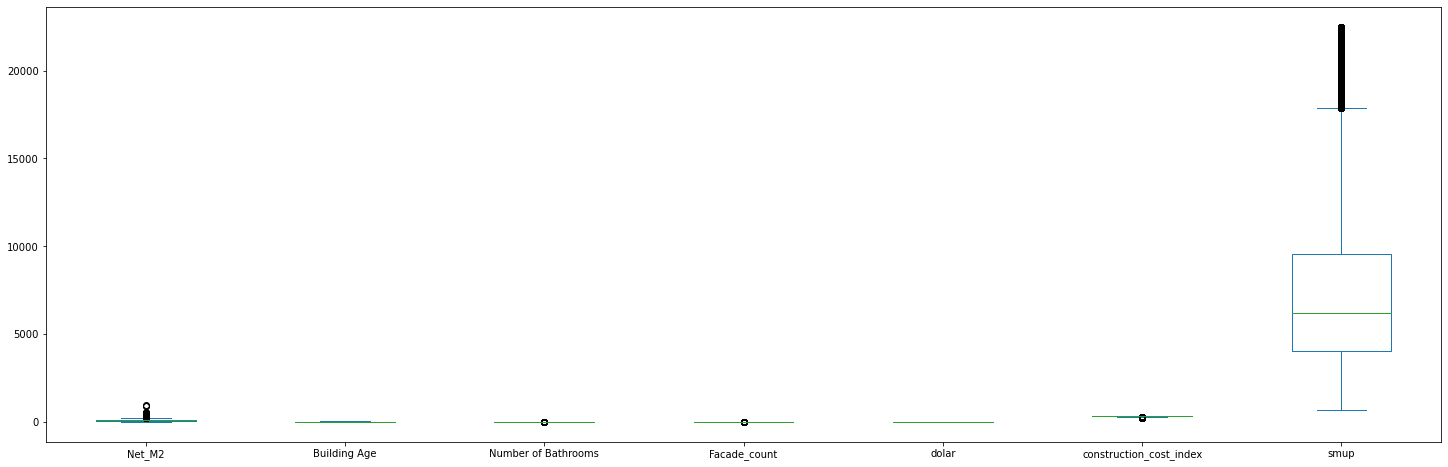

In [327]:
df.drop(df[all_outlier].index).plot(kind='box', return_type='axes', figsize=(25,8))
plt.show()

In [328]:
df.to_csv("df_cleaned.csv")

## Determine Dependent(Target) and Independent Variables(Features)

In [329]:
df = df.set_index("date")

In [330]:
dff = df.copy()

In [331]:
X = df.drop("smup", axis = 1)
y = df.smup

In [332]:
X.head()

province   county   neighborhood Room + Hall Number  Net_M2 Floor  \
date                                                                           
2021-01-01    İzmir    Konak         Atilla              2 + 1      84     4   
2021-01-01   Ankara   Sincan  Mustafa Kemal              4 + 1     178     2   
2021-01-01    İzmir  Balçova         Eğitim              2 + 1      85     4   
2021-01-01    İzmir  Balçova      Teleferik              3 + 1     135     2   
2021-01-01    İzmir  Torbalı        Torbalı              3 + 1     120  6-10   

           Number of Floors  Building Age          Heating Type  \
date                                                              
2021-01-01                4             0  Kombi (Combi boiler)   
2021-01-01                4             0  Kombi (Combi boiler)   
2021-01-01                4             9  Kombi (Combi boiler)   
2021-01-01                4             0         Diğer (Other)   
2021-01-01             6-10            20  Kombi (Combi boiler)   

                          Product Status  Number of Bathrooms  \
date                                                            
2021-01-01            Eşyalı (Furnished)                    1   
2021-01-01  Eşyalı Değil (Not furnished)                    2   
2021-01-01  Eşyalı Değil (Not furnished)                    1   
2021-01-01  Eşyalı Değil (Not furnished)                    1   
2021-01-01  Eşyalı Değil (Not furnished)                    1   

                              Building Type          Building Status  \
date                                                                   
2021-01-01  Betonarme (Reinforced concrete)     Sıfır (New Building)   
2021-01-01  Betonarme (Reinforced concrete)     Sıfır (New Building)   
2021-01-01  Betonarme (Reinforced concrete)  İkinci El (Second Hand)   
2021-01-01  Betonarme (Reinforced concrete)     Sıfır (New Building)   
2021-01-01  Betonarme (Reinforced concrete)  İkinci El (Second Hand)   

                         Fuel Type  Facade_count On Site  dolar  \
date                                                              
2021-01-01  Doğalgaz (Natural gas)             4      No   7.35   
2021-01-01  Doğalgaz (Natural gas)             2      No   7.35   
2021-01-01  Doğalgaz (Natural gas)             2      No   7.35   
2021-01-01  Doğalgaz (Natural gas)             2     Yes   7.35   
2021-01-01  Doğalgaz (Natural gas)             2     Yes   7.35   

            construction_cost_index  
date                                 
2021-01-01                      258  
2021-01-01                      258  
2021-01-01                      258  
2021-01-01                      258  
2021-01-01                      258

In [333]:
y.head()

date
2021-01-01     7380
2021-01-01     4876
2021-01-01     8000
2021-01-01    12962
2021-01-01     3750
Name: smup, dtype: int64

## Onehot Encoding

In [334]:
X.select_dtypes(exclude="object").columns

Index(['Net_M2', 'Building Age', 'Number of Bathrooms', 'Facade_count',
       'dolar', 'construction_cost_index'],
      dtype='object')

In [335]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((MinMaxScaler(), X.select_dtypes(exclude="object").columns),
                        (OneHotEncoder(sparse=False, handle_unknown='ignore'), X.select_dtypes(include="object").columns))

In [336]:
# Alternafive

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer

# ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
#                                  df.select_dtypes(exclude="object").columns),
#                                 ('onehotencoder', OneHotEncoder(),
#                                  df.select_dtypes(include="object").columns)])

In [337]:
X_ohe = transformer.fit_transform(X)

In [338]:
X_ohe.shape

(104385, 1351)

## Statsmodels

In [339]:
import statsmodels.api as sm
lm = sm.OLS(y, X_ohe)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   smup   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     324.2
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:19:06   Log-Likelihood:            -1.0149e+06
No. Observations:              104385   AIC:                         2.033e+06
Df Residuals:                  103048   BIC:                         2.045e+06
Df Model:                        1336                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.749e+04    593.624    -29.456      0.000   -1.86e+04   -1.63e+04
x2         -8179.6795     80.417   -101.715      0.000   -8337.297   -8022.062
x3          4611.9413    143.027     32.245      0.000    4331.609    4892.273
x4          -192.9937     44.397     -4.347      0.000    -280.011    -105.977
x5          3239.5803    108.992     29.723      0.000    3025.958    3453.203
x6          -441.1055    100.712     -4.380      0.000    -638.499    -243.712
x7         -2269.5661    324.863     -6.986      0.000   -2906.294   -1632.839
x8          5781.5529    172.102     33.594      0.000    5444.234    6118.871
x9          1986.1418    200.413      9.910      0.000    1593.335    2378.948
x10          895.4431    732.611      1.222      0.222    -540.465    2331.351
x11        -3007.2518   1145.656     -2.625      0.009   -5252.722    -761.782
x12        -2389.8451    553.603     -4.317      0.000   -3474.899   -1304.791
x13         1617.0447    538.360      3.004      0.003     561.866    2672.223
x14        -6206.0108    490.246    -12.659      0.000   -7166.887   -5245.135
x15         7946.2218    283.793     28.000      0.000    7389.992    8502.452
x16        -4892.4652    296.651    -16.492      0.000   -5473.897   -4311.034
x17         1607.5100   2005.900      0.801      0.423   -2324.028    5539.048
x18          384.1331    213.180      1.802      0.072     -33.697     801.963
x19         6729.1610    399.628     16.839      0.000    5945.895    7512.427
x20         1343.3518   3912.553      0.343      0.731   -6325.202    9011.906
x21         2561.2306    369.246      6.936      0.000    1837.513    3284.948
x22        -3192.9606    400.727     -7.968      0.000   -3978.380   -2407.542
x23        -2948.3561    404.500     -7.289      0.000   -3741.171   -2155.542
x24        -2032.7966   1781.537     -1.141      0.254   -5524.586    1458.993
x25        -4233.7690    285.416    -14.834      0.000   -4793.180   -3674.358
x26          640.4318    755.705      0.847      0.397    -840.740    2121.604
x27        -5286.1071    455.291    -11.610      0.000   -6178.471   -4393.743
x28         -356.8976   1015.662     -0.351      0.725   -2347.583    1633.788
x29        -7392.1410    202.620    -36.483      0.000   -7789.274   -6995.008
x30         1.118e+04    443.161     25.227      0.000    1.03e+04     1.2e+04
x31         -185.9003   3925.785     -0.047      0.962   -7880.387    7508.587
x32         1.976e+04    388.286     50.890      0.000     1.9e+04    2.05e+04
x33         -877.5465    369.164     -2.377      0.017   -1601.103    -153.990
x34        -1254.7265    290.815     -4.315      0.000   -1824.720    -684.733
x35        -2533.9990    204.530    -12.389      0.000   -2934.876   -2133.122
x36        -1168.9840    585.262     -1.997      0.046   -2316.090     -21.878
x3

## Dimension Reduction

### Applying PCA

In [340]:
from sklearn.decomposition import PCA

In [341]:
pca = PCA(n_components = 0.95)

In [342]:
pca.fit(X_ohe)

PCA(n_components=0.95)

In [343]:
X_pca = pca.transform(X_ohe)

In [344]:
X_pca.shape

(104385, 318)

In [345]:
#Değerlendirme: 319 adet sütun ile %95 temsil sağlanmaktadır.
#Evaluation: 95% representation is provided with 319 columns.

In [346]:
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ", sum(pca.explained_variance_ratio_))

variance ratio:  [0.09241763 0.07889397 0.06604987 0.04883373 0.04255036 0.0373181
 0.03005119 0.02927949 0.02805823 0.02608258 0.02540282 0.02420982
 0.0202979  0.01579412 0.01546773 0.01381574 0.0134316  0.011692
 0.01131523 0.01036974 0.00984049 0.00929982 0.00900394 0.00858407
 0.00726714 0.00678189 0.00662945 0.00619887 0.00581593 0.00539966
 0.00531976 0.00504022 0.00455574 0.00451124 0.00430401 0.00412684
 0.00406131 0.00383265 0.00373555 0.00372033 0.00365001 0.00361828
 0.00347484 0.00343116 0.00332676 0.00315148 0.00297846 0.00287421
 0.00269435 0.00259544 0.00254676 0.00247314 0.00246035 0.00245669
 0.00236731 0.00231514 0.00225905 0.00217941 0.00212159 0.00208255
 0.00197864 0.00191712 0.0018145  0.00175479 0.00172284 0.00169379
 0.00166211 0.00164139 0.00158838 0.00151669 0.00143124 0.00139115
 0.00134956 0.0013236  0.00131051 0.00129628 0.00127304 0.00123735
 0.00121476 0.0011873  0.00117328 0.00114243 0.00114157 0.00112697
 0.00111789 0.00109212 0.00105981 0.00104822 0.0

## Train - Test Split

In [347]:
from sklearn.model_selection import train_test_split

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.10, random_state = 9)

In [349]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (93946, 318)
X_test : (10439, 318)
y_train : (93946,)
y_test : (10439,)


## Implement of Models

## Multiple Linear Regression

In [350]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [351]:
lm.fit(X_train, y_train)

LinearRegression()

In [352]:
lm.intercept_

10066.486459153693

In [353]:
lm.coef_

array([ 4.77211567e+03,  2.06355229e+03,  3.36771348e+03, -2.96446184e+03,
       -1.95206570e+03, -7.22960036e+02, -5.52884934e+03,  1.83435157e+03,
        5.47794756e+02, -8.96449674e+02, -4.37323810e+02,  3.73718579e+02,
        2.83417347e+03, -8.54369476e+02, -6.77969903e+02,  6.66766583e+02,
        4.12544303e+03, -1.20461318e+03, -2.17018287e+03, -1.34416642e+03,
       -1.22907652e+03,  1.30953406e+03,  4.91069924e+02,  1.10158698e+02,
       -8.23414618e+03, -1.75247199e+03,  1.22210046e+04,  5.82576832e+03,
        1.12515055e+03,  1.71223707e+03, -2.28148999e+03,  3.17680189e+03,
       -5.16506048e+03, -8.25236559e+02, -9.28922515e+02, -2.21234303e+03,
       -2.48315289e+03, -1.87289368e+03,  9.14409309e+02, -6.88599947e+02,
       -5.03066152e+03, -7.52632921e+02,  1.27764924e+02, -4.30573523e+02,
        8.31026853e+02,  1.16564045e+04, -6.03042500e+01,  3.00110342e+03,
        3.02041073e+03,  3.04270173e+03, -1.15682138e+03, -1.47305138e+03,
        5.60759775e+02,  

### Prediction

In [354]:
y_pred = lm.predict(X_test)
y_pred.shape

(10439,)

In [355]:
y_train_pred = lm.predict(X_train)
y_train_pred.shape

(93946,)

### Comparing

In [356]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [357]:
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")

Actual     pred  residual
date                                 
2021-11-19    7857 27614.29 -19757.29
2021-06-03    6185 24709.03 -18524.03
2021-12-28   21666 39574.35 -17908.35
2021-06-17    8000 25217.75 -17217.75
2021-11-25    7166 24321.36 -17155.36
...            ...      ...       ...
2021-06-24   43448 12260.09  31187.91
2021-10-16   44444 12695.81  31748.19
2021-11-03   48938 15062.35  33875.65
2021-07-29   47826 12551.53  35274.47
2021-09-21   47500 11533.42  35966.58

[10439 rows x 3 columns]

In [358]:
result_sample = comparing.sample(20)
result_sample

Actual     pred  residual
date                                 
2021-08-03    1892  3321.84  -1429.84
2021-12-26   14285  3594.89  10690.11
2021-10-01    3562  2064.95   1497.05
2021-08-19    5000   208.40   4791.60
2021-06-18    5882  9175.80  -3293.80
2021-12-11    5520  5449.21     70.79
2021-10-28    7916  7032.34    883.66
2022-01-09   12323 12333.59    -10.59
2021-08-25    3913  3931.95    -18.95
2021-12-03    2694  5876.87  -3182.87
2021-11-23    8500 10257.08  -1757.08
2021-12-02   10451 14041.16  -3590.16
2021-11-15    9722 12604.96  -2882.96
2021-08-02    4500  1655.28   2844.72
2021-11-20    5357  4360.33    996.67
2021-12-05    3382  2011.50   1370.50
2021-11-19    5785  9432.70  -3647.70
2021-12-20   33333 30881.86   2451.14
2021-12-06    5303  5272.24     30.76
2021-10-13    3200  2320.00    880.00

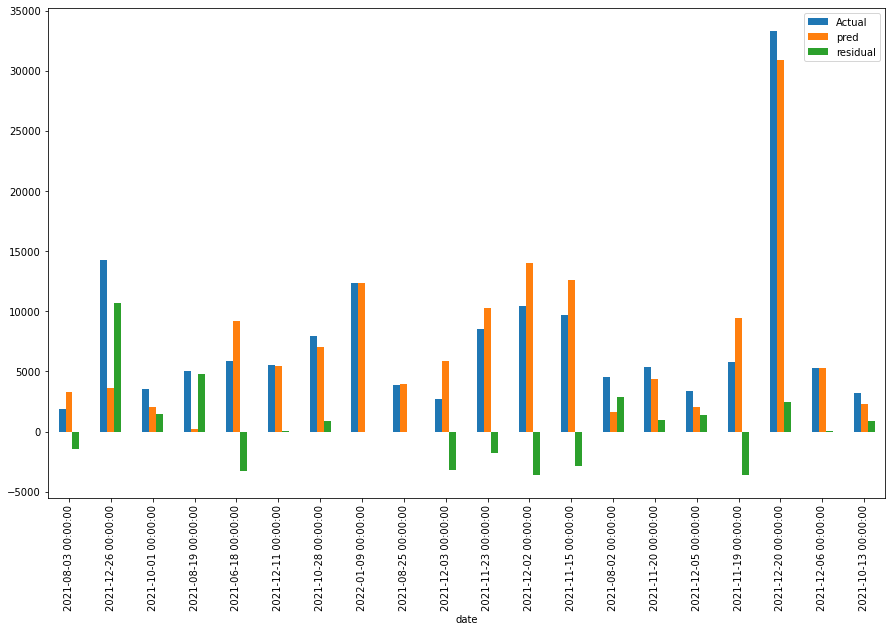

In [359]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

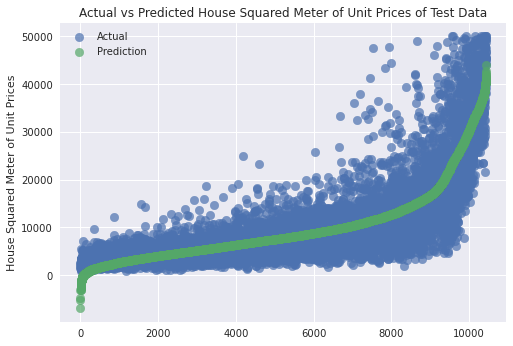

In [360]:
sorted_labels_acc_to_test_y = list(sorted(zip(y_test, y_pred), key=lambda x: x[1]))
sorted_test_y, sorted_test_preds = zip(*sorted_labels_acc_to_test_y)

with plt.style.context(('ggplot', 'seaborn')):
    plt.scatter(range(len(sorted_test_y)),sorted_test_y, s=75, alpha=0.7, label='Actual')
    plt.scatter(range(len(sorted_test_preds)), sorted_test_preds, s=75, alpha=0.7, label='Prediction')
    plt.ylabel('House Squared Meter of Unit Prices')
    plt.title('Actual vs Predicted House Squared Meter of Unit Prices of Test Data')
    plt.legend(loc='best')

### Error Metrics

In [361]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [362]:
def eval_metrics(actual, pred, model_type):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print(f"Model {model_type} Performance")
    print("-------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [363]:
eval_metrics(y_test, y_pred, "Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.7606665693525175
MAE 		: 2902.007429567427
MSE 		: 19867320.884953205
RMSE 		: 4457.277295048313


In [364]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.7579107715893031
MAE 		: 2964.2362689671495
MSE 		: 20620030.246125925
RMSE 		: 4540.928346288447


### Evaluate Model

In [365]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(lm_scores)
ls

lm_train     lm_test
rmse     4540.93     4457.28
mae      2964.24     2902.01
mse  20620030.25 19867320.88
R2          0.76        0.76

## Ridge Regression

### GridSearch and Model Fitting

In [366]:
# %%time
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# params = {'alpha' : [500, 200, 100, 50,10, 1, 0.1, 0.01],
#          'fit_intercept': [True, False],
#          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
# grid = GridSearchCV(Ridge(random_state=9), param_grid=params, cv=3, n_jobs=-1)
# grid.fit(X_train, y_train)

# print('Train R2 : %.3f'%grid.best_estimator_.score(X_train, y_train))
# print('Test R2 : %.3f'%grid.best_estimator_.score(X_test, y_test))
# print('Best Score Through Grid Search : %.3f'%grid.best_score_)
# print('Best Parameters : ',grid.best_params_)

In [367]:
%%time
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)

Wall time: 628 ms


Ridge(alpha=1)

Wall time: 12.4 s


Text(0.5, 1.0, 'Ridge Coefficients as a Function of Regularization')

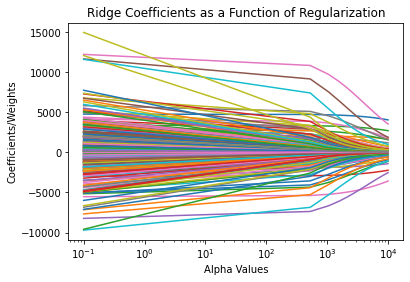

In [368]:
%%time
alpha_space = np.linspace(0.1,10000,20)

ridge_model = Ridge()
katsayilar = []

for i in alpha_space:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(alpha_space, katsayilar) 
ax.set_xscale('log') 

plt.rcParams["figure.figsize"] = (15,7)
plt.xlabel('Alpha Values')
plt.ylabel('Coefficients/Weights')
plt.title('Ridge Coefficients as a Function of Regularization');

### Prediction / Comparing / Error Metrics

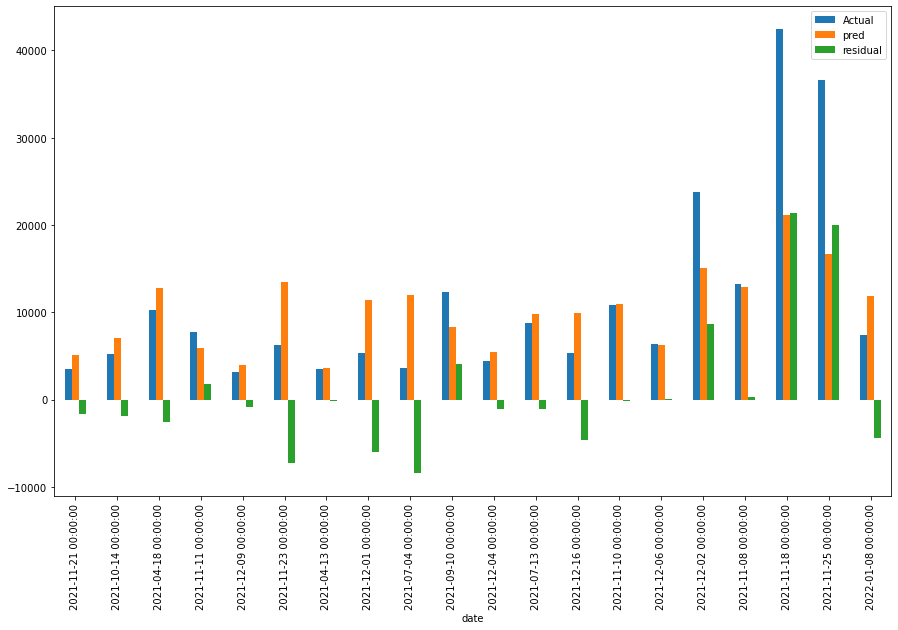

In [369]:
y_pred = ridge_model.predict(X_test)
y_train_pred = ridge_model.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

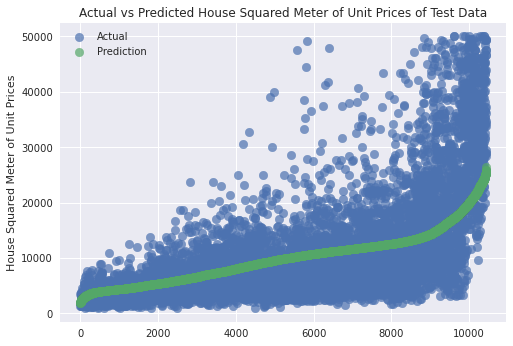

In [370]:
sorted_labels_acc_to_test_y = list(sorted(zip(y_test, y_pred), key=lambda x: x[1]))
sorted_test_y, sorted_test_preds = zip(*sorted_labels_acc_to_test_y)

with plt.style.context(('ggplot', 'seaborn')):
    plt.scatter(range(len(sorted_test_y)),sorted_test_y, s=75, alpha=0.7, label='Actual')
    plt.scatter(range(len(sorted_test_preds)), sorted_test_preds, s=75, alpha=0.7, label='Prediction')
    plt.ylabel('House Squared Meter of Unit Prices')
    plt.title('Actual vs Predicted House Squared Meter of Unit Prices of Test Data')
    plt.legend(loc='best')

In [371]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.49330695517944545
MAE 		: 4265.301504126088
MSE 		: 42061124.8683065
RMSE 		: 6485.454869807245


In [372]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.4871279012235805
MAE 		: 4370.443518586739
MSE 		: 43684050.95340693
RMSE 		: 6609.391118204984


In [373]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs =pd.DataFrame(ridge_scores)
rs

ridge_train  ridge_test
rmse      6609.39     6485.45
mae       4370.44     4265.30
mse   43684050.95 42061124.87
R2           0.49        0.49

## Lasso Regression

### GridSearch and Model Fitting

In [374]:
# %%time
# from sklearn.model_selection import GridSearchCV
# params = {'alpha' : [500, 200, 100, 50,10, 1, 0.1, 0.01],
#          'fit_intercept': [True, False],
#           }
# grid = GridSearchCV(Lasso(random_state=9), param_grid=params, cv=3, n_jobs=-1)
# grid.fit(X_train, y_train)

# print('Train R2 : %.3f'%grid.best_estimator_.score(X_train, y_train))
# print('Test R2 : %.3f'%grid.best_estimator_.score(X_test, y_test))
# print('Best Score Through Grid Search : %.3f'%grid.best_score_)
# print('Best Parameters : ',grid.best_params_)

In [375]:
%%time
from sklearn.linear_model import Lasso, LassoCV
lasso_model = Lasso(alpha = 0.01 ,fit_intercept = True)
lasso_model.fit(X_train, y_train)

Wall time: 957 ms


Lasso(alpha=0.01)

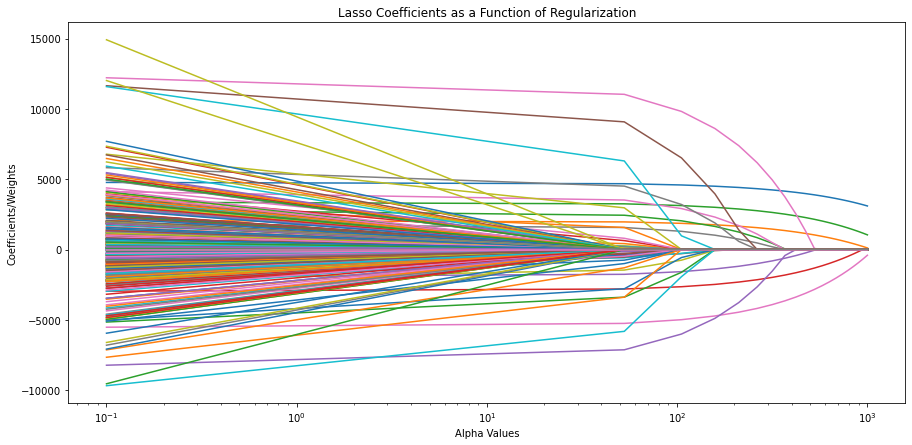

In [376]:
alpha_space = np.linspace(0.1,1000,20)

lasso_model = Lasso()
katsayilar = []

for i in alpha_space:
    lasso_model.set_params(alpha = i)
    lasso_model.fit(X_train, y_train) 
    katsayilar.append(lasso_model.coef_) 
    

    
ax = plt.gca()
ax.plot(alpha_space, katsayilar) 
ax.set_xscale('log') 

plt.rcParams["figure.figsize"] = (15,7)
plt.xlabel('Alpha Values')
plt.ylabel('Coefficients/Weights')
plt.title('Lasso Coefficients as a Function of Regularization');

### Prediction / Comparing / Error Metrics

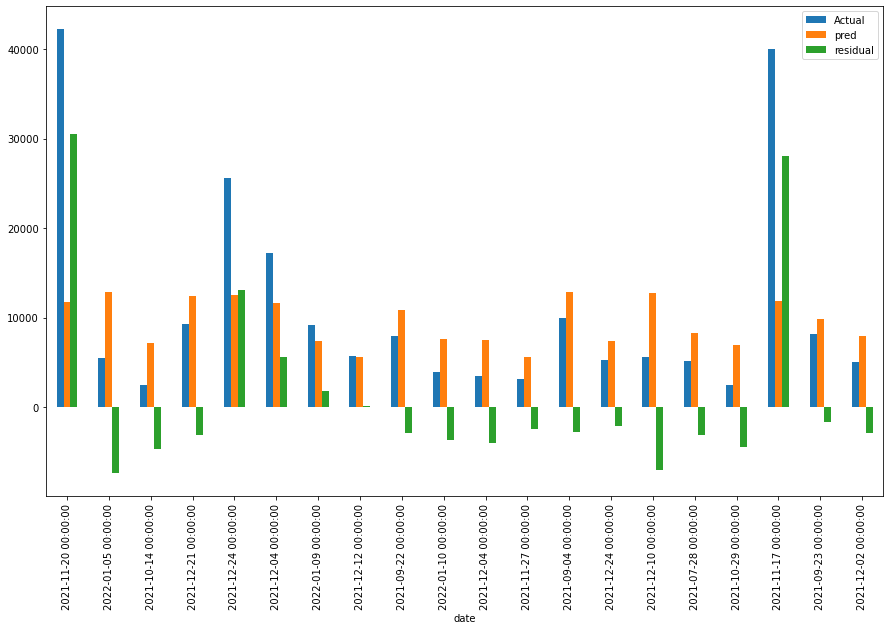

In [377]:
y_pred = lasso_model.predict(X_test)
y_train_pred = lasso_model.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()


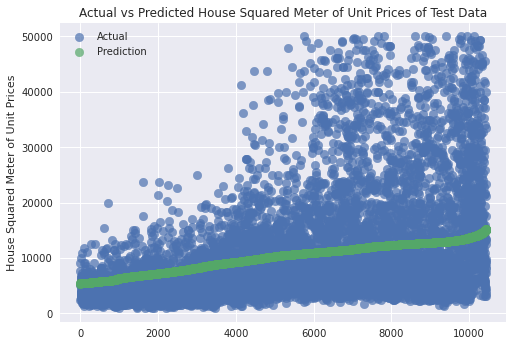

In [378]:
sorted_labels_acc_to_test_y = list(sorted(zip(y_test, y_pred), key=lambda x: x[1]))
sorted_test_y, sorted_test_preds = zip(*sorted_labels_acc_to_test_y)

with plt.style.context(('ggplot', 'seaborn')):
    plt.scatter(range(len(sorted_test_y)),sorted_test_y, s=75, alpha=0.7, label='Actual')
    plt.scatter(range(len(sorted_test_preds)), sorted_test_preds, s=75, alpha=0.7, label='Prediction')
    plt.ylabel('House Squared Meter of Unit Prices')
    plt.title('Actual vs Predicted House Squared Meter of Unit Prices of Test Data')
    plt.legend(loc='best')

In [379]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.18286048282980216
MAE 		: 5681.0904776701855
MSE 		: 69600129.13407968
RMSE 		: 8342.669185223616


In [380]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.18808046572493864
MAE 		: 5586.261920098361
MSE 		: 67398298.1673943
RMSE 		: 8209.646653017066


In [381]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

lasso_train  lasso_test
rmse      8342.67     8209.65
mae       5681.09     5586.26
mse   69600129.13 67398298.17
R2           0.18        0.19

## Elastic Net - ENET

### GridSearch and Model Fitting

In [382]:
# %%time
# from sklearn.model_selection import GridSearchCV
# params = {'alpha' : [500, 200, 100, 50,10, 1, 0.1, 0.01],
#          'fit_intercept': [True, False],
#           'l1_ratio': [0,0.3, 0.5, 0.7, 1.0]
#          }
# grid = GridSearchCV(ElasticNet(random_state=9), param_grid=params, cv=3, n_jobs=-1)
# grid.fit(X_train, y_train)

# print('Train R2 : %.3f'%grid.best_estimator_.score(X_train, y_train))
# print('Test R2 : %.3f'%grid.best_estimator_.score(X_test, y_test))
# print('Best Score Through Grid Search : %.3f'%grid.best_score_)
# print('Best Parameters : ',grid.best_params_)

In [383]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
elastic_model = ElasticNet(alpha=0.01, l1_ratio=1.0, fit_intercept = True, random_state=9)
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=1.0, random_state=9)

In [384]:
elastic_model.l1_ratio

1.0

In [385]:
elastic_model.alpha

0.01

### Prediction / Comparing / Error Metrics

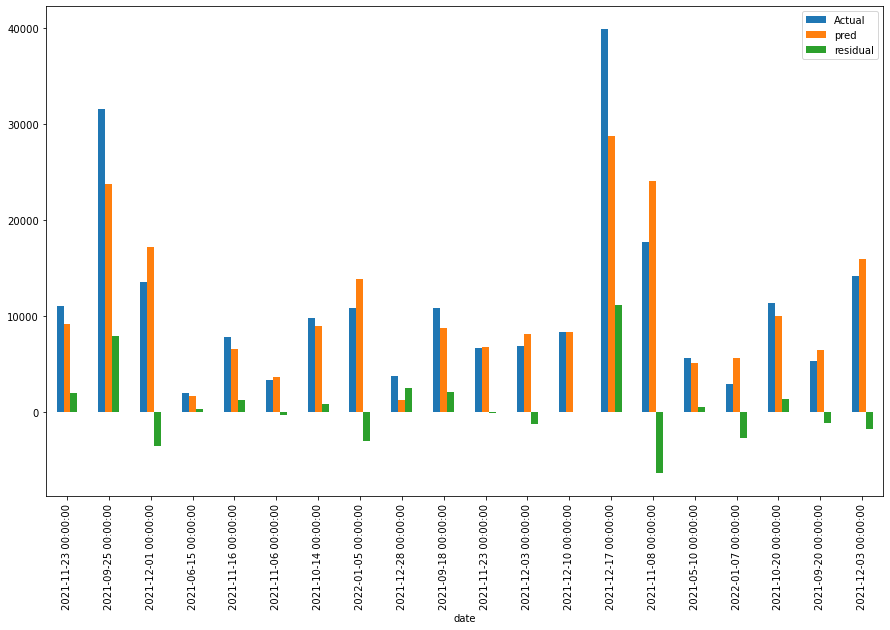

In [386]:
y_pred = elastic_model.predict(X_test)
y_train_pred = elastic_model.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

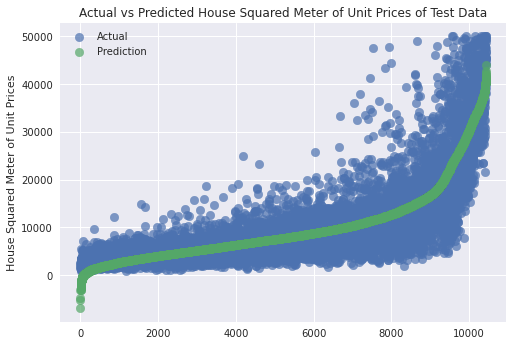

In [387]:
sorted_labels_acc_to_test_y = list(sorted(zip(y_test, y_pred), key=lambda x: x[1]))
sorted_test_y, sorted_test_preds = zip(*sorted_labels_acc_to_test_y)

with plt.style.context(('ggplot', 'seaborn')):
    plt.scatter(range(len(sorted_test_y)),sorted_test_y, s=75, alpha=0.7, label='Actual')
    plt.scatter(range(len(sorted_test_preds)), sorted_test_preds, s=75, alpha=0.7, label='Prediction')
    plt.ylabel('House Squared Meter of Unit Prices')
    plt.title('Actual vs Predicted House Squared Meter of Unit Prices of Test Data')
    plt.legend(loc='best')

In [388]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.757910642598181
MAE 		: 2964.105143428415
MSE 		: 20620041.232987493
RMSE 		: 4540.929556047692


In [389]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.7606676366665168
MAE 		: 2901.8742969414548
MSE 		: 19867232.28609072
RMSE 		: 4457.267356362048


In [390]:
elastic_scores = {"elastic_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                              "mae": mean_absolute_error(y_train, y_train_pred),
                              "mse": mean_squared_error(y_train, y_train_pred),
                              "R2" : r2_score(y_train, y_train_pred)},
                "elastic_test": {"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                              "mae": mean_absolute_error(y_test, y_pred),
                              "mse": mean_squared_error(y_test, y_pred),
                              "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

elastic_train  elastic_test
rmse        4540.93       4457.27
mae         2964.11       2901.87
mse     20620041.23   19867232.29
R2             0.76          0.76

## PLS-Partial Least Square Regression

### Model Fitting

In [391]:
from sklearn.cross_decomposition import PLSRegression
pls_model = PLSRegression()
pls_model.fit(X_train, y_train)

PLSRegression()

### Prediction / Comparing / Error Metrics

In [392]:
y_pred = pls_model.predict(X_test)
y_train_pred = pls_model.predict(X_train)

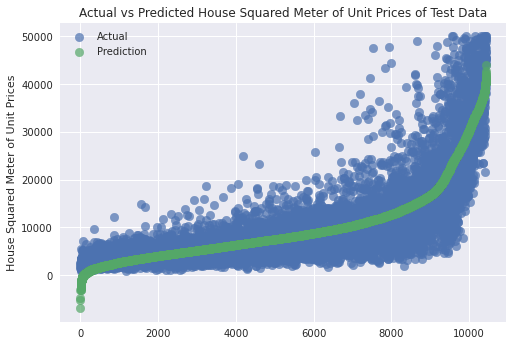

In [393]:
sorted_labels_acc_to_test_y = list(sorted(zip(y_test, y_pred), key=lambda x: x[1]))
sorted_test_y, sorted_test_preds = zip(*sorted_labels_acc_to_test_y)

with plt.style.context(('ggplot', 'seaborn')):
    plt.scatter(range(len(sorted_test_y)),sorted_test_y, s=75, alpha=0.7, label='Actual')
    plt.scatter(range(len(sorted_test_preds)), sorted_test_preds, s=75, alpha=0.7, label='Prediction')
    plt.ylabel('House Squared Meter of Unit Prices')
    plt.title('Actual vs Predicted House Squared Meter of Unit Prices of Test Data')
    plt.legend(loc='best')

In [394]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.7579105837832628
MAE 		: 2964.266354703625
MSE 		: 20620046.242567636
RMSE 		: 4540.930107650594


In [395]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.7606532005509445
MAE 		: 2902.121536973876
MSE 		: 19868430.643293187
RMSE 		: 4457.401781676539


In [396]:
pls_scores = {"pls_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                              "mae": mean_absolute_error(y_train, y_train_pred),
                              "mse": mean_squared_error(y_train, y_train_pred),
                              "R2" : r2_score(y_train, y_train_pred)},
                "pls_test": {"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                              "mae": mean_absolute_error(y_test, y_pred),
                              "mse": mean_squared_error(y_test, y_pred),
                              "R2" : r2_score(y_test, y_pred)}}
plss = pd.DataFrame(pls_scores)
plss

pls_train    pls_test
rmse     4540.93     4457.40
mae      2964.27     2902.12
mse  20620046.24 19868430.64
R2          0.76        0.76

In [397]:
pd.concat([ls, rs,lss, es, plss], axis= 1).T

rmse     mae         mse   R2
lm_train      4540.93 2964.24 20620030.25 0.76
lm_test       4457.28 2902.01 19867320.88 0.76
ridge_train   6609.39 4370.44 43684050.95 0.49
ridge_test    6485.45 4265.30 42061124.87 0.49
lasso_train   8342.67 5681.09 69600129.13 0.18
lasso_test    8209.65 5586.26 67398298.17 0.19
elastic_train 4540.93 2964.11 20620041.23 0.76
elastic_test  4457.27 2901.87 19867232.29 0.76
pls_train     4540.93 2964.27 20620046.24 0.76
pls_test      4457.40 2902.12 19868430.64 0.76

In [398]:
# Tüm modellerinden aynı R2 yi elde ediyoruz. 
# We get the same R2 from all models

## Use Pipeline and Grid Search All Machine Learning Methods and Scaling Methods
    * KNN-K Nearest Neigbor
    * SVR-Support Vector Regression
    * CART-Decision Tree
    * Bagged Trees - Bagging
    * RF-Random Forest
    * Ada Boosting
    * GBM-Gradient Boosting Machines
    * XGBoost
    * LGBoost
    * CatBoost
    
    * StandartScaler
    * Normalize
    * MinMax
    * MinAbs
    * Power
    * Robust
    * Quantile

## Label Encoding

In [399]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [400]:
df["neighborhood"] = le.fit_transform(df["neighborhood"])

In [401]:
df["county"] = le.fit_transform(df["county"])

In [402]:
for i in df.select_dtypes(include="object").columns:
    df[i] = le.fit_transform(df[i])

## Determine Dependent(Target) and Independent Variables(Features)

In [403]:
X = df.drop("smup", axis = 1)
y = df.smup

## Onehot Encoding

In [404]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((MinMaxScaler(), X.select_dtypes(exclude="object").columns),
                        (OneHotEncoder(sparse=False, handle_unknown='ignore'), X.select_dtypes(include="object").columns))

In [405]:
X_ohe = transformer.fit_transform(X)

In [406]:
X_ohe.shape

(104385, 18)

## Train - Test Split

In [407]:
from sklearn.model_selection import train_test_split

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.10, random_state = 9)

In [409]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (93946, 18)
X_test : (10439, 18)
y_train : (93946,)
y_test : (10439,)


In [410]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
# !pip install tensorflow
# !pip install keras
# !pip install streamlit
# !pip install -U yellowbrick

In [411]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

## GridSearch Modelling

### KNN

In [412]:
# knn_grid = KNeighborsRegressor(random_state = 9)
# k_values = range(1,12)
# param_grid = {"n_neighbors": k_values, "weights": ["uniform", "distance"]}
# knn_grid_model = GridSearchCV(knn_grid, param_grid, cv= 3, scoring= "accuracy", n_jobs = -1, verbose = 3, refit= True)
# knn_grid_model.fit(X_train, y_train)
# knn_grid_model.best_estimator_

In [413]:
%%time
#knn_final = knn_grid_model.best_estimator_
knn_final = KNeighborsRegressor(n_neighbors=4)
knn_final.fit(X_train, y_train)
knn_final.score(X_train, y_train)

Wall time: 3min 43s


0.7658083355578151

### Prediction / Comparing / Error Metrics

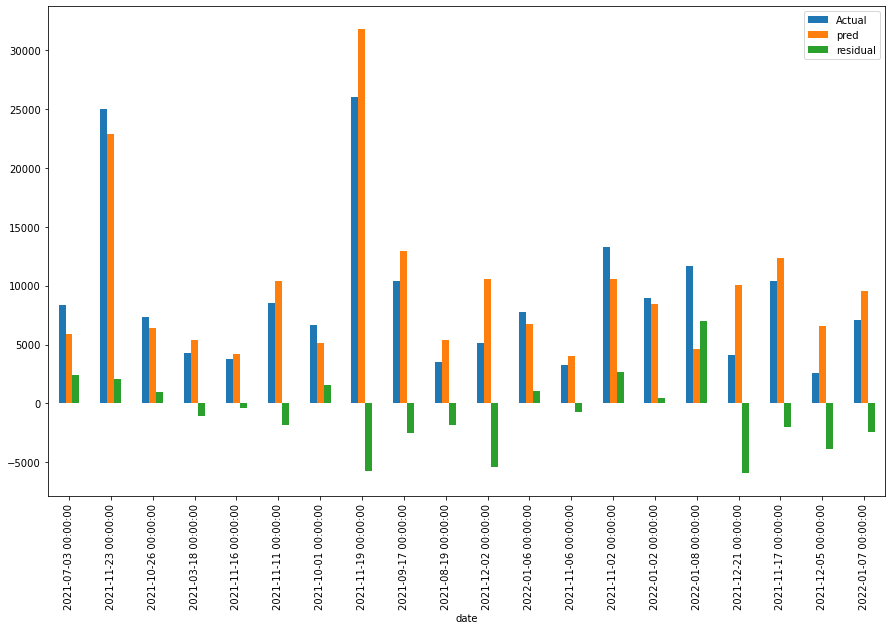

In [414]:
y_pred = knn_final.predict(X_test)
y_train_pred = knn_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [415]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.603874161483677
MAE 		: 3348.973177507424
MSE 		: 32882824.281312864
RMSE 		: 5734.354739751707


In [416]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.7658083355578151
MAE 		: 2570.8234437868564
MSE 		: 19947352.618250776
RMSE 		: 4466.245920037406


In [417]:
knn_scores = {"knn_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "knn_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ks =pd.DataFrame(knn_scores)
ks

knn_train    knn_test
rmse     4466.25     5734.35
mae      2570.82     3348.97
mse  19947352.62 32882824.28
R2          0.77        0.60

### SVR

In [418]:
# Support Vector Machine modeli -(eksi) R2 sonucu vermekte olup modellemede kullanmayacağız
# Support Vector Machine model gives the result -(minus) R2 and we will not use it in modeling.

In [419]:
# svr_grid = SVR(random_state = 9)
# #param_grid = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4]}
# param_grid = {'C':[1,5,10,50],
#               "gamma": [1,3,5,9]
#              }
# svr_grid_model = GridSearchCV(svr_grid, param_grid, cv = 2, n_jobs = -1, verbose = 3, refit= True)
# svr_grid_model.fit(X_train, y_train)
# svr_grid_model.best_estimator_

In [420]:
# %%time
# #svr_final = svr_grid_model.best_estimator_
# svr_final = SVR(C=1, gamma=0.1, kernel='rbf')
# svr_final.fit(X_train, y_train)
# svr_final.score(X_train, y_train)

### CART - Decision Trees

In [421]:
# dt_grid = DecisionTreeRegressor(random_state = 9)
# param_grid = {"max_depth": range(1,5),
#               "min_samples_split": range(2,20),
#               "max_leaf_nodes": range(2,10)}
# dt_grid_model = GridSearchCV(dt_grid, param_grid, cv = 2, n_jobs = -1, verbose = 3, refit= True)
# dt_grid_model.fit(X_train, y_train)
# dt_grid_model.best_estimator_

In [422]:
%%time
#dt_final = dt_grid_model.best_estimator_
dt_final = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=9, random_state=9)
dt_final.fit(X_train, y_train)
dt_final.score(X_train, y_train)

Wall time: 305 ms


0.3680040830878065

### Prediction / Comparing / Error Metrics

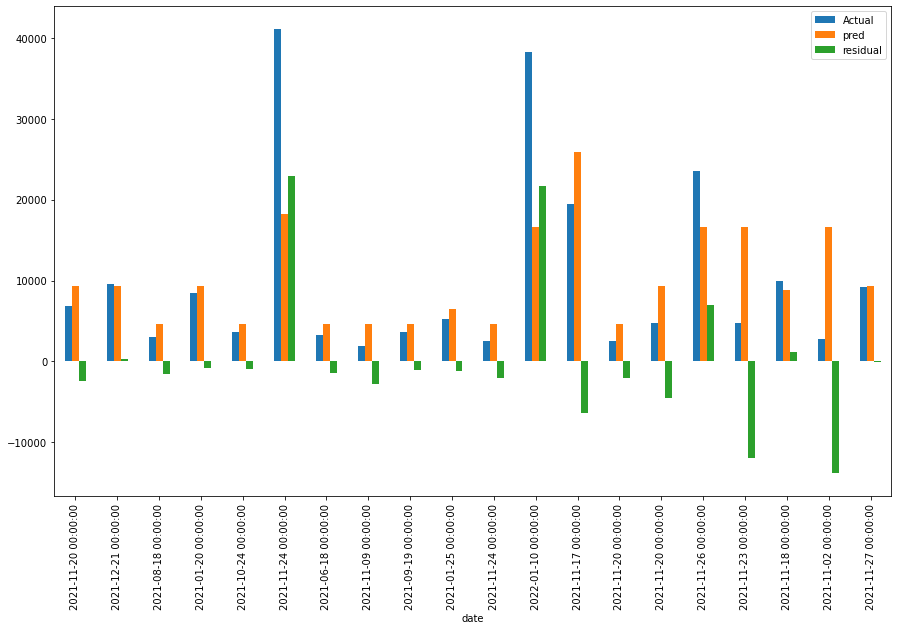

In [423]:
y_pred = dt_final.predict(X_test)
y_train_pred = dt_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [424]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.3703459115745764
MAE 		: 4739.029211555667
MSE 		: 52268250.98118476
RMSE 		: 7229.678483942751


In [425]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.3680040830878065
MAE 		: 4854.138794073611
MSE 		: 53830461.63478829
RMSE 		: 7336.924535170598


In [426]:
dt_scores = {"dt_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "dt_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ds =pd.DataFrame(dt_scores)
ds

dt_train     dt_test
rmse     7336.92     7229.68
mae      4854.14     4739.03
mse  53830461.63 52268250.98
R2          0.37        0.37

### Bagged Trees Regresyon

In [427]:
# bag_model = BaggingRegressor(bootstrap_features = True, random_state = 9)
# bag_params = {"n_estimators": range(2,20)}
# # bag_model = BaggingRegressor(random_state = 9)
# # bag_params = {
# #           'n_estimators': [20,50,100],
# #           'max_samples': [0.5,1.0],
# #           'max_features': [0.5,1.0],
# #           'bootstrap': [True, False],
# #           'bootstrap_features': [True, False]
# #             }
# bag_grid_model = GridSearchCV(bag_model, bag_params, cv = 3, n_jobs = -1, verbose = 3, refit= True)
# bag_grid_model.fit(X_train, y_train)
# bag_grid_model.best_estimator_

In [428]:
%%time
#bag_final = bag_grid_model.best_estimator_
bag_final = BaggingRegressor(bootstrap_features=True, n_estimators=19, random_state=9)
bag_final.fit(X_train, y_train)
bag_final.score(X_train, y_train)

Wall time: 11 s


0.9664937855313248

### Prediction / Comparing / Error Metrics

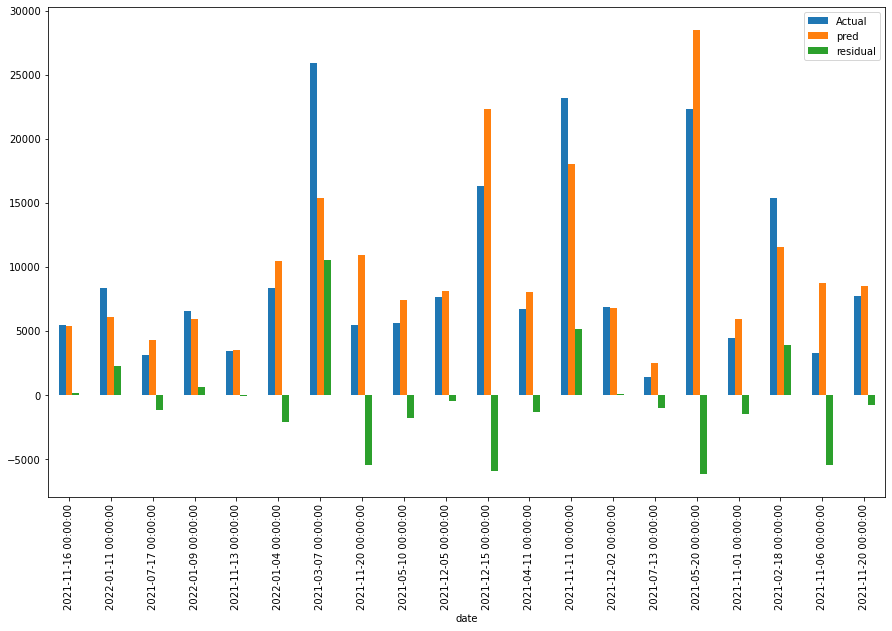

In [429]:
y_pred = bag_final.predict(X_test)
y_train_pred = bag_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [430]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.8481482314972919
MAE 		: 2192.4500783684466
MSE 		: 12605375.703800231
RMSE 		: 3550.405005601506


In [431]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.9664937855313248
MAE 		: 1039.104340305344
MSE 		: 2853902.9196506664
RMSE 		: 1689.3498511707592


In [432]:
bag_scores = {"bag_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "bag_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
bs =pd.DataFrame(bag_scores)
bs

bag_train    bag_test
rmse    1689.35     3550.41
mae     1039.10     2192.45
mse  2853902.92 12605375.70
R2         0.97        0.85

### Random Forest

In [433]:
# rf_grid = RandomForestRegressor(random_state = 9)
# param_grid = {'n_estimators': [200, 500,1000],
#                 'max_features': ['auto', 'sqrt', 'log2'],
#                 'max_depth' : [4,6,8],
#             }
# rf_grid_model = GridSearchCV(rf_grid, param_grid, cv = 2, n_jobs = -1, verbose = 3, refit= True)
# rf_grid_model.fit(X_train, y_train)
# rf_grid_model.best_estimator_

In [434]:
%%time
#rf_final = rf_grid_model.best_estimator_
rf_final = RandomForestRegressor(max_depth=8, n_estimators=200, random_state=9)
rf_final.fit(X_train, y_train)
rf_final.score(X_train, y_train)

Wall time: 59 s


0.6917453503234066

### Prediction / Comparing / Error Metrics

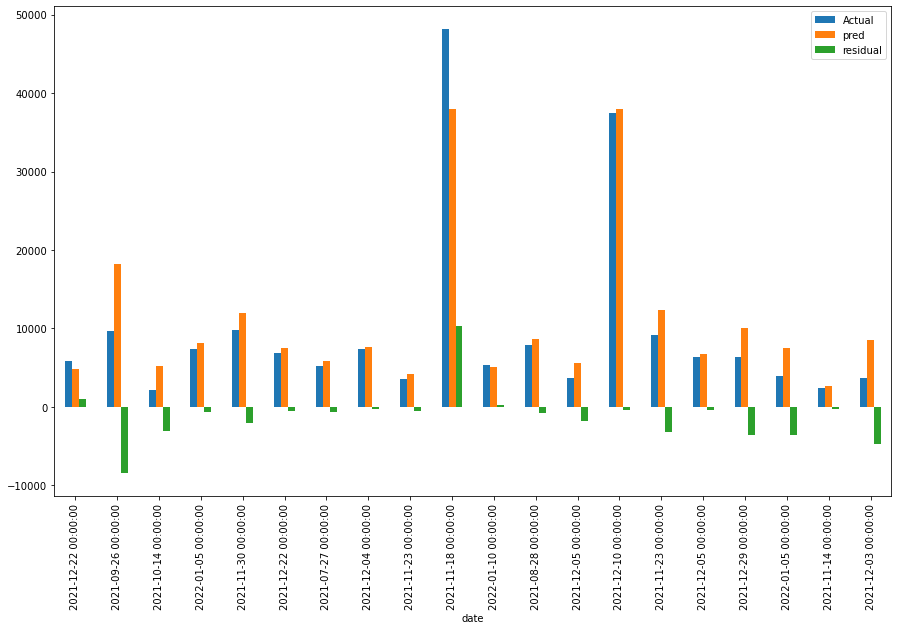

In [435]:
y_pred = rf_final.predict(X_test)
y_train_pred = rf_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [436]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.6826331641619177
MAE 		: 3184.9503437265666
MSE 		: 26344956.276185703
RMSE 		: 5132.733801414769


In [437]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.6917453503234066
MAE 		: 3203.867676883715
MSE 		: 26255691.926355254
RMSE 		: 5124.030828005942


In [438]:
rf_scores = {"rf_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "rf_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rfs =pd.DataFrame(rf_scores)
rfs

rf_train     rf_test
rmse     5124.03     5132.73
mae      3203.87     3184.95
mse  26255691.93 26344956.28
R2          0.69        0.68

### Ada Boosting

In [439]:
# ada_grid = AdaBoostRegressor(n_estimators= 1, random_state = 9)
# param_grid = {"n_estimators": [12, 20, 37, 100, 150, 500], 
#               "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}
# ada_grid_model = GridSearchCV(ada_grid, param_grid, cv = 2, n_jobs = -1, verbose = 3, refit= True)
# ada_grid_model.fit(X_train, y_train)
# ada_grid_model.best_estimator_

In [440]:
%%time
#ada_final = ada_grid_model.best_estimator_
ada_final = AdaBoostRegressor(learning_rate=0.2, n_estimators=12, random_state=9)
ada_final.fit(X_train, y_train)
ada_final.score(X_train, y_train)

Wall time: 3.63 s


0.38348725837904274

### Prediction / Comparing / Error Metrics

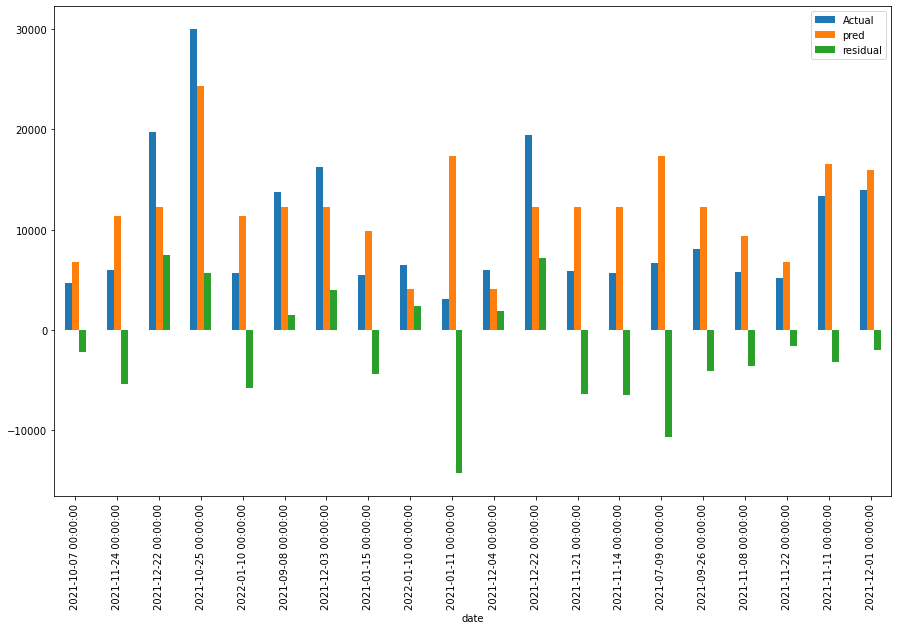

In [441]:
y_pred = ada_final.predict(X_test)
y_train_pred = ada_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [442]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.38427317355798707
MAE 		: 4936.93869588362
MSE 		: 51112134.25263303
RMSE 		: 7149.275085813458


In [443]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.38348725837904274
MAE 		: 5061.75081144773
MSE 		: 52511677.049008444
RMSE 		: 7246.494121229137


In [444]:
ada_scores = {"ada_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ada_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
adas =pd.DataFrame(ada_scores)
adas

ada_train    ada_test
rmse     7246.49     7149.28
mae      5061.75     4936.94
mse  52511677.05 51112134.25
R2          0.38        0.38

### Gradient Boosting Machines

In [445]:
# gbm_grid = GradientBoostingRegressor()
# param_grid = {'learning_rate': [0.001, 0.01],
#                 'max_depth': [3, 5, 10],
#                 'n_estimators': [200, 500, 1000],
#                 'subsample': [0.5,0.75,1],
#             }
# gbm_grid_model = GridSearchCV(gbm_grid, param_grid, cv = 2, n_jobs = -1, verbose = 2)
# gbm_grid_model.fit(X_train, y_train)
# gbm_grid_model.best_estimator_

In [446]:
%%time
#gbm_final = gbm_grid_model.best_estimator_
gbm_final = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5)
gbm_final.fit(X_train, y_train)
gbm_final.score(X_train, y_train)

Wall time: 30.1 s


0.6275631843527811

### Prediction / Comparing / Error Metrics

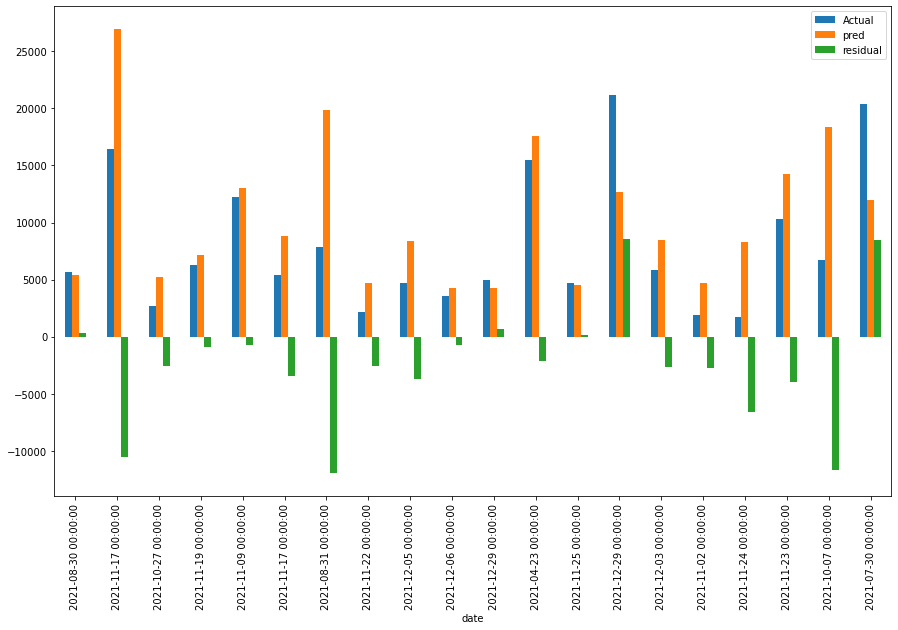

In [447]:
y_pred = gbm_final.predict(X_test)
y_train_pred = gbm_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [448]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.6246682848141699
MAE 		: 3636.0879367893513
MSE 		: 31156682.13890281
RMSE 		: 5581.817100094091


In [449]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.6275631843527811
MAE 		: 3694.291489617827
MSE 		: 31722429.179658405
RMSE 		: 5632.266788750192


In [450]:
gbm_scores = {"gbm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "gbm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
gbms =pd.DataFrame(gbm_scores)
gbms

gbm_train    gbm_test
rmse     5632.27     5581.82
mae      3694.29     3636.09
mse  31722429.18 31156682.14
R2          0.63        0.62

### XGBM

In [451]:
# %%time
# xgbm_grid = XGBRegressor(random_state= 9)
# param_grid = {"n_estimators": [500, 1000], 
#               "max_depth": [5, 10, 15], 
#               "learning_rate": [0.01, 0.1],
#               "subsample": [0.5, 1], 
#               "colsample_bytree": [0.5, 1]
#              }
# xgbm_grid_model = GridSearchCV(xgbm_grid, param_grid, cv = 2, n_jobs = -1, verbose = 2)
# xgbm_grid_model.fit(X_train, y_train)
# xgbm_grid_model.best_estimator_

In [452]:
%%time
#xgbm_final = xgbm_grid_model.best_estimator_
xgbm_final = XGBRegressor(n_estimators = 1000, max_depth = 10, learning_rate = 0.1,
                         subsample = 1, colsample_bytree=0.5, random_state= 9)
xgbm_final.fit(X_train, y_train)
xgbm_final.score(X_train, y_train)

Wall time: 1min 6s


0.9876795820593001

### Prediction / Comparing / Error Metrics

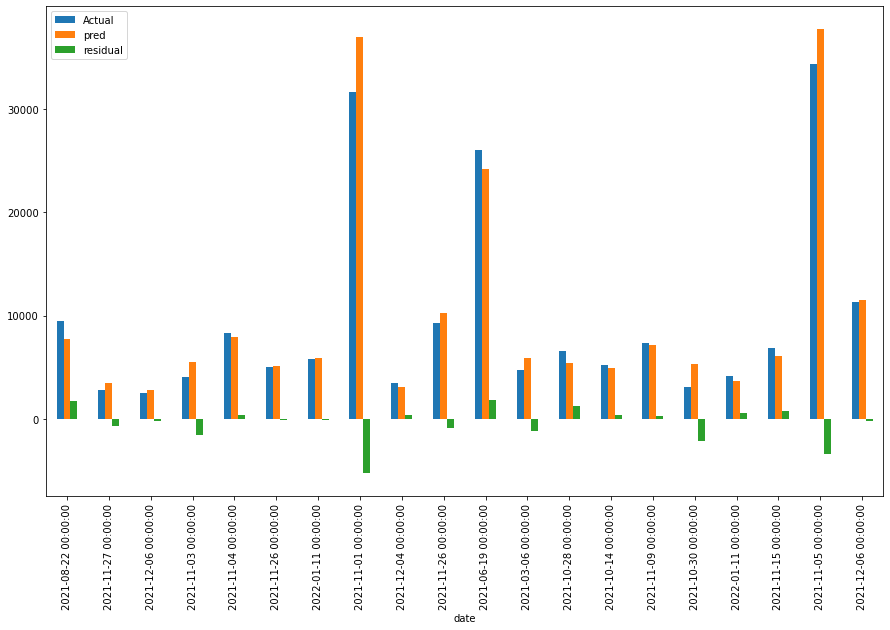

In [453]:
y_pred = xgbm_final.predict(X_test)
y_train_pred = xgbm_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [454]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.8954716338110184
MAE 		: 1750.7851276998833
MSE 		: 8677010.090225087
RMSE 		: 2945.6765080750274


In [455]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.9876795820593001
MAE 		: 650.0405096652152
MSE 		: 1049395.6804685348
RMSE 		: 1024.4001564176642


In [456]:
xgbm_scores = {"xgbm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "xgbm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
xgbms =pd.DataFrame(xgbm_scores)
xgbms

xgbm_train  xgbm_test
rmse     1024.40    2945.68
mae       650.04    1750.79
mse   1049395.68 8677010.09
R2          0.99       0.90

### LGBM

In [457]:
%%time
lgbm_grid = LGBMRegressor(random_state= 9)
param_grid = {"n_estimators": [100, 300], 
              "max_depth": [3, 5, 6, 10, 20], 
              "learning_rate": [0.01, 0.1],
              "subsample": [0.5, 1], 
              "colsample_bytree": [0.5, 1]
             }
lgbm_grid_model = GridSearchCV(lgbm_grid, param_grid, cv = 2, n_jobs = -1, verbose = 2)
lgbm_grid_model.fit(X_train, y_train)
lgbm_grid_model.best_estimator_

Fitting 2 folds for each of 80 candidates, totalling 160 fits
Wall time: 1min 55s


LGBMRegressor(colsample_bytree=0.5, max_depth=10, n_estimators=300,
              random_state=9, subsample=0.5)

In [458]:
lgbm_final = lgbm_grid_model.best_estimator_
#lgbm_final = LGBMRegressor(colsample_bytree=0.5, max_depth=20, n_estimators=300, random_state=9, subsample=0.5)
lgbm_final.fit(X_train, y_train)
lgbm_final.score(X_train, y_train)

0.8606747621171609

### Prediction / Comparing / Error Metrics

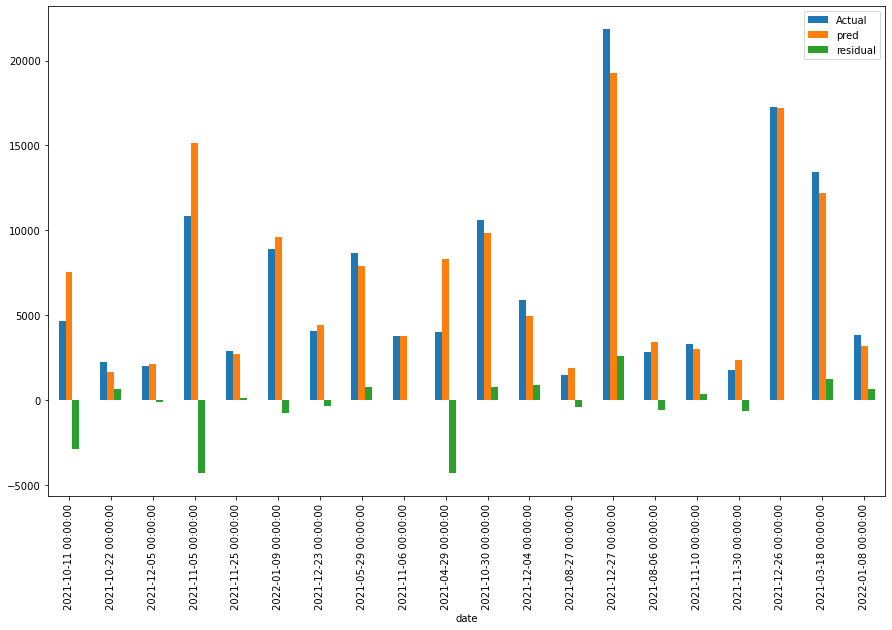

In [459]:
y_pred = lgbm_final.predict(X_test)
y_train_pred = lgbm_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [460]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.8423652945527214
MAE 		: 2256.1707855959876
MSE 		: 13085423.408061225
RMSE 		: 3617.3779741770454


In [461]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.8606747621171609
MAE 		: 2197.783518199991
MSE 		: 11867073.302076297
RMSE 		: 3444.8618698107907


In [462]:
lgbm_scores = {"lgbm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lgbm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lgbms =pd.DataFrame(lgbm_scores)
lgbms

lgbm_train   lgbm_test
rmse     3444.86     3617.38
mae      2197.78     2256.17
mse  11867073.30 13085423.41
R2          0.86        0.84

### CatBoost

In [463]:
%%time
cat_grid = CatBoostRegressor(random_state= 9)
param_grid = {'iterations': [200,500],
              'learning_rate': [0.01, 0.03],
              'depth': [4,6,8]
             }
cat_grid_model = GridSearchCV(cat_grid, param_grid, cv = 2, n_jobs = -1, verbose = 2)
cat_grid_model.fit(X_train, y_train)
cat_grid_model.best_estimator_

Fitting 2 folds for each of 12 candidates, totalling 24 fits
0:	learn: 9074.4183407	total: 184ms	remaining: 1m 31s
1:	learn: 8935.8417604	total: 207ms	remaining: 51.5s
2:	learn: 8796.5595997	total: 230ms	remaining: 38.1s
3:	learn: 8660.0169528	total: 252ms	remaining: 31.3s
4:	learn: 8529.4281475	total: 274ms	remaining: 27.2s
5:	learn: 8410.2648400	total: 296ms	remaining: 24.4s
6:	learn: 8293.2958686	total: 319ms	remaining: 22.5s
7:	learn: 8177.4513795	total: 343ms	remaining: 21.1s
8:	learn: 8067.7182403	total: 367ms	remaining: 20s
9:	learn: 7963.0378366	total: 395ms	remaining: 19.3s
10:	learn: 7863.6446409	total: 423ms	remaining: 18.8s
11:	learn: 7770.6537746	total: 453ms	remaining: 18.4s
12:	learn: 7683.5777060	total: 478ms	remaining: 17.9s
13:	learn: 7597.3158036	total: 504ms	remaining: 17.5s
14:	learn: 7513.5979915	total: 531ms	remaining: 17.2s
15:	learn: 7434.2128970	total: 559ms	remaining: 16.9s
16:	learn: 7360.1195990	total: 590ms	remaining: 16.8s
17:	learn: 7291.6114176	total: 6

In [464]:
cat_final = cat_grid_model.best_estimator_
cat_final.fit(X_train, y_train)
cat_final.score(X_train, y_train)

0:	learn: 9074.4183407	total: 29.5ms	remaining: 14.7s
1:	learn: 8935.8417604	total: 53.6ms	remaining: 13.4s
2:	learn: 8796.5595997	total: 75.5ms	remaining: 12.5s
3:	learn: 8660.0169528	total: 96.8ms	remaining: 12s
4:	learn: 8529.4281475	total: 120ms	remaining: 11.9s
5:	learn: 8410.2648400	total: 144ms	remaining: 11.9s
6:	learn: 8293.2958686	total: 169ms	remaining: 11.9s
7:	learn: 8177.4513795	total: 193ms	remaining: 11.9s
8:	learn: 8067.7182403	total: 217ms	remaining: 11.9s
9:	learn: 7963.0378366	total: 245ms	remaining: 12s
10:	learn: 7863.6446409	total: 271ms	remaining: 12s
11:	learn: 7770.6537746	total: 301ms	remaining: 12.2s
12:	learn: 7683.5777060	total: 327ms	remaining: 12.2s
13:	learn: 7597.3158036	total: 353ms	remaining: 12.3s
14:	learn: 7513.5979915	total: 382ms	remaining: 12.3s
15:	learn: 7434.2128970	total: 410ms	remaining: 12.4s
16:	learn: 7360.1195990	total: 438ms	remaining: 12.5s
17:	learn: 7291.6114176	total: 467ms	remaining: 12.5s
18:	learn: 7235.4896526	total: 494ms	rem

0.8039515310023861

### Prediction / Comparing / Error Metrics

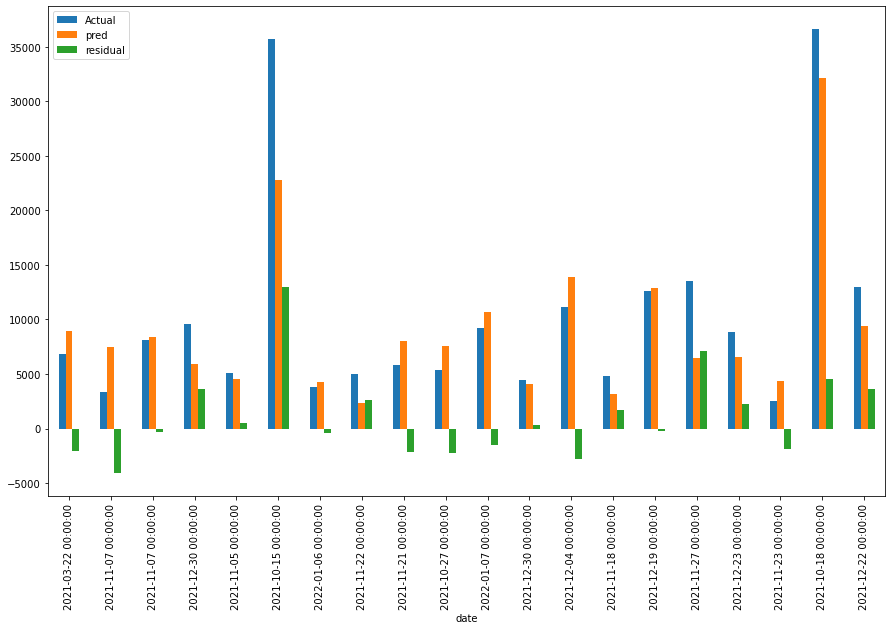

In [465]:
y_pred = cat_final.predict(X_test)
y_train_pred = cat_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [466]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.7968245062325561
MAE 		: 2577.005436316738
MSE 		: 16865812.35106312
RMSE 		: 4106.8007440175525


In [467]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.8039515310023861
MAE 		: 2587.7398528784342
MSE 		: 16698493.307514943
RMSE 		: 4086.3789970479907


In [468]:
cat_scores = {"cat_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "cat_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
cats =pd.DataFrame(cat_scores)
cats

cat_train    cat_test
rmse     4086.38     4106.80
mae      2587.74     2577.01
mse  16698493.31 16865812.35
R2          0.80        0.80

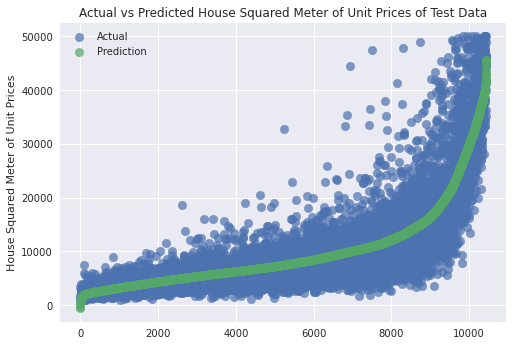

In [469]:
sorted_labels_acc_to_test_y = list(sorted(zip(y_test, y_pred), key=lambda x: x[1]))
sorted_test_y, sorted_test_preds = zip(*sorted_labels_acc_to_test_y)

with plt.style.context(('ggplot', 'seaborn')):
    plt.scatter(range(len(sorted_test_y)),sorted_test_y, s=75, alpha=0.7, label='Actual')
    plt.scatter(range(len(sorted_test_preds)), sorted_test_preds, s=75, alpha=0.7, label='Prediction')
    plt.ylabel('House Squared Meter of Unit Prices')
    plt.title('Actual vs Predicted House Squared Meter of Unit Prices of Test Data')
    plt.legend(loc='best')

## PIPELINE

In [470]:
KNN1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", knn_final)
])
# SVM1 = Pipeline([
#     ("scl", StandardScaler()),
#     ("mlr", svr_final)
# ])
DT1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", dt_final)
])
BAG1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", bag_final)
])
RF1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", rf_final)
])
ADA1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", ada_final)
])
GBM1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", gbm_final)
])
XGBM1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", xgbm_final)
])
LGBM1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", lgbm_final)
])
CAT1 = Pipeline([
    ("scl", StandardScaler()),
    ("mlr", cat_final)
])
KNN2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", knn_final)
])
# SVM2 = Pipeline([
#     ("scl", MinMaxScaler()),
#     ("mlr", svr_final)
# ])
DT2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", dt_final)
])
BAG2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", bag_final)
])
RF2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", rf_final)
])
ADA2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", ada_final)
])
GBM2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", gbm_final)
])
XGBM2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", xgbm_final)
])
LGBM2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", lgbm_final)
])
CAT2 = Pipeline([
    ("scl", MinMaxScaler()),
    ("mlr", cat_final)
])
KNN3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", knn_final)
])
# SVM3 = Pipeline([
#     ("scl", Normalizer()),
#     ("mlr", svr_final)
# ])
DT3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", dt_final)
])
BAG3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", bag_final)
])
RF3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", rf_final)
])
ADA3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", ada_final)
])
GBM3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", gbm_final)
])
XGBM3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", xgbm_final)
])
LGBM3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", lgbm_final)
])
CAT3 = Pipeline([
    ("scl", Normalizer()),
    ("mlr", cat_final)
])
KNN4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", knn_final)
])
# SVM4 = Pipeline([
#     ("scl", MaxAbsScaler()),
#     ("mlr", svr_final)
# ])
DT4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", dt_final)
])
BAG4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", bag_final)
])
RF4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", rf_final)
])
ADA4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", ada_final)
])
GBM4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", gbm_final)
])
XGBM4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", xgbm_final)
])
LGBM4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", lgbm_final)
])
CAT4 = Pipeline([
    ("scl", MaxAbsScaler()),
    ("mlr", cat_final)
])
KNN5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", knn_final)
])
# SVM5 = Pipeline([
#     ("scl", RobustScaler()),
#     ("mlr", svr_final)
# ])
DT5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", dt_final)
])
BAG5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", bag_final)
])
RF5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", rf_final)
])
ADA5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", ada_final)
])
GBM5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", gbm_final)
])
XGBM5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", xgbm_final)
])
LGBM5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", lgbm_final)
])
CAT5 = Pipeline([
    ("scl", RobustScaler()),
    ("mlr", cat_final)
])
KNN6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", knn_final)
])
# SVM6 = Pipeline([
#     ("scl", PowerTransformer()),
#     ("mlr", svr_final)
# ])
DT6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", dt_final)
])
BAG6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", bag_final)
])
RF6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", rf_final)
])
ADA6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", ada_final)
])
GBM6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", gbm_final)
])
XGBM6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", xgbm_final)
])
LGBM6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", lgbm_final)
])
CAT6 = Pipeline([
    ("scl", PowerTransformer()),
    ("mlr", cat_final)
])
KNN7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", knn_final)
])
# SVM7 = Pipeline([
#     ("scl", QuantileTransformer()),
#     ("mlr", svr_final)
# ])
DT7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", dt_final)
])
BAG7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", bag_final)
])
RF7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", rf_final)
])
ADA7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", ada_final)
])
GBM7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", gbm_final)
])
XGBM7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", xgbm_final)
])
LGBM7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", lgbm_final)
])
CAT7 = Pipeline([
    ("scl", QuantileTransformer()),
    ("mlr", cat_final)
])

In [471]:
scaler_dict = {
    0: "StandartScaler KNN",
    1: "StandartScaler Dec_Tree",
    2: "StandartScaler Bag_Tree",
    3: "StandartScaler Ran_For",
    4: "StandartScaler Ada_Boost",
    5: "StandartScaler GBM",
    6: "StandartScaler XGBM",
    7: "StandartScaler LGBM",
    8: "StandartScaler CAT_Boost",
    9: "MinMaxScaler KNN",
    10: "MinMaxScaler Dec_Tree",
    11: "MinMaxScaler Bag_Tree",
    12: "MinMaxScaler Ran_For",
    13: "MinMaxScaler Ada_Boost",
    14: "MinMaxScaler GBM",
    15: "MinMaxScaler XGBM",
    16: "MinMaxScaler LGBM",
    17: "MinMaxScaler CAT_Boost",
    18: "Normalize KNN",
    19: "Normalize Dec_Tree",
    20: "Normalize Bag_Tree",
    21: "Normalize Ran_For",
    22: "Normalize Ada_Boost",
    23: "Normalize GBM",
    24: "Normalize XGBM",
    25: "Normalize LGBM",
    26: "Normalize CAT_Boost",
    27: "Max_Abs KNN",
    28: "Max_Abs Dec_Tree",
    29: "Max_Abs Bag_Tree",
    30: "Max_Abs Ran_For",
    31: "Max_Abs Ada_Boost",
    32: "Max_Abs GBM",
    33: "Max_Abs XGBM",
    34: "Max_Abs LGBM",
    35: "Max_Abs CAT_Boost",
    36: "RobustScaler KNN",
    37: "RobustScaler Dec_Tree",
    38: "RobustScaler Bag_Tree",
    39: "RobustScaler Ran_For",
    40: "RobustScaler Ada_Boost",
    41: "RobustScaler GBM",
    42: "RobustScaler XGBM",
    43: "RobustScaler LGBM",
    44: "RobustScaler CAT_Boost",
    45: "PowerTransform KNN",
    46: "PowerTransform Dec_Tree",
    47: "PowerTransform Bag_Tree",
    48: "PowerTransform Ran_For",
    49: "PowerTransform Ada_Boost",
    50: "PowerTransform GBM",
    51: "PowerTransform XGBM",
    52: "PowerTransform LGBM",
    53: "PowerTransform CAT_Boost",
    54: "QuantileTransformer KNN",
    55: "QuantileTransformer Dec_Tree",
    56: "QuantileTransformer Bag_Tree",
    57: "QuantileTransformer Ran_For",
    58: "QuantileTransformer Ada_Boost",
    59: "QuantileTransformer GBM",
    60: "QuantileTransformer XGBM",
    61: "QuantileTransformer LGBM",
    62: "QuantileTransformer CAT_Boost",
}

In [472]:
# list our model
ml_list = [KNN1, DT1, BAG1, RF1, ADA1, GBM1, XGBM1, LGBM1, CAT1,
           KNN2, DT2, BAG2, RF2, ADA2, GBM2, XGBM2, LGBM2, CAT2,
           KNN3, DT3, BAG3, RF3, ADA3, GBM3, XGBM3, LGBM3, CAT3,
           KNN4, DT4, BAG4, RF4, ADA4, GBM4, XGBM4, LGBM4, CAT4,
           KNN5, DT5, BAG5, RF5, ADA5, GBM5, XGBM5, LGBM5, CAT5,
           KNN6, DT6, BAG6, RF6, ADA6, GBM6, XGBM6, LGBM6, CAT6,
           KNN7, DT7, BAG7, RF7, ADA7, GBM7, XGBM7, LGBM7, CAT7]
# fit X_train and y_train variables
for ml in ml_list:
    ml.fit(X_train, y_train)
    
# find the best model in pipeline
for key, val in enumerate(ml_list):
    print("%s Pipeline Train R2_score: %.4f"%
         (scaler_dict[key], val.score(X_train, y_train)))
    print("%s Pipeline Test R2_score: %.4f"%
         (scaler_dict[key], val.score(X_test, y_test)))

0:	learn: 9074.4183407	total: 26.5ms	remaining: 13.2s
1:	learn: 8935.8417604	total: 45.9ms	remaining: 11.4s
2:	learn: 8796.5595997	total: 66.4ms	remaining: 11s
3:	learn: 8660.0169528	total: 86.6ms	remaining: 10.7s
4:	learn: 8529.4281475	total: 107ms	remaining: 10.6s
5:	learn: 8410.2648400	total: 127ms	remaining: 10.5s
6:	learn: 8293.2958686	total: 147ms	remaining: 10.3s
7:	learn: 8177.4513795	total: 167ms	remaining: 10.3s
8:	learn: 8067.7182403	total: 186ms	remaining: 10.2s
9:	learn: 7963.0378366	total: 206ms	remaining: 10.1s
10:	learn: 7863.6446409	total: 227ms	remaining: 10.1s
11:	learn: 7770.6537746	total: 263ms	remaining: 10.7s
12:	learn: 7683.5777060	total: 287ms	remaining: 10.7s
13:	learn: 7597.3158036	total: 314ms	remaining: 10.9s
14:	learn: 7513.5979915	total: 335ms	remaining: 10.8s
15:	learn: 7434.2128970	total: 358ms	remaining: 10.8s
16:	learn: 7360.1195990	total: 380ms	remaining: 10.8s
17:	learn: 7291.6114176	total: 404ms	remaining: 10.8s
18:	learn: 7235.4896526	total: 427ms

In [473]:
# En iyi sonuçları Quantile Transformer scaler verdi.
# Bu sonuçlardan test R2 si en yüksek xgbm en uygun model olarak seçiyoruz.

# Quantile Transformer scaler gave the best results.
# From these results, we choose the xgbm method with the highest test R2 as the most suitable model.

In [474]:
# Optimum scaler: QuantileTransformer
# Optimum model:  XGBM

optimum_model = Pipeline([                            
    ("scl", QuantileTransformer()),
    ("mlr", xgbm_final)
])

optimum_model.fit(X_train, y_train)

Pipeline(steps=[('scl', QuantileTransformer()),
                ('mlr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.5, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=1000,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=9, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [475]:
print(f"X_train R2 score : ", XGBM7.score(X_train, y_train))
print(f"X_test R2 score : ", XGBM7.score(X_test, y_test))

X_train R2 score :  0.9876795820593001
X_test R2 score :  0.8955864320113974


### Optimum Model Prediction / Comparing / Error Metrics

In [476]:
y_pred = optimum_model.predict(X_test)
y_train_pred = optimum_model.predict(X_train)

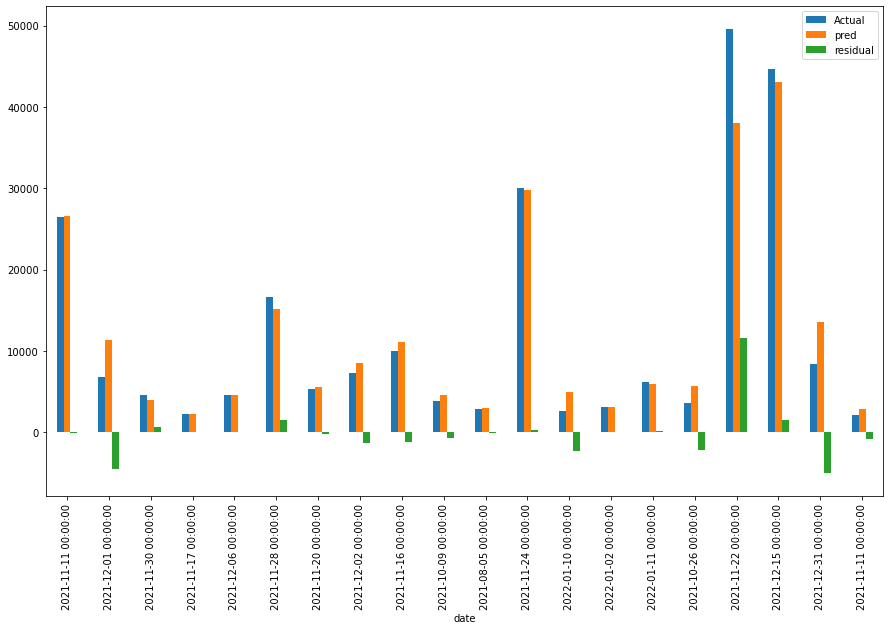

In [477]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

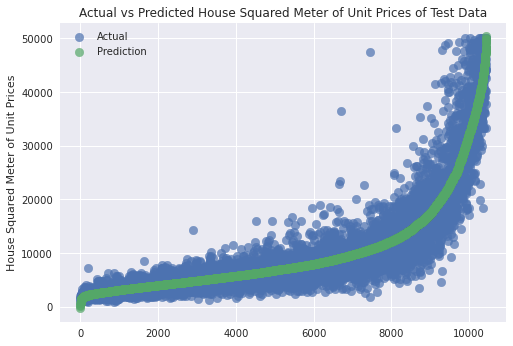

In [478]:
sorted_labels_acc_to_test_y = list(sorted(zip(y_test, y_pred), key=lambda x: x[1]))
sorted_test_y, sorted_test_preds = zip(*sorted_labels_acc_to_test_y)

with plt.style.context(('ggplot', 'seaborn')):
    plt.scatter(range(len(sorted_test_y)),sorted_test_y, s=75, alpha=0.7, label='Actual')
    plt.scatter(range(len(sorted_test_preds)), sorted_test_preds, s=75, alpha=0.7, label='Prediction')
    plt.ylabel('House Squared Meter of Unit Prices')
    plt.title('Actual vs Predicted House Squared Meter of Unit Prices of Test Data')
    plt.legend(loc='best')

In [479]:
eval_metrics(y_train, y_train_pred, "Training")

Model Training Performance
-------------------------
R2_score 	: 0.9876795820593001
MAE 		: 650.0405096652152
MSE 		: 1049395.6804685348
RMSE 		: 1024.4001564176642


In [480]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.8955864320113974
MAE 		: 1749.5634321294442
MSE 		: 8667480.570350762
RMSE 		: 2944.0585201980552


In [481]:
optimum_model_xgbm_scores = {
    "optimum_model_xgbm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "optimum_model_xgbm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
optimum_xgbms =pd.DataFrame(optimum_model_xgbm_scores)
optimum_xgbms

optimum_model_xgbm_train  optimum_model_xgbm_test
rmse                   1024.40                  2944.06
mae                     650.04                  1749.56
mse                 1049395.68               8667480.57
R2                        0.99                     0.90

## Deep Learning

## RNN - Recurrent Neural Network

In [482]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [483]:
%%time
# Initialising the RNN ( with seven layers)
regressor = Sequential()
function = "relu"

regressor.add(SimpleRNN(units = 24, activation=function, kernel_regularizer='l2', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))
regressor.add(SimpleRNN(units = 16, activation=function, kernel_regularizer='l2', return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(SimpleRNN(units = 12, activation=function, kernel_regularizer='l2', return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(SimpleRNN(units = 8, activation=function, kernel_regularizer='l2', return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(SimpleRNN(units = 6, activation=function, kernel_regularizer='l2', return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(SimpleRNN(units = 4, activation=function, kernel_regularizer='l2',))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1, kernel_regularizer='l2'))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = "mean_squared_error")

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 20, batch_size = 8, callbacks = EarlyStopping())


Epoch 1/20
11744/11744 [==============================] - 272s 23ms/step - loss: 91559848.0000 - val_loss: 67570760.0000
Epoch 2/20
11744/11744 [==============================] - 256s 22ms/step - loss: 74068872.0000 - val_loss: 56113564.0000
Wall time: 8min 48s


### Prediction / Comparing / Error Metrics

In [484]:
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

In [485]:
def eval_metrics(actual, pred, model_type):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print(f"Model {model_type} Performance")
    print("-------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [486]:
print('Test set evaluation:\n_____________________________________')
eval_metrics(y_test, y_pred,"Testing")

Test set evaluation:
_____________________________________
Model Testing Performance
-------------------------
R2_score 	: 0.3240234193283711
MAE 		: 4627.46461062482
MSE 		: 56113529.99279784
RMSE 		: 7490.896474574844


In [487]:
print('Train set evaluation:\n_____________________________________')
eval_metrics(y_train, y_train_pred,"Training")

Train set evaluation:
_____________________________________
Model Training Performance
-------------------------
R2_score 	: 0.32052143700350244
MAE 		: 4734.293491594407
MSE 		: 57874811.74838954
RMSE 		: 7607.54965467788


In [488]:
rnn_scores = {"rnn_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "rnn_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rnns =pd.DataFrame(rnn_scores)
rnns

rnn_train    rnn_test
rmse     7607.55     7490.90
mae      4734.29     4627.46
mse  57874811.75 56113529.99
R2          0.32        0.32

### Visualising MOdel

In [489]:
test_set = df.smup[X_train.shape[0]:].values

In [490]:
predicted_smup = pd.DataFrame(y_pred)[0].values

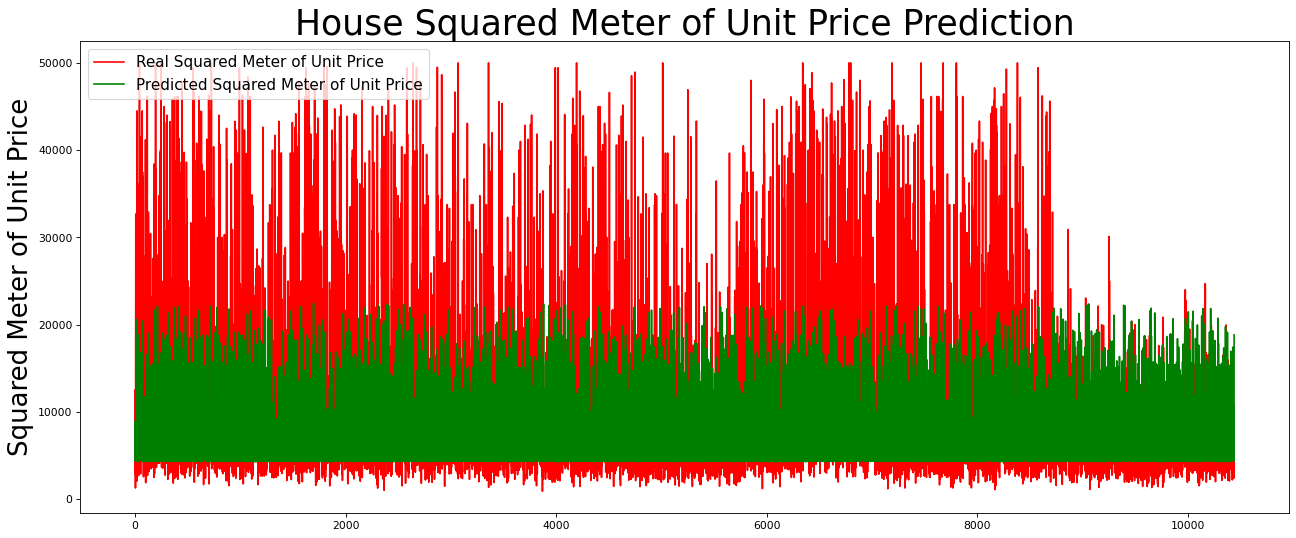

In [491]:
# Visualising the results
plt.figure(figsize=(20,8), dpi=78, edgecolor='b')
ax = plt.gca()
plt.plot(test_set, color = 'red', label = 'Real Squared Meter of Unit Price')
plt.plot(predicted_smup, color = 'green', label = 'Predicted Squared Meter of Unit Price')
plt.title('House Squared Meter of Unit Price Prediction', fontsize=32)
plt.ylabel('Squared Meter of Unit Price', fontsize=24)
plt.legend(loc=2, prop={'size': 14})
plt.show();

## LSTM - Long Short Term Memory

In [492]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.callbacks import EarlyStopping

In [493]:
%%time 
model = Sequential()
model.add(LSTM(1024, activation = 'relu', input_shape = (None, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss= "mean_squared_error", optimizer = "adam")
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

Epoch 1/20
734/734 [==============================] - 1079s 1s/step - loss: 84675552.0000 - val_loss: 68737440.0000
Epoch 2/20
734/734 [==============================] - 1063s 1s/step - loss: 64520344.0000 - val_loss: 66908672.0000
Epoch 3/20
734/734 [==============================] - 1057s 1s/step - loss: 57281532.0000 - val_loss: 53657372.0000
Epoch 4/20
734/734 [==============================] - 1062s 1s/step - loss: 50591700.0000 - val_loss: 51773476.0000
Epoch 5/20
734/734 [==============================] - 1077s 1s/step - loss: 47862444.0000 - val_loss: 44120348.0000
Epoch 6/20
734/734 [==============================] - 1060s 1s/step - loss: 45256440.0000 - val_loss: 38968868.0000
Epoch 7/20
734/734 [==============================] - 1057s 1s/step - loss: 41905692.0000 - val_loss: 36736936.0000
Epoch 8/20
734/734 [==============================] - 1064s 1s/step - loss: 37961712.0000 - val_loss: 32841196.0000
Epoch 9/20
734/734 [==============================] - 1060s 1s/step - lo

In [494]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4202496   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,203,521
Trainable params: 4,203,521
Non-trainable params: 0
_________________________________________________________________


### Prediction / Comparing / Error Metrics

In [495]:
%%time 
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

Wall time: 9min 22s


In [496]:
print('Test set evaluation:\n_____________________________________')
eval_metrics(y_test, y_pred,"Testing")

Test set evaluation:
_____________________________________
Model Testing Performance
-------------------------
R2_score 	: 0.7333195218654918
MAE 		: 2932.6130957648675
MSE 		: 22137428.18342354
RMSE 		: 4705.042846077338


In [497]:
print('Train set evaluation:\n_____________________________________')
eval_metrics(y_train, y_train_pred,"Training")

Train set evaluation:
_____________________________________
Model Training Performance
-------------------------
R2_score 	: 0.7363013705676889
MAE 		: 2980.4812260742397
MSE 		: 22460618.138415065
RMSE 		: 4739.263459485563


In [498]:
lstm_scores = {"lstm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lstm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lstms =pd.DataFrame(lstm_scores)
lstms

lstm_train   lstm_test
rmse     4739.26     4705.04
mae      2980.48     2932.61
mse  22460618.14 22137428.18
R2          0.74        0.73

### Visualising MOdel

In [499]:
test_set = df.smup[X_train.shape[0]:].values

In [500]:
predicted_smup = pd.DataFrame(y_pred)[0].values

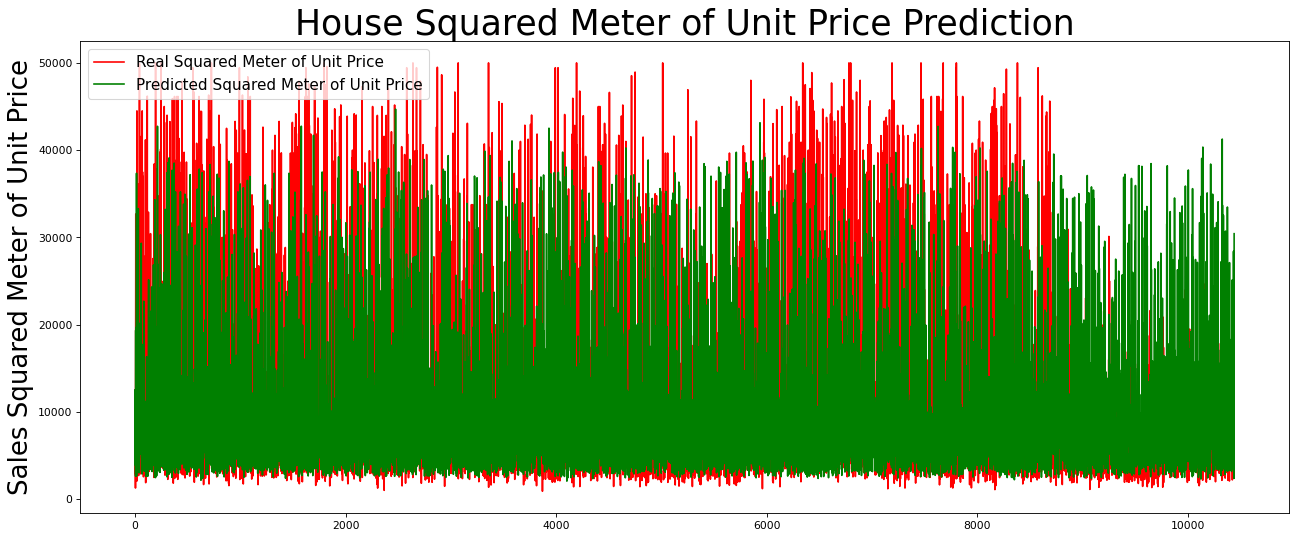

In [501]:
# Visualising the results
plt.figure(figsize=(20,8), dpi=78, edgecolor='b')
ax = plt.gca()
plt.plot(test_set, color = 'red', label = 'Real Squared Meter of Unit Price')
plt.plot(predicted_smup, color = 'green', label = 'Predicted Squared Meter of Unit Price')
plt.title('House Squared Meter of Unit Price Prediction', fontsize=32)
plt.ylabel('Sales Squared Meter of Unit Price', fontsize=24)
plt.legend(loc=2, prop={'size': 14})
plt.show();

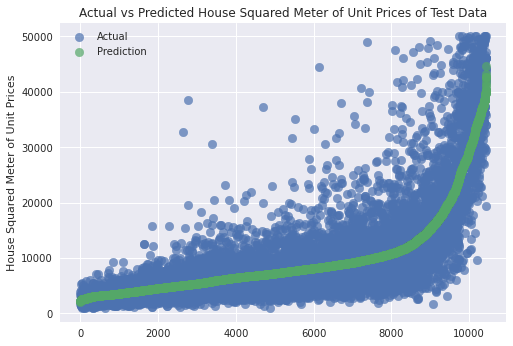

In [502]:
sorted_labels_acc_to_test_y = list(sorted(zip(y_test, y_pred), key=lambda x: x[1]))
sorted_test_y, sorted_test_preds = zip(*sorted_labels_acc_to_test_y)

with plt.style.context(('ggplot', 'seaborn')):
    plt.scatter(range(len(sorted_test_y)),sorted_test_y, s=75, alpha=0.7, label='Actual')
    plt.scatter(range(len(sorted_test_preds)), sorted_test_preds, s=75, alpha=0.7, label='Prediction')
    plt.ylabel('House Squared Meter of Unit Prices')
    plt.title('Actual vs Predicted House Squared Meter of Unit Prices of Test Data')
    plt.legend(loc='best')

## Evulation All Models

In [503]:
evu_model = pd.concat([ls, rs, lss, es, plss, ks, ds, bs, rfs, adas, gbms, xgbms, lgbms, cats, optimum_xgbms, rnns, lstms], axis= 1).T
evu_model

rmse     mae         mse   R2
lm_train                 4540.93 2964.24 20620030.25 0.76
lm_test                  4457.28 2902.01 19867320.88 0.76
ridge_train              6609.39 4370.44 43684050.95 0.49
ridge_test               6485.45 4265.30 42061124.87 0.49
lasso_train              8342.67 5681.09 69600129.13 0.18
lasso_test               8209.65 5586.26 67398298.17 0.19
elastic_train            4540.93 2964.11 20620041.23 0.76
elastic_test             4457.27 2901.87 19867232.29 0.76
pls_train                4540.93 2964.27 20620046.24 0.76
pls_test                 4457.40 2902.12 19868430.64 0.76
knn_train                4466.25 2570.82 19947352.62 0.77
knn_test                 5734.35 3348.97 32882824.28 0.60
dt_train                 7336.92 4854.14 53830461.63 0.37
dt_test                  7229.68 4739.03 52268250.98 0.37
bag_train                1689.35 1039.10  2853902.92 0.97
bag_test                 3550.41 2192.45 12605375.70 0.85
rf_train                 5124.03 3203.87 26255691.93 0.69
rf_test                  5132.73 3184.95 26344956.28 0.68
ada_train                7246.49 5061.75 52511677.05 0.38
ada_test                 7149.28 4936.94 51112134.25 0.38
gbm_train                5632.27 3694.29 31722429.18 0.63
gbm_test                 5581.82 3636.09 31156682.14 0.62
xgbm_train               1024.40  650.04  1049395.68 0.99
xgbm_test                2945.68 1750.79  8677010.09 0.90
lgbm_train               3444.86 2197.78 11867073.30 0.86
lgbm_test                3617.38 2256.17 13085423.41 0.84
cat_train                4086.38 2587.74 16698493.31 0.80
cat_test                 4106.80 2577.01 16865812.35 0.80
optimum_model_xgbm_train 1024.40  650.04  1049395.68 0.99
optimum_model_xgbm_test  2944.06 1749.56  8667480.57 0.90
rnn_train                7607.55 4734.29 57874811.75 0.32
rnn_test                 7490.90 4627.46 56113529.99 0.32
lstm_train               4739.26 2980.48 22460618.14 0.74
lstm_test                4705.04 2932.61 22137428.18 0.73

In [504]:
evu_model_train = pd.concat((ls.iloc[:,:1], rs.iloc[:,:1], lss.iloc[:,:1], es.iloc[:,:1], plss.iloc[:,:1], ks.iloc[:,:1], 
                                 ds.iloc[:,:1], bs.iloc[:,:1], rfs.iloc[:,:1], adas.iloc[:,:1], gbms.iloc[:,:1], 
                                 xgbms.iloc[:,:1], lgbms.iloc[:,:1], cats.iloc[:,:1], optimum_xgbms.iloc[:,:1], rnns.iloc[:,:1],
                                 lstms.iloc[:,:1]), axis= 1).T
evu_model_train

rmse     mae         mse   R2
lm_train                 4540.93 2964.24 20620030.25 0.76
ridge_train              6609.39 4370.44 43684050.95 0.49
lasso_train              8342.67 5681.09 69600129.13 0.18
elastic_train            4540.93 2964.11 20620041.23 0.76
pls_train                4540.93 2964.27 20620046.24 0.76
knn_train                4466.25 2570.82 19947352.62 0.77
dt_train                 7336.92 4854.14 53830461.63 0.37
bag_train                1689.35 1039.10  2853902.92 0.97
rf_train                 5124.03 3203.87 26255691.93 0.69
ada_train                7246.49 5061.75 52511677.05 0.38
gbm_train                5632.27 3694.29 31722429.18 0.63
xgbm_train               1024.40  650.04  1049395.68 0.99
lgbm_train               3444.86 2197.78 11867073.30 0.86
cat_train                4086.38 2587.74 16698493.31 0.80
optimum_model_xgbm_train 1024.40  650.04  1049395.68 0.99
rnn_train                7607.55 4734.29 57874811.75 0.32
lstm_train               4739.26 2980.48 22460618.14 0.74

In [505]:
evu_model_test = pd.concat([ls.iloc[:,1:], rs.iloc[:,1:], lss.iloc[:,1:], es.iloc[:,1:], plss.iloc[:,1:], ks.iloc[:,1:], 
                            ds.iloc[:,1:], bs.iloc[:,1:], rfs.iloc[:,1:], adas.iloc[:,1:], gbms.iloc[:,1:], 
                            xgbms.iloc[:,1:], lgbms.iloc[:,1:], cats.iloc[:,1:], optimum_xgbms.iloc[:,1:], rnns.iloc[:,1:],
                            lstms.iloc[:,1:]], axis= 1).T
evu_model_test

rmse     mae         mse   R2
lm_test                 4457.28 2902.01 19867320.88 0.76
ridge_test              6485.45 4265.30 42061124.87 0.49
lasso_test              8209.65 5586.26 67398298.17 0.19
elastic_test            4457.27 2901.87 19867232.29 0.76
pls_test                4457.40 2902.12 19868430.64 0.76
knn_test                5734.35 3348.97 32882824.28 0.60
dt_test                 7229.68 4739.03 52268250.98 0.37
bag_test                3550.41 2192.45 12605375.70 0.85
rf_test                 5132.73 3184.95 26344956.28 0.68
ada_test                7149.28 4936.94 51112134.25 0.38
gbm_test                5581.82 3636.09 31156682.14 0.62
xgbm_test               2945.68 1750.79  8677010.09 0.90
lgbm_test               3617.38 2256.17 13085423.41 0.84
cat_test                4106.80 2577.01 16865812.35 0.80
optimum_model_xgbm_test 2944.06 1749.56  8667480.57 0.90
rnn_test                7490.90 4627.46 56113529.99 0.32
lstm_test               4705.04 2932.61 22137428.18 0.73

Text(0.5, 1.0, 'R2 Scores - Train')

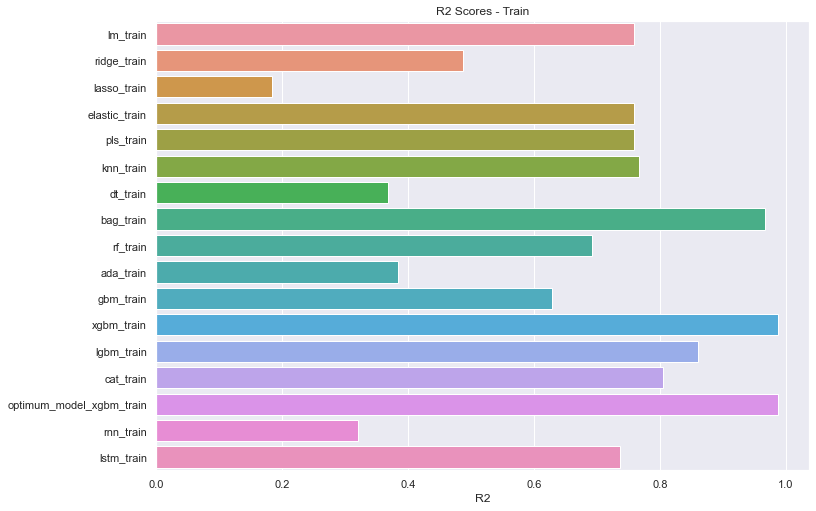

In [506]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = evu_model_train["R2"], y = evu_model_train.index)
plt.title("R2 Scores - Train")


Text(0.5, 1.0, 'R2 Scores - Test')

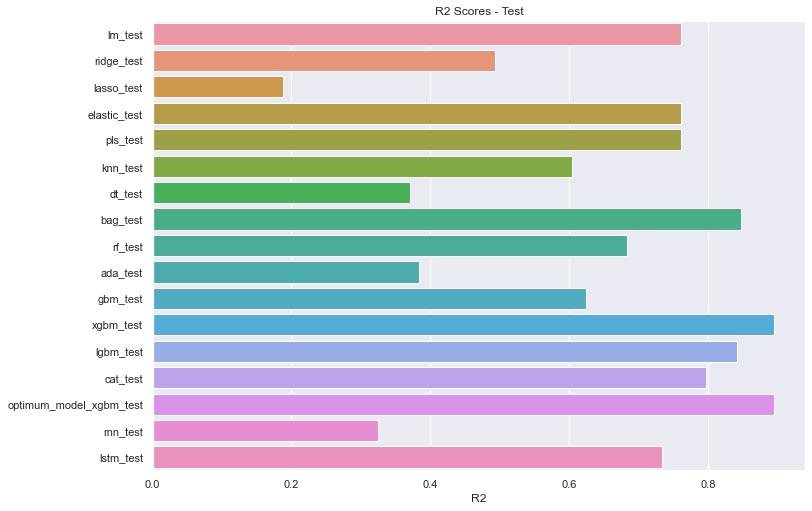

In [507]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = evu_model_test["R2"], y = evu_model_test.index)
plt.title("R2 Scores - Test")

Text(0.5, 1.0, 'RMSE Scores - Train')

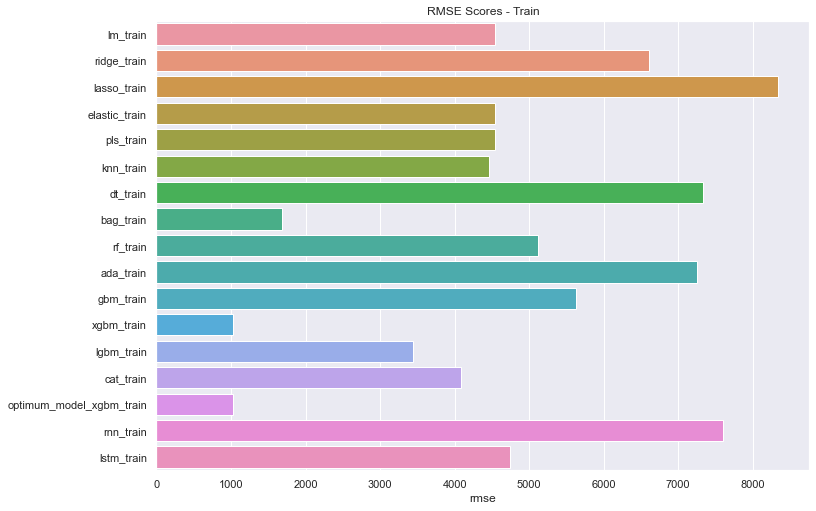

In [508]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = evu_model_train["rmse"], y = evu_model_train.index)
plt.title("RMSE Scores - Train")

Text(0.5, 1.0, 'RMSE Scores - Test')

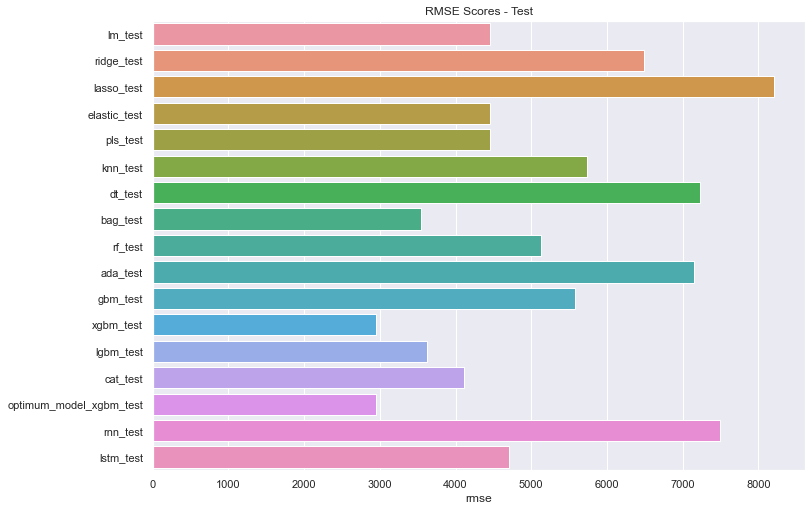

In [509]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = evu_model_test["rmse"], y = evu_model_test.index)
plt.title("RMSE Scores - Test")

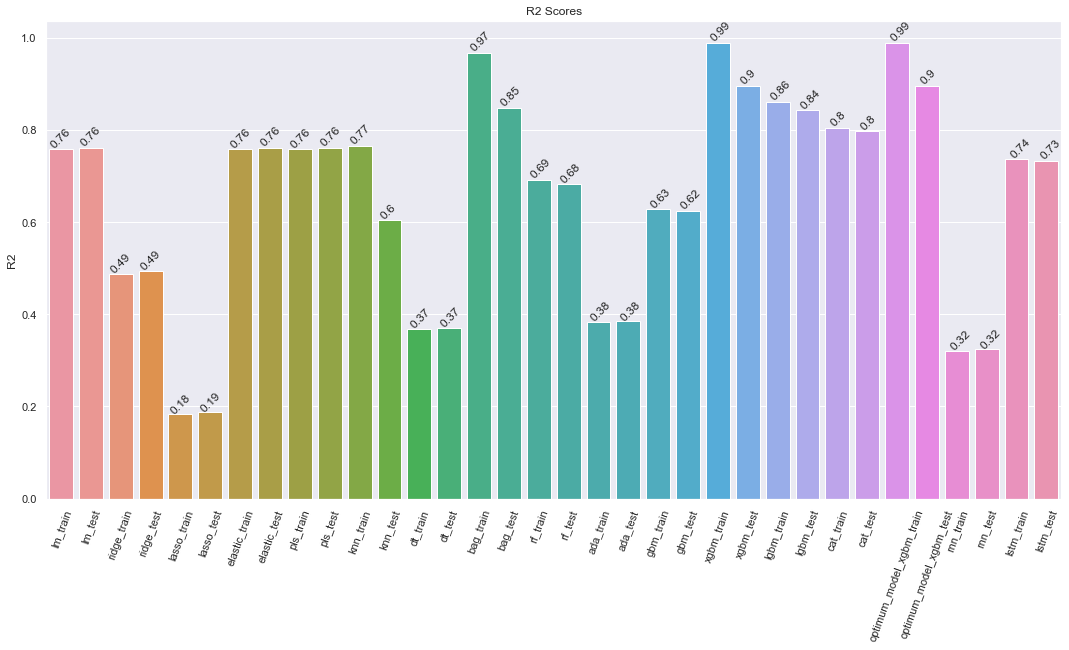

In [510]:
sns.set(rc={'figure.figsize':(15,9)})
ax = sns.barplot(y=evu_model["R2"], x=evu_model.index)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("R2 Scores")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)

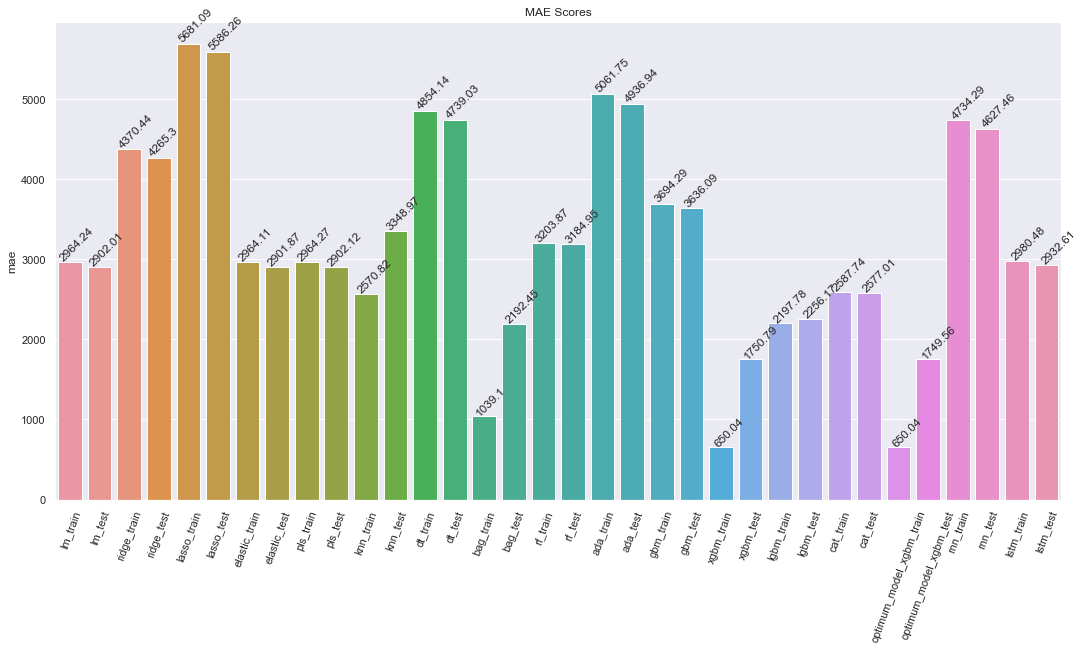

In [511]:
ax = sns.barplot(y=evu_model["mae"], x=evu_model.index)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("MAE Scores")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)

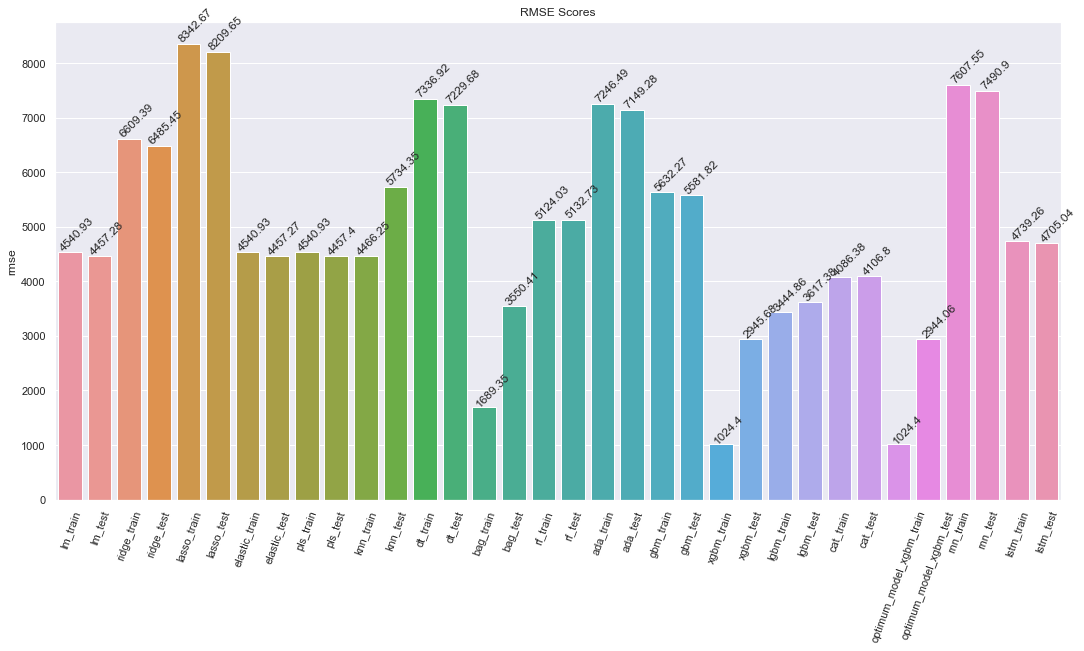

In [512]:
ax = sns.barplot(y=evu_model["rmse"], x=evu_model.index)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title("RMSE Scores")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=45)

In [513]:
# En yüksek R2 ve en düşük RMSE değeri XGBM ve optimum_model XGBM modelleri vermiştir.
# The highest R2 and lowest RMSE values gave XGBM and optimum_model XGBM models.

## Feature Importance

In [514]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

### XGBM

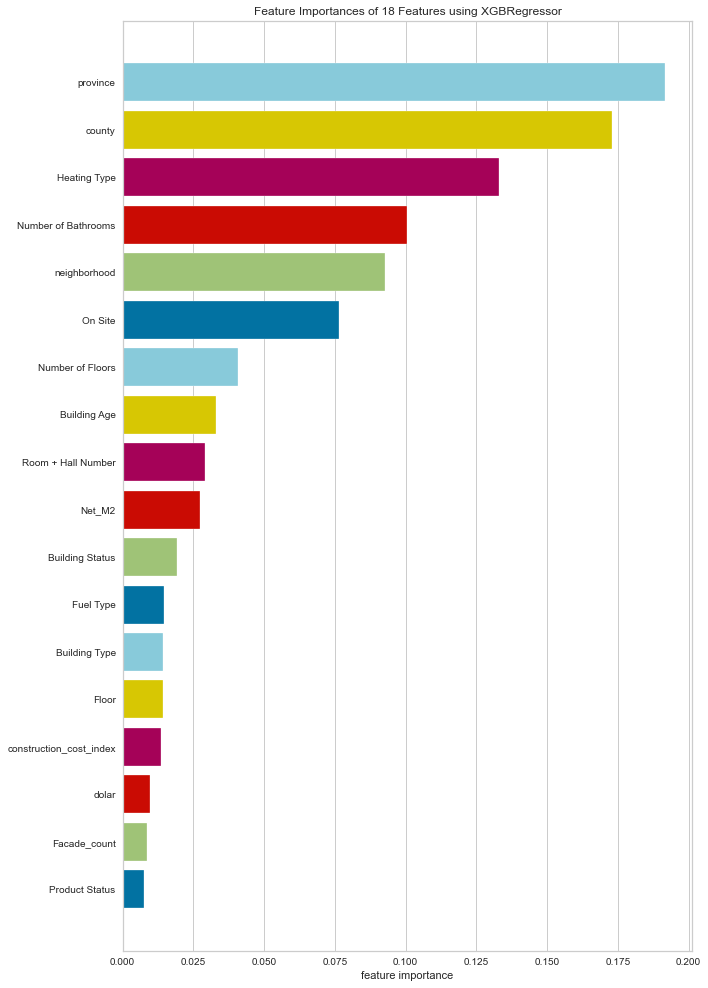

In [515]:
viz = FeatureImportances(xgbm_final, labels=X.columns, relative=False)
visualizer = RadViz(size=(720, 1000))
viz.fit(X_train, y_train)
viz.show();

In [516]:
df_new = dff[["province", "county", "neighborhood", "Room + Hall Number", "Net_M2", "Floor", "Number of Floors", 
             "Building Age", "Number of Bathrooms", "Heating Type", "Facade_count", "On Site", "dolar", "smup"]]

In [517]:
df_new

province       county   neighborhood Room + Hall Number  Net_M2  \
date                                                                         
2021-01-01    İzmir        Konak         Atilla              2 + 1      84   
2021-01-01   Ankara       Sincan  Mustafa Kemal              4 + 1     178   
2021-01-01    İzmir      Balçova         Eğitim              2 + 1      85   
2021-01-01    İzmir      Balçova      Teleferik              3 + 1     135   
2021-01-01    İzmir      Torbalı        Torbalı              3 + 1     120   
...             ...          ...            ...                ...     ...   
2022-01-11   Ankara     Keçiören          Yayla              3 + 1     135   
2022-01-11   Ankara     Altındağ  Feridun Çelik              3 + 1     120   
2022-01-11   Ankara     Keçiören       19 Mayıs              3 + 1     110   
2022-01-11   Ankara      Çankaya      Gökkuşağı              3 + 1     128   
2022-01-11   Ankara  Yenimahalle       Esentepe              2 + 1      80   

                     Floor Number of Floors  Building Age  \
date                                                        
2021-01-01               4                4             0   
2021-01-01               2                4             0   
2021-01-01               4                4             9   
2021-01-01               2                4             0   
2021-01-01            6-10             6-10            20   
...                    ...              ...           ...   
2022-01-11               3                3             5   
2022-01-11               3             6-10             0   
2022-01-11  Zemin (Ground)                3            17   
2022-01-11  Zemin (Ground)                4            12   
2022-01-11               1                3            20   

            Number of Bathrooms          Heating Type  Facade_count On Site  \
date                                                                          
2021-01-01                    1  Kombi (Combi boiler)             4      No   
2021-01-01                    2  Kombi (Combi boiler)             2      No   
2021-01-01                    1  Kombi (Combi boiler)             2      No   
2021-01-01                    1         Diğer (Other)             2     Yes   
2021-01-01                    1  Kombi (Combi boiler)             2     Yes   
...                         ...                   ...           ...     ...   
2022-01-11                    2  Kombi (Combi boiler)             2      No   
2022-01-11                    2  Kombi (Combi boiler)             4      No   
2022-01-11                    1  Kombi (Combi boiler)             2      No   
2022-01-11                    2  Kombi (Combi boiler)             4      No   
2022-01-11                    1  Kombi (Combi boiler)             3      No   

            dolar   smup  
date                      
2021-01-01   7.35   7380  
2021-01-01   7.35   4876  
2021-01-01   7.35   8000  
2021-01-01   7.35  12962  
2021-01-01   7.35   3750  
...           ...    ...  
2022-01-11  13.73   5111  
2022-01-11  13.73   2416  
2022-01-11  13.73   4409  
2022-01-11  13.73   4921  
2022-01-11  13.73   3250  

[104385 rows x 14 columns]

In [518]:
df_new_dummy = pd.get_dummies(df_new)

In [519]:
df_new_dummy

Net_M2  Building Age  Number of Bathrooms  Facade_count  dolar  \
date                                                                         
2021-01-01      84             0                    1             4   7.35   
2021-01-01     178             0                    2             2   7.35   
2021-01-01      85             9                    1             2   7.35   
2021-01-01     135             0                    1             2   7.35   
2021-01-01     120            20                    1             2   7.35   
...            ...           ...                  ...           ...    ...   
2022-01-11     135             5                    2             2  13.73   
2022-01-11     120             0                    2             4  13.73   
2022-01-11     110            17                    1             2  13.73   
2022-01-11     128            12                    2             4  13.73   
2022-01-11      80            20                    1             3  13.73   

             smup  province_Ankara  province_İstanbul  province_İzmir  \
date                                                                    
2021-01-01   7380                0                  0               1   
2021-01-01   4876                1                  0               0   
2021-01-01   8000                0                  0               1   
2021-01-01  12962                0                  0               1   
2021-01-01   3750                0                  0               1   
...           ...              ...                ...             ...   
2022-01-11   5111                1                  0               0   
2022-01-11   2416                1                  0               0   
2022-01-11   4409                1                  0               0   
2022-01-11   4921                1                  0               0   
2022-01-11   3250                1                  0               0   

            county_Adalar  county_Akyurt  county_Aliağa  county_Altındağ  \
date                                                                       
2021-01-01              0              0              0                0   
2021-01-01              0              0              0                0   
2021-01-01              0              0              0                0   
2021-01-01              0              0              0                0   
2021-01-01              0              0              0                0   
...                   ...            ...            ...              ...   
2022-01-11              0              0              0                0   
2022-01-11              0              0              0                1   
2022-01-11              0              0              0                0   
2022-01-11              0              0              0                0   
2022-01-11              0              0              0                0   

            county_Arnavutköy  county_Ataşehir  county_Avcılar  county_Ayaş  \
date                                                                          
2021-01-01                  0                0               0            0   
2021-01-01                  0                0               0            0   
2021-01-01                  0                0               0            0   
2021-01-01                  0                0               0            0   
2021-01-01                  0                0               0            0   
...                       ...              ...             ...          ...   
2022-01-11                  0                0               0            0   
2022-01-11                  0                0               0            0   
2022-01-11                  0                0               0            0   
2022-01-11                  0                0               0            0   
2022-01-11                  0                0               0            0   

            county_Bahçelievle

## Determine Dependent(Target) and Independent Variables(Features)

In [520]:
X_new = df_new_dummy.drop("smup", axis = 1)
y_new = df_new_dummy.smup

## Train - Test Split

In [521]:
from sklearn.model_selection import train_test_split

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10, random_state = 9)

In [523]:
print("X_train : {}\nX_test : {}\ny_train : {}\ny_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (93946, 1335)
X_test : (10439, 1335)
y_train : (93946,)
y_test : (10439,)


## Scaling - StandardScaler   

In [524]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling XGBM

In [525]:
xgbm_final = XGBRegressor(n_estimators = 1000, max_depth = 10, learning_rate = 0.1,
                         subsample = 1, colsample_bytree=0.5, random_state= 9)

In [526]:
%%time
xgbm_final.fit(X_train, y_train)
xgbm_final.score(X_train, y_train)

Wall time: 28min 20s


0.952948939603917

## Prediction / Comparing / Error Metrics

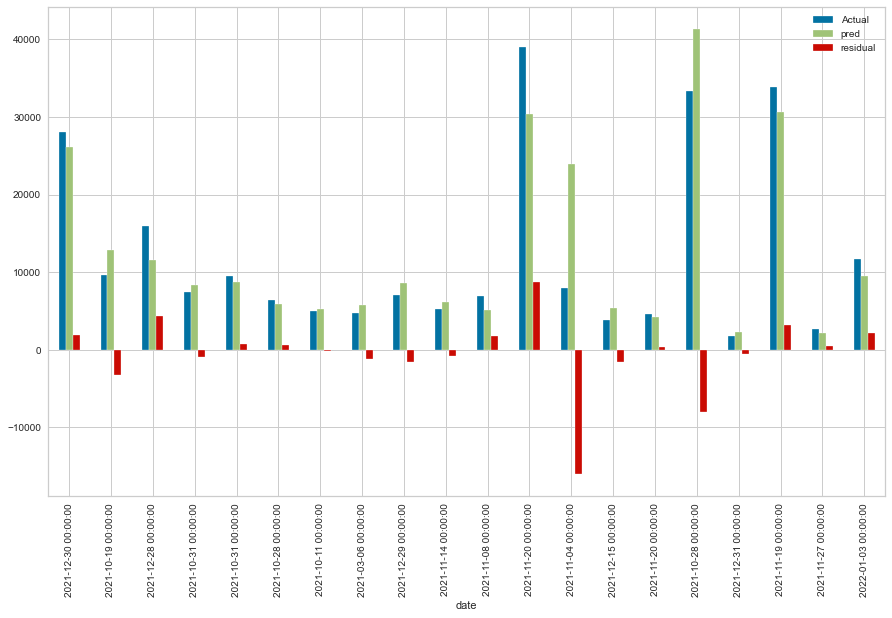

In [527]:
y_pred = xgbm_final.predict(X_test)
y_train_pred = xgbm_final.predict(X_train)

my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.sort_values(by= "residual")
result_sample = comparing.sample(20)

result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

In [528]:
eval_metrics(y_test, y_pred,"Testing")

Model Testing Performance
-------------------------
R2_score 	: 0.8926285493148454
MAE 		: 1785.8992706912381
MSE 		: 8913017.537390713
RMSE 		: 2985.467725062643


In [529]:
eval_metrics(y_train, y_train_pred,"Training")

Model Training Performance
-------------------------
R2_score 	: 0.952948939603917
MAE 		: 1312.8826846912118
MSE 		: 4007589.6596011445
RMSE 		: 2001.8965157073292


In [530]:
xgbm_scores = {"xgbm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "xgbm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
xgbms =pd.DataFrame(xgbm_scores)
xgbms

xgbm_train  xgbm_test
rmse     2001.90    2985.47
mae      1312.88    1785.90
mse   4007589.66 8913017.54
R2          0.95       0.89

## Saving the Model and Prediction on New Data

In [531]:
xgbm_final = XGBRegressor(n_estimators = 1000, max_depth = 10, learning_rate = 0.1,
                         subsample = 1, colsample_bytree=0.5, random_state= 9)

In [532]:
X_new_sc = scaler.transform(X_new)

In [533]:
%%time
xgbm_final.fit(X_new_sc, y_new)
xgbm_final.score(X_new_sc, y_new)

Wall time: 30min 56s


0.9514928922335135

In [534]:
y_pred = xgbm_final.predict(X_new_sc)

In [535]:
eval_metrics(y_new, y_pred,"Full Data")

Model Full Data Performance
-------------------------
R2_score 	: 0.9514928922335135
MAE 		: 1327.2321784706005
MSE 		: 4121263.7390548647
RMSE 		: 2030.0895889233225


In [536]:
import pickle
pickle.dump(xgbm_final, open("best_model_xgbm_final.pkl", "wb"))

# pickle_out = open("best_model_xgbm_final.pkl", mode = "wb") 
# pickle.dump(xgbm_final, pickle_out) 
# pickle_out.close()

In [537]:
import joblib
joblib.dump(scaler, open("scaler", 'wb'))

In [538]:
best_model = pickle.load(open("best_model_xgbm_final.pkl", "rb"))

In [539]:
my_dict = {
    "province": "İzmir", 
    "county": "Konak", 
    "neighborhood": "Atilla", 
    "Room + Hall Number": "2 + 1", 
    "Net_M2": 84,
    "Floor": "4", 
    "Number of Floors": "6-10", 
    "Building Age": 5, 
    "Number of Bathrooms": 1,
    "Facade_count":2,
    "Heating Type": "Kombi (Combi boiler)",
    "On Site": "Yes",
    "dolar": 13
}

In [540]:
my_dict_df = pd.DataFrame([my_dict])
my_dict_df.T

0
province                            İzmir
county                              Konak
neighborhood                       Atilla
Room + Hall Number                  2 + 1
Net_M2                                 84
Floor                                   4
Number of Floors                     6-10
Building Age                            5
Number of Bathrooms                     1
Facade_count                            2
Heating Type         Kombi (Combi boiler)
On Site                               Yes
dolar                                  13

In [541]:
my_dict_df_dummy = pd.get_dummies(my_dict_df).reindex(columns=X_new.columns, fill_value=0)
my_dict_df_dummy

Net_M2  Building Age  Number of Bathrooms  Facade_count  dolar  \
0      84             5                    1             2     13   

   province_Ankara  province_İstanbul  province_İzmir  county_Adalar  \
0                0                  0               1              0   

   county_Akyurt  county_Aliağa  county_Altındağ  county_Arnavutköy  \
0              0              0                0                  0   

   county_Ataşehir  county_Avcılar  county_Ayaş  county_Bahçelievler  \
0                0               0            0                    0   

   county_Bakırköy  county_Bala  county_Balçova  county_Bayraklı  \
0                0            0               0                0   

   county_Bayrampaşa  county_Bayındır  county_Bağcılar  county_Başakşehir  \
0                  0                0                0                  0   

   county_Bergama  county_Beykoz  county_Beylikdüzü  county_Beyoğlu  \
0               0              0                  0               0   

   county_Beypazarı  county_Beşiktaş  county_Bornova  county_Buca  \
0                 0                0               0            0   

   county_Büyükçekmece  county_Dikili  county_Elmadağ  county_Esenler  \
0                    0              0               0               0   

   county_Esenyurt  county_Etimesgut  county_Eyüpsultan  county_Fatih  \
0                0                 0                  0             0   

   county_Foça  county_Gaziemir  county_Gaziosmanpaşa  county_Gölbaşı  \
0            0                0                     0               0   

   county_Güngören  county_Güzelbahçe  county_Haymana  county_Kadıköy  \
0                0                  0               0               0   

   county_Kahramankazan  ...  neighborhood_Şifa  neighborhood_Şirinevler  \
0                     0  ...                  0                        0   

   neighborhood_Şirinkapı  neighborhood_Şirinkent  neighborhood_Şirintepe  \
0                       0                       0                       0   

   Room + Hall Number_1 + 0  Room + Hall Number_1 + 1  \
0                         0                         0   

   Room + Hall Number_2 + 0  Room + Hall Number_2 + 1  \
0                         0                         1   

   Room + Hall Number_2 + 2  Room + Hall Number_3 + 0  \
0                         0                         0   

   Room + Hall Number_3 + 1  Room + Hall Number_3 + 2  \
0                         0                         0   

   Room + Hall Number_4 + 0  Room + Hall Number_4 + 1  \
0                         0                         0   

   Room + Hall Number_4 + 2  Room + Hall Number_5 + 1  \
0                         0                         0   

   Room + Hall Number_5 + 2  Room + Hall Number_6 + 1  \
0                         0                         0   

   Room + Hall Number_6 + 2  Floor_1  Floor_11-15  Floor_16-20  Floor_2  \
0                         0        0            0            0        0   

   Floor_21 and over  Floor_3  Floor_4  Floor_5  Floor_6-10  \
0                  0        0        1        0           0   

   Floor_Bodrum (Basement)  Floor_Yarı Bodrum (Semibasement)  \
0                        0                                 0   

   Floor_Zemin (Ground)  Floor_Çatı Katı (Loft)  Number of Floors_1  \
0                     0                       0                   0   

   Number of Floors_11-15  Number of Floors_16-20  Number of Floors_2  \
0                       0                       0                   0   

   Number of Floors_21 and over  Number of Floors_3  Number of Floors_4  \
0                             0                   0                   0   

   Number of Floors_5  Number of Floors_6-10  Heating Type_Diğer (Other)  \
0                   0                      1                           0   

   Heating Type_Kat Kaloriferi (Floor Heater)  \
0                                           0   

   Heating Type_Klima (Air conditioning)  Heating Type_K

In [542]:
my_dict_df_dummy_sc = scaler.transform(my_dict_df_dummy)

In [543]:
prediction = best_model.predict(my_dict_df_dummy_sc)

In [544]:
prediction

array([9167.034], dtype=float32)

In [545]:
int(prediction[0])

9167

## Deployment Preparation

In [546]:
# df_new_grouped = dff[["province", "county", "neighborhood", "Room + Hall Number"]].drop_duplicates()

df_new_grouped = dff[["province", "county", "neighborhood", "Room + Hall Number", "Floor", "Number of Floors", 
                      "Number of Bathrooms", "Heating Type", "Facade_count", "On Site"]].drop_duplicates()

In [547]:
df_new_grouped

province       county         neighborhood Room + Hall Number  \
date                                                                       
2021-01-01    İzmir        Konak               Atilla              2 + 1   
2021-01-01   Ankara       Sincan        Mustafa Kemal              4 + 1   
2021-01-01    İzmir      Balçova               Eğitim              2 + 1   
2021-01-01    İzmir      Balçova            Teleferik              3 + 1   
2021-01-01    İzmir      Torbalı              Torbalı              3 + 1   
...             ...          ...                  ...                ...   
2022-01-11   Ankara  Yenimahalle           Yunus Emre              3 + 1   
2022-01-11   Ankara      Çankaya  Yukarı Bahçelievler              3 + 1   
2022-01-11   Ankara      Çankaya             İlkbahar              3 + 1   
2022-01-11   Ankara     Altındağ        Feridun Çelik              3 + 1   
2022-01-11   Ankara      Çankaya            Gökkuşağı              3 + 1   

                     Floor Number of Floors  Number of Bathrooms  \
date                                                               
2021-01-01               4                4                    1   
2021-01-01               2                4                    2   
2021-01-01               4                4                    1   
2021-01-01               2                4                    1   
2021-01-01            6-10             6-10                    1   
...                    ...              ...                  ...   
2022-01-11               2                4                    2   
2022-01-11               2                5                    1   
2022-01-11               3            11-15                    2   
2022-01-11               3             6-10                    2   
2022-01-11  Zemin (Ground)                4                    2   

                    Heating Type  Facade_count On Site  
date                                                    
2021-01-01  Kombi (Combi boiler)             4      No  
2021-01-01  Kombi (Combi boiler)             2      No  
2021-01-01  Kombi (Combi boiler)             2      No  
2021-01-01         Diğer (Other)             2     Yes  
2021-01-01  Kombi (Combi boiler)             2     Yes  
...                          ...           ...     ...  
2022-01-11  Kombi (Combi boiler)             2      No  
2022-01-11  Kombi (Combi boiler)             1      No  
2022-01-11     Merkezi (Central)             3      No  
2022-01-11  Kombi (Combi boiler)             4      No  
2022-01-11  Kombi (Combi boiler)             4      No  

[58005 rows x 10 columns]

In [548]:
df_new_grouped.to_csv("df_new_grouped.csv")

In [549]:
df_new_grouped.nunique()

province                  3
county                   89
neighborhood           1193
Room + Hall Number       15
Floor                    13
Number of Floors          9
Number of Bathrooms       6
Heating Type              6
Facade_count              4
On Site                   2
dtype: int64

In [550]:
df_new_grouped.county.unique()

array(['Konak', 'Sincan', 'Balçova', 'Torbalı', 'Çankaya', 'Beylikdüzü',
       'Bornova', 'Esenyurt', 'Maltepe', 'Eyüpsultan', 'Silivri', 'Buca',
       'Karşıyaka', 'Beykoz', 'Polatlı', 'Küçükçekmece', 'Mamak',
       'Yenimahalle', 'Gaziosmanpaşa', 'Fatih', 'Şişli', 'Üsküdar',
       'Dikili', 'Beyoğlu', 'Gölbaşı', 'Kadıköy', 'Menderes', 'Kağıthane',
       'Sarıyer', 'Avcılar', 'Beşiktaş', 'Keçiören', 'Kartal', 'Çeşme',
       'Menemen', 'Karabağlar', 'Gaziemir', 'Bahçelievler', 'Adalar',
       'Zeytinburnu', 'Bayraklı', 'Tuzla', 'Güngören', 'Büyükçekmece',
       'Etimesgut', 'Kemalpaşa', 'Çiğli', 'Pendik', 'Pursaklar',
       'Ümraniye', 'Bakırköy', 'Bayrampaşa', 'Seferihisar', 'Bergama',
       'Çubuk', 'Foça', 'Esenler', 'Narlıdere', 'Başakşehir',
       'Sancaktepe', 'Güzelbahçe', 'Arnavutköy', 'Altındağ',
       'Kahramankazan', 'Sultangazi', 'Ataşehir', 'Bağcılar', 'Şile',
       'Ödemiş', 'Tire', 'Kızılcahamam', 'Beypazarı', 'Çekmeköy',
       'Sultanbeyli', 'Urla', 'Selçu

In [551]:
np.sort(df_new_grouped[df_new_grouped.province == "İstanbul"].county.unique())

array(['Adalar', 'Arnavutköy', 'Ataşehir', 'Avcılar', 'Bahçelievler',
       'Bakırköy', 'Bayrampaşa', 'Bağcılar', 'Başakşehir', 'Beykoz',
       'Beylikdüzü', 'Beyoğlu', 'Beşiktaş', 'Büyükçekmece', 'Esenler',
       'Esenyurt', 'Eyüpsultan', 'Fatih', 'Gaziosmanpaşa', 'Güngören',
       'Kadıköy', 'Kartal', 'Kağıthane', 'Küçükçekmece', 'Maltepe',
       'Pendik', 'Sancaktepe', 'Sarıyer', 'Silivri', 'Sultanbeyli',
       'Sultangazi', 'Tuzla', 'Zeytinburnu', 'Çatalca', 'Çekmeköy',
       'Ümraniye', 'Üsküdar', 'Şile', 'Şişli'], dtype=object)

In [552]:
df_new_grouped[df_new_grouped.province == "Ankara"].county.sort_values().unique()

array(['Akyurt', 'Altındağ', 'Ayaş', 'Bala', 'Beypazarı', 'Elmadağ',
       'Etimesgut', 'Gölbaşı', 'Haymana', 'Kahramankazan', 'Keçiören',
       'Kızılcahamam', 'Mamak', 'Nallıhan', 'Polatlı', 'Pursaklar',
       'Sincan', 'Yenimahalle', 'Çankaya', 'Çubuk', 'Şereflikoçhisar'],
      dtype=object)

In [553]:
df_new_grouped[df_new_grouped.province == "İzmir"].county.sort_values().unique()

array(['Aliağa', 'Balçova', 'Bayraklı', 'Bayındır', 'Bergama', 'Bornova',
       'Buca', 'Dikili', 'Foça', 'Gaziemir', 'Güzelbahçe', 'Karabağlar',
       'Karaburun', 'Karşıyaka', 'Kemalpaşa', 'Kiraz', 'Konak', 'Kınık',
       'Menderes', 'Menemen', 'Narlıdere', 'Seferihisar', 'Selçuk',
       'Tire', 'Torbalı', 'Urla', 'Çeşme', 'Çiğli', 'Ödemiş'],
      dtype=object)

In [554]:
df_new_grouped.neighborhood.sort_values().unique()

array(['100. Yıl', '15 Temmuz', '16 Eylül', ..., 'Şirinkapı', 'Şirinkent',
       'Şirintepe'], dtype=object)

In [555]:
df_new_grouped["Room + Hall Number"].sort_values().unique()

array(['1 + 0', '1 + 1', '2 + 0', '2 + 1', '2 + 2', '3 + 0', '3 + 1',
       '3 + 2', '4 + 0', '4 + 1', '4 + 2', '5 + 1', '5 + 2', '6 + 1',
       '6 + 2'], dtype=object)

In [556]:
X_new_single_row = X_new[0:1]

In [557]:
X_new_single_row

Net_M2  Building Age  Number of Bathrooms  Facade_count  dolar  \
date                                                                         
2021-01-01      84             0                    1             4   7.35   

            province_Ankara  province_İstanbul  province_İzmir  county_Adalar  \
date                                                                            
2021-01-01                0                  0               1              0   

            county_Akyurt  county_Aliağa  county_Altındağ  county_Arnavutköy  \
date                                                                           
2021-01-01              0              0                0                  0   

            county_Ataşehir  county_Avcılar  county_Ayaş  county_Bahçelievler  \
date                                                                            
2021-01-01                0               0            0                    0   

            county_Bakırköy  county_Bala  county_Balçova  county_Bayraklı  \
date                                                                        
2021-01-01                0            0               0                0   

            county_Bayrampaşa  county_Bayındır  county_Bağcılar  \
date                                                              
2021-01-01                  0                0                0   

            county_Başakşehir  county_Bergama  county_Beykoz  \
date                                                           
2021-01-01                  0               0              0   

            county_Beylikdüzü  county_Beyoğlu  county_Beypazarı  \
date                                                              
2021-01-01                  0               0                 0   

            county_Beşiktaş  county_Bornova  county_Buca  county_Büyükçekmece  \
date                                                                            
2021-01-01                0               0            0                    0   

            county_Dikili  county_Elmadağ  county_Esenler  county_Esenyurt  \
date                                                                         
2021-01-01              0               0               0                0   

            county_Etimesgut  county_Eyüpsultan  county_Fatih  county_Foça  \
date                                                                         
2021-01-01                 0                  0             0            0   

            county_Gaziemir  county_Gaziosmanpaşa  county_Gölbaşı  \
date                                                                
2021-01-01                0                     0               0   

            county_Güngören  county_Güzelbahçe  county_Haymana  \
date                                                             
2021-01-01                0                  0               0   

            county_Kadıköy  county_Kahramankazan  ...  neighborhood_Şifa  \
date                                              ...                      
2021-01-01               0                     0  ...                  0   

            neighborhood_Şirinevler  neighborhood_Şirinkapı  \
date                                                          
2021-01-01                        0                       0   

            neighborhood_Şirinkent  neighborhood_Şirintepe  \
date                                                         
2021-01-01                       0                       0   

            Room + Hall Number_1 + 0  Room + Hall Number_1 + 1  \
date                                                             
2021-01-01                         0                         0   

            Room + Hall Number_2 + 0  Room + Hall Number_2 + 1  \
date                                                             
2021-01-01                         0                         1   

            Room + Hall Number_2 + 2  Room + Hall Number_3 + 0  \
date                        

In [558]:
X_new_single_row.to_csv("X_new_single_row.csv")

## Deployment

In [559]:
# Option-1: Streamlit Sharing

In [560]:
# Option-2: Streamlit + Tmux + AWS(EC2)

In [561]:
# Option-3: Streamlit + Docker + AWS(EC2)

In [562]:
# Option-4: HTML + CSS3 + Flask + AWS(EC2)

In [563]:
# Option-5: HTML + CSS3 + Flask + Heroku

## Conclusion